# Glassdoor Germany Data Exploration

## Introduction

The project is about wrangling and exploring a Glassdoor dataset to gain insights about the German job market in the field of data science and related disciplines. In particular the job listings with focus on the relationship of job titles, locations, number of employees and industry will be investigated. Additionally, reported salaries for job titles of the job listing employers will be examined. This notebook covers two parts. The first part are data wrangling techniques that are used to obtain the data for the exploratory analyses. This analyses represents the second part and will focus on the use of data visualizations techniques.

### Motivation
I live in Munich, Germany and enrolled Udacity's Data Analyst Nanodegree program to deepen my knowledge of data analysis. This project was submitted as part of this program in order to demonstrate the importance and value of exploratory and explanatory data visualization techniques in the data analysis process. I choose to select not any of the given Udacity datasets, because I wanted to search and find a dataset focusing on the German job market in the field of data science and related disciplines for this project. Besides the data visualization tasks, I wanted to train my data wrangling techniques, too.

### Dataset
The examination done within this notebook relies on the dataset provided by André Sionek on [Kaggle](https://www.kaggle.com/andresionek/data-jobs-listings-glassdoor). The information provided on Kaggle and the [GitHub repository](https://github.com/andresionek91/Job-Listing-Scraper) states how the data was scraped and prepared. The data was scraped on the 10th of December 2019 from [Glassdoor](https://www.glassdoor.co.uk).

## Table of Contents
1. [Preliminary Data Wrangling](#wrangling)
<br>1.1. [Gathering Data](#gathering)
<br>1.2. [Assessing Data](#assessing)
<br>1.2.1. [Tidiness](#a-tidiness)
<br>1.2.2. [Quality](#a-quality)
<br>1.3. [Cleaning Data](#cleaning)
<br>1.3.1. [Missing Data](#missing)
<br>1.3.2. [Tidiness 1](#c-tidiness1)
<br>1.3.3. [Quality 1](#c-quality1)
<br>1.3.4. [Tidiness 2](#c-tidiness2)
<br>1.3.5. [Quality 2](#c-quality2)
<br>1.4. [Storing Data](#storing)
2. [Exploratory Analysis using Visualizations](#exploratory)
<br>2.1. [Dataset Structure](#structure)
<br>2.2. [Univariate Exploration](#univariate)
<br>2.2.1. [Job Titles](#unijob)
<br>2.2.2. [Salaries](#unisalary)
<br>2.2.3. [Summary](#unisum)
<br>2.3. [Bivariate Exploration](#bivariate)
<br>2.3.1. [Job Titles](#bijob)
<br>2.3.2. [Salaries](#bisalary)
<br>2.3.3. [Summary](#bisum)
<br>2.4. [Multivariate Exploration](#multivariate)
<br>2.4.1. [Job Titles](#multijob)
<br>2.4.2. [Salaries](#multisalary)
<br>2.4.3. [Summary](#multisum)

In [518]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from pprint import pprint
from textwrap import wrap

%matplotlib inline

<a id='wrangling'></a>
## 1. Preliminary Data Wrangling

<a id='gathering'></a>
## 1.1. Gathering Data
The data will be gathered from 3 different data sources:

1. `glassdoor.csv.gz`contains detailed job information for each listed job on the first 30 pages returned by searching each of the following search terms for every country on [Glassdoor](https://www.glassdoor.co.uk):
   * data-scientist
   * software-engineer
   * data-analyst
   * research-scientist
   * business-analyst
   * product-manager
   * project-manager
   * data-engineer
   * statistician
   * dba
   * database-engineer
   * machine-learning-engineer
<br><br>
The job information contains i.e. the job title, location, number of employees and references to the following salaries and currency exchange datasets.
<br><br>

1. For each employer of a listed job the fetched job information contained data about base salaries reported on Glassdoor. This data is provided as separate dataset `glassdoor_salary_salaries.csv.gz`. Reported salaries are grouped by job title and an aggregated low, average and high base salary is stated.
<br><br>

1. The dataset `currency_exchange.csv` contains currency exchange rates for the date the data was scraped.
<br><br>

The job information in dataset 1. and 2. was returned by the Glassdoor API endpoint https://www.glassdoor.co.uk/Job/json/details.htm called using the query string parameter `jobListingId` with each job id found by the search.

In [519]:
# Load the glassdoor dataset
glassdoor = pd.read_csv('data/glassdoor.csv.gz', compression='gzip')

In [520]:
# Load the salaries dataset
salaries = pd.read_csv('data/glassdoor_salary_salaries.csv.gz', compression='gzip')

In [521]:
# Load the currency dataset
currency = pd.read_csv('data/currency_exchange.csv')

<a id='assessing'></a>
## 1.2. Assessing Data
After gathering each of the above pieces of data, the data will be assessed for tidiness and quality issues. The features will be described. The detected issues will be documented. Only features and issues that satisfy the project motivation and are required to investigate the relationship of job titles, locations, number of employees and reported salaries will be covered.

In [522]:
# Let's get an overview of the glassdoor dataset
glassdoor.head(3)

,benefits.benefitRatingDecimal,benefits.comments,benefits.highlights,benefits.numRatings,benefits.employerSummary,breadCrumbs,gaTrackerData.category,gaTrackerData.empId,gaTrackerData.empName,gaTrackerData.empSize,...,salary.currency.displayName,salary.currency.id,salary.currency.name,salary.currency.negativeTemplate,salary.currency.new,salary.currency.positiveTemplate,salary.currency.symbol,salary.lastSalaryDate,salary.salaries,wwfu
0,0.0,2801.0,2801.0,0,NaN,2801,-1,2183810,Modus Group,501-1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2483.0,NaN
1,4.0,2802.0,2802.0,3,NaN,2802,-1,10416,Boehringer Ingelheim,10000--1,...,United Kingdom Pound (GBP),2.0,United Kingdom Pound,$(#),False,$#,&pound;,2019-10-14T06:05:58,2484.0,NaN
2,0.0,2803.0,2803.0,0,NaN,2803,-1,1043373,Immobiliare.it,201-500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2485.0,NaN


In [523]:
# Print info
glassdoor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165290 entries, 0 to 165289
Columns: 163 entries, benefits.benefitRatingDecimal to wwfu
dtypes: bool(11), float64(35), int64(23), object(94)
memory usage: 193.4+ MB


In [524]:
# Print descriptive statistics
glassdoor.describe()

,benefits.benefitRatingDecimal,benefits.comments,benefits.highlights,benefits.numRatings,breadCrumbs,gaTrackerData.category,gaTrackerData.empId,gaTrackerData.industryId,gaTrackerData.jobId.long,gaTrackerData.jobId.int,...,reviews,salary.country.continent.id,salary.country.currency.defaultFractionDigits,salary.country.currency.id,salary.country.id,salary.country.population,salary.currency.defaultFractionDigits,salary.currency.id,salary.salaries,wwfu
count,165290.000000,165289.000000,165289.000000,165290.000000,165290.000000,165290.000000,1.652900e+05,165290.000000,1.650440e+05,2.460000e+02,...,165290.000000,76777.0,76777.0,76777.0,76777.0,76777.0,76777.0,76777.000000,147149.000000,18741.000000
mean,1.387690,82645.000000,82645.000000,17.650342,82645.500000,2476.188614,6.945812e+05,142681.566731,3.329226e+09,1.754135e+09,...,82645.500000,4.0,2.0,2.0,2.0,60363602.0,2.0,2.037238,73575.000000,9371.000000
std,1.826381,47714.968659,47714.968659,49.901598,47715.257335,6098.395811,8.862075e+05,90479.876651,1.167657e+08,3.473246e+08,...,47715.257335,0.0,0.0,0.0,0.0,0.0,0.0,1.292106,42478.401718,5410.205033
min,0.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000e+00,0.000000,2.208549e+09,3.276949e+08,...,1.000000,4.0,2.0,2.0,2.0,60363602.0,2.0,1.000000,1.000000,1.000000
25%,0.000000,41323.000000,41323.000000,0.000000,41323.250000,-1.000000,5.632000e+03,0.000000,3.303018e+09,1.756631e+09,...,41323.250000,4.0,2.0,2.0,2.0,60363602.0,2.0,2.000000,36788.000000,4686.000000
50%,0.000000,82645.000000,82645.000000,0.000000,82645.500000,-1.000000,3.043920e+05,200048.000000,3.370946e+09,1.904030e+09,...,82645.500000,4.0,2.0,2.0,2.0,60363602.0,2.0,2.000000,73575.000000,9371.000000
75%,3.504717,123967.000000,123967.000000,6.000000,123967.750000,-1.000000,1.107358e+06,200063.000000,3.399873e+09,1.957060e+09,...,123967.750000,4.0,2.0,2.0,2.0,60363602.0,2.0,2.000000,110362.000000,14056.000000
max,5.000000,165289.000000,165289.000000,596.000000,165290.000000,30165.000000,3.102014e+06,200147.000000,3.412782e+09,2.022056e+09,...,165290.000000,4.0,2.0,2.0,2.0,60363602.0,2.0,47.000000,147149.000000,18741.000000


In [525]:
# Let's get an overview of the salaries dataset
salaries.head(3)

,id,index,salary.salaries.val.basePayCount,salary.salaries.val.jobTitle,salary.salaries.val.payPeriod,salary.salaries.val.salaryPercentileMap.payPercentile10,salary.salaries.val.salaryPercentileMap.payPercentile90,salary.salaries.val.salaryPercentileMap.payPercentile50,salary.salaries.val.salaryType
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.0,9.0,Advanced Consultant,ANNUAL,32257.68,41971.34,38713.25,employer
2,2,1.0,7.0,Consultant,ANNUAL,28855.30,74022.00,38602.20,employer


In [526]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408763 entries, 0 to 408762
Data columns (total 9 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   id                                                       408763 non-null  int64  
 1   index                                                    338391 non-null  float64
 2   salary.salaries.val.basePayCount                         338391 non-null  float64
 3   salary.salaries.val.jobTitle                             338364 non-null  object 
 4   salary.salaries.val.payPeriod                            338391 non-null  object 
 5   salary.salaries.val.salaryPercentileMap.payPercentile10  338357 non-null  float64
 6   salary.salaries.val.salaryPercentileMap.payPercentile90  338357 non-null  float64
 7   salary.salaries.val.salaryPercentileMap.payPercentile50  189128 non-null  float64
 8   salary.salaries

In [527]:
salaries.describe()

,id,index,salary.salaries.val.basePayCount,salary.salaries.val.salaryPercentileMap.payPercentile10,salary.salaries.val.salaryPercentileMap.payPercentile90,salary.salaries.val.salaryPercentileMap.payPercentile50
count,408763.000000,338391.000000,338391.000000,3.383570e+05,3.383570e+05,189128.000000
mean,73719.788425,1.889702,18.338168,3.873597e+04,5.542606e+04,45731.047995
std,42477.347863,1.419535,51.733411,2.767320e+04,4.061467e+04,26186.095216
min,1.000000,0.000000,1.000000,1.150000e+00,1.250000e+00,4.540000
25%,36934.000000,1.000000,1.000000,2.424823e+04,3.108596e+04,28399.800000
50%,73767.000000,2.000000,3.000000,3.402011e+04,4.927740e+04,42390.660000
75%,110517.000000,3.000000,12.000000,4.910421e+04,7.358468e+04,61717.330000
max,147149.000000,4.000000,882.000000,6.266469e+06,6.748168e+06,244107.810000


In [528]:
# Let's get an overview of the currency dataset
currency.head(3)

,Code,Country,Currency,Number,ExchangeRate
0,AED,United Arab Emirates (The),UAE Dirham,784.0,3.672779
1,AFN,Afghanistan,Afghani,971.0,78.250197
2,ALL,Albania,Lek,8.0,111.702860


In [529]:
currency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Code          265 non-null    object 
 1   Country       268 non-null    object 
 2   Currency      268 non-null    object 
 3   Number        265 non-null    float64
 4   ExchangeRate  253 non-null    float64
dtypes: float64(2), object(3)
memory usage: 10.6+ KB


In [530]:
currency.describe()

,Number,ExchangeRate
count,265.000000,253.000000
mean,653.728302,681.116916
std,324.193863,3375.076876
min,8.000000,0.027145
25%,398.000000,1.000000
50%,780.000000,6.744300
75%,952.000000,108.624981
max,997.000000,42104.982740


**Let's deep dive into the glassdoor dataset assessment**

The type for the first value, the count of unique values, the count of values that equal 0 and the count of missing values for each column is printed below.

In [531]:
print("{:<60} {:<25} {:<13} {:<11} {:<10}".format('Column', 'Type', 'Count unique', 'Count == 0', 'Count NaN'))
for c in glassdoor.columns:
    print("{:<60} {:<25} {:<13} {:<11} {:<10}".format(str(c), str(type(glassdoor[c][0])), glassdoor[c].nunique(), 
                                                      glassdoor[glassdoor[c]==0].shape[0], glassdoor[c].isna().sum()))

Column                                                       Type                      Count unique  Count == 0  Count NaN 
benefits.benefitRatingDecimal                                <class 'numpy.float64'>   493           102362      0         
benefits.comments                                            <class 'numpy.float64'>   165289        0           1         
benefits.highlights                                          <class 'numpy.float64'>   165289        0           1         
benefits.numRatings                                          <class 'numpy.int64'>     133           102174      0         
benefits.employerSummary                                     <class 'float'>           211           0           159541    
breadCrumbs                                                  <class 'numpy.int64'>     165290        0           0         
gaTrackerData.category                                       <class 'numpy.int64'>     266           7047        0         
gaTracke

job.description                                              <class 'str'>             107692        0           4         
job.discoverDate                                             <class 'str'>             73911         0           0         
job.eolHashCode                                              <class 'numpy.int64'>     107148        1905        0         
job.importConfigId                                           <class 'numpy.int64'>     6327          0           0         
job.jobReqId.long                                            <class 'numpy.float64'>   110477        0           21        
job.jobReqId.int                                             <class 'numpy.float64'>   12            4           165269    
job.jobSource                                                <class 'str'>             217           0           0         
job.jobTitleId                                               <class 'numpy.int64'>     12353         4           0         
job.list

salary.country.id                                            <class 'numpy.float64'>   1             0           88513     
salary.country.longName                                      <class 'float'>           1             0           88513     
salary.country.major                                         <class 'float'>           1             0           88513     
salary.country.name                                          <class 'float'>           1             0           88513     
salary.country.new                                           <class 'float'>           1             76777       88513     
salary.country.population                                    <class 'numpy.float64'>   1             0           88513     
salary.country.shortName                                     <class 'float'>           1             0           88513     
salary.country.tld                                           <class 'float'>           1             0           88513     
salary.c

Print all columns with values of record with index 1 as example, because this record seems to have salaries data.

In [532]:
print("{:<60} {:<25}".format('Column', 'Value at index 1'))
for c in glassdoor.columns:
    print("{:<60} {:<25}".format(str(c), glassdoor[c][1]))

Column                                                       Value at index 1         
benefits.benefitRatingDecimal                                4.0                      
benefits.comments                                            2802.0                   
benefits.highlights                                          2802.0                   
benefits.numRatings                                          3                        
benefits.employerSummary                                     nan                      
breadCrumbs                                                  2802                     
gaTrackerData.category                                       -1                       
gaTrackerData.empId                                          10416                    
gaTrackerData.empName                                        Boehringer Ingelheim     
gaTrackerData.empSize                                        10000--1                 
gaTrackerData.expired                      

In [533]:
# Print all unique country values
glassdoor['map.country'].unique()

array(['Poland', nan, 'Italy', 'PK', 'IN', 'IL', 'FR', 'ID', 'HK', 'US',
       'AE', 'BE', 'South Korea', 'France', 'United Kingdom', 'Malaysia',
       'ZM', 'NG', 'SG', 'ES', 'CA', 'Austria', 'Ukraine', 'AT', 'RO',
       'DE', 'SA', 'IT', 'Germany', 'MY', 'AR', 'ZA', 'UA', 'PL',
       'Israel', 'Thailand', 'TH', 'New Zealand', 'Switzerland', 'CHE',
       'Netherlands', 'Hong Kong', 'LU', 'Belgium', 'Nigeria',
       'Indonesia', 'UK', 'Saudi Arabia', 'GB', 'IE', 'GH', 'UG', 'EG',
       'Australia', 'Nederland', 'AU', 'Mexico', 'India', 'TW', 'Sweden',
       'PH', 'SK', 'CN', 'Lithuania', 'MM', 'NL', 'Saint Kitts And Nevis',
       'CZ', 'Turkey', 'ro', 'LT', 'UZ', 'Finland', 'JP', 'United States',
       'Russia', 'USA', 'RU', 'NZ', 'Portugal', 'Kingdom', 'Spain', 'CH',
       'DK', 'TR', 'South Africa', 'Serbia', 'Zimbabwe', 'Kenya', 'Japan',
       'Slovakia', 'Singapore', 'BR', 'China', 'QA', 'Hungary', 'BY',
       'Romania', 'nl', 'Taiwan', 'Greece', 'MX', 'Ireland',
     

Create new temporary dataframe used to continue asssessment just for jobs listed in Germany.

In [534]:
germany_country_terms = ['munich (germany)', 'germany', 'de', 'deu', 'deutschland']

In [535]:
mask_germany = glassdoor['map.country'].str.lower().isin(germany_country_terms)
jobs_germany = glassdoor[mask_germany].copy()
print(jobs_germany['map.country'].value_counts())
print(jobs_germany.shape)

DE                  3829
Germany              706
Deutschland           39
de                    20
DEU                    9
Munich (Germany)       1
Name: map.country, dtype: int64
(4604, 163)


Continue assessment with selected features only that seem to be relevant for investigation and need further verification, i.e. 3 features seem to represent a job title.

In [536]:
# Define columns to be verified
columns_to_verify = ['map.employerName', 'map.location', 
                     'overview.size', 'overview.industry', 
                     'job.description', 
                     'salary.salaries', 'salary.currency.currencyCode', 'salary.country.currencyCode', 
                     'header.posted', 'header.jobTitle', 'header.normalizedJobTitle', 'header.employerName', 'header.location',
                     'header.locationType', 
                     'gaTrackerData.jobTitle', 'gaTrackerData.empName', 'gaTrackerData.empSize', 'gaTrackerData.location', 
                     'gaTrackerData.locationType', 'gaTrackerData.industry']

In [537]:
# Override dataframe by selecting to be verified columns only
jobs_germany = jobs_germany[columns_to_verify].copy()
jobs_germany.head()

,map.employerName,map.location,overview.size,overview.industry,job.description,salary.salaries,salary.currency.currencyCode,salary.country.currencyCode,header.posted,header.jobTitle,header.normalizedJobTitle,header.employerName,header.location,header.locationType,gaTrackerData.jobTitle,gaTrackerData.empName,gaTrackerData.empSize,gaTrackerData.location,gaTrackerData.locationType,gaTrackerData.industry
40,FinCompare,Berlin,1 to 50 employees,NaN,At FinCompare we are on a mission to simplify ...,2520.0,NaN,NaN,"Oct 18, 2019",Business Intelligence Analyst (m/f/d),NaN,FinCompare GmbH,Berlin,C,Business Intelligence Analyst (m/f/d),FinCompare,1-50,Berlin,CITY,NaN
48,NaN,Hannover,NaN,NaN,<h2>Ihre Aufgaben /</h2>\n\n\n<ul>\n\n\t<li>Un...,NaN,NaN,NaN,"Nov 3, 2019",Data Scientist Marktpricing & Strategie Kfz-Ve...,business analyst,VHV Allgemeine Versicherung AG,Hannover,C,Data Scientist Marktpricing & Strategie Kfz-Ve...,NaN,NaN,NaN,CITY,NaN
62,SPENDIT,Munich,1 to 50 employees,NaN,<strong>Happiness as a concept:</strong> only ...,2537.0,NaN,NaN,"Nov 7, 2019","Backend software engineer (m,w,d)",NaN,SPENDIT AG,Munich,C,"Backend software engineer (m,w,d)",SPENDIT,1-50,Munich (Germany),CITY,NaN
73,COMPREDICT,Darmstadt,1 to 50 employees,NaN,We are looking for a\n<br/><br/>\nFull Stack M...,2547.0,NaN,NaN,"Oct 15, 2019",Full Stack Machine Learning Engineer (m/f/d),NaN,COMPREDICT GMBH,Darmstadt,C,Full Stack Machine Learning Engineer (m/f/d),COMPREDICT,1-50,Darmstadt,CITY,NaN
82,Zoi,Stuttgart,1 to 50 employees,IT Services,Manche sehen nur eine 0 und eine 1. Doch du si...,2553.0,NaN,NaN,"Nov 7, 2019",Product Owner (m/w/d),product owner,Zoi,Stuttgart,C,Product Owner (m/w/d),Zoi,1-50,Stuttgart,CITY,IT Services


In [538]:
# Helper functions for printing samples during further assessment

def get_first_chars_only(text, n):
    """
    Print first n characters of text
    """
    
    if type(text) == str:
        if len(text) <= n:
            return text
        else:
            return text[:n]
    else:
        return text

    
def print_sample_comparison(df):
    """
    Select a random sample of 5 df records and print a table to compare the sample values for each column.
    """
    n = 5
    col_width = 18
    randint_sample = np.random.randint(df.shape[0], size=n)
    print('{:>20}:{:>20}{:>20}{:>20}{:>20}{:>20}'.format('Column', 'Sample 1', 'Sample 2', 'Sample 3', 'Sample 4', 'Sample 5'))
    for c in df.columns:
        content = []
        for i in randint_sample:
            content.append(get_first_chars_only(df.iloc[i][c], col_width))
        print('{:>20}:{:>20}{:>20}{:>20}{:>20}{:>20}'.format(c, content[0], content[1], content[2], content[3], content[4]))

**Let's focus on assessment of `location` related columns**

In [539]:
# Print the unique locations counts
jobs_germany['map.location'].value_counts()

Berlin               1172
Munich                529
Frankfurt am Main     256
Hamburg               256
Germany               170
                     ... 
Bonn, Stadt, de         1
Wernau (Neckar)         1
Perl                    1
Hösbach                 1
Einbeck, NI             1
Name: map.location, Length: 380, dtype: int64

In [540]:
# Print all unique values alphabetically sorted
jobs_germany['map.location'].sort_values().unique()

array(['Aachen', 'Aalen', 'Achern', 'Adelberg', 'Allendorf (Eder)',
       'Altdorf b.Nürnberg', 'Alzenau', 'Alzey', 'Alzey, RP', 'Ansbach',
       'Apo', 'Aschaffenburg', 'Aschheim', 'Au', 'Augsburg',
       'Bad Homburg v. d. Höhe', 'Bad Rodach', 'Bad Vilbel',
       'Baden-Württemberg', 'Badenweiler', 'Bamberg', 'Bautzen', 'Bayern',
       'Bayreuth', 'Bensheim', 'Bensheim, HE', 'Bergisch Gladbach',
       'Berlin', 'Berlin, BE', 'Berlin, Berlin', 'Bielefeld',
       'Bietigheim-Bissingen', 'Bingen am Rhein', 'Bocholt', 'Bochum',
       'Bonn', 'Bonn, Stadt, de', 'Brakel', 'Brakel, NW', 'Brandenburg',
       'Braunschweig', 'Bremen', 'Bruchsal', 'Buchdorf', 'Burbach',
       'Burscheid', 'Butzbach', 'Böblingen', 'Calbe (Saale)', 'Celle',
       'Cham', 'Chemnitz', 'Ciudad de México', 'Coburg', 'Coburg, DE',
       'Coesfeld', 'Cologne', 'Crailsheim', 'DE', 'Darmstadt',
       'Deggendorf', 'Ditzingen', 'Dormagen', 'Dortmund', 'Dresden',
       'Duderstadt', 'Duisburg', 'Düsseldorf',

In [541]:
# Get number of cities in district of munich
district_of_munich = ['Haar', 'Garching b.München', 'Gräfelfing', 'Grünwald', 'Ismaning', 'Planegg',
                      'Ottobrunn', 'Sauerlach', 'Unterföhring', 'Unterhaching', 'Unterschleißheim', 'Aschheim']
jobs_germany['map.location'].isin(district_of_munich).sum()

77

In [542]:
# Get all values that contain a comma
jobs_germany[jobs_germany['map.location'].str.contains(',')]['map.location'].unique()

array(['Köln, Stadt', 'Germany, OH', 'Walldorf, DE', 'Erfurt, TH',
       'Düsseldorf, DE', 'Berlin, BE', 'Berlin, Berlin',
       'Frankfurt am Main, HE', 'Waldems, HE', 'Pohlheim, HE',
       'Brakel, NW', 'Ulm, BW', 'Waldbronn, BW', 'Bensheim, HE',
       'Düsseldorf, NW', 'Nürnberg, BY', 'Coburg, DE', 'Bonn, Stadt, de',
       'Gütersloh, DE', 'München, BY', 'Lindau, DE', 'Alzey, RP',
       'Einbeck, NI'], dtype=object)

In [543]:
# Are there any differences between the values of header.location and map.location?
(jobs_germany['header.location'] != jobs_germany['map.location']).sum()

0

In [544]:
# Are there any differences between the values of gaTrackerData.location and map.location?
(jobs_germany['gaTrackerData.location'] != jobs_germany['map.location']).sum()

1418

In [545]:
# Print NaN value counts
jobs_germany['gaTrackerData.location'].isnull().sum(), jobs_germany['map.location'].isnull().sum()

(599, 0)

In [546]:
# Let's print some samples for comparison
print_sample_comparison(jobs_germany[jobs_germany['gaTrackerData.location'] != jobs_germany['map.location']])

              Column:            Sample 1            Sample 2            Sample 3            Sample 4            Sample 5
    map.employerName:                KUKA                BASF  The Retail Perform              Lilium        BearingPoint
        map.location:             Germany        Schwarzheide              Munich              Munich   Frankfurt am Main
       overview.size:    10000+ employees    10000+ employees  201 to 500 employe  201 to 500 employe  501 to 1000 employ
   overview.industry:  Electrical & Elect  Chemical Manufactu          Consulting  Aerospace & Defenc          Consulting
     job.description:  KUKA Austin is see  LOCATION: Schwarzh  rpc &ndash; The Re  A career at Lilium  <strong><h2>Ihre A
     salary.salaries:             22081.0            118593.0            117183.0            128003.0             92151.0
salary.currency.currencyCode:                 GBP                 GBP                 GBP                 nan                 GBP
salary.country.c

**The columns `header.location` and `map.location` are equal and one of them seems to be the best choice, because `gaTrackerData.location` differs and contains `NaN` values.**

**Let's focus on assessment of `locationType` related columns**

In [547]:
# Display the unique value counts for 'gaTrackerData.locationType' and 'header.locationType'
jobs_germany['gaTrackerData.locationType'].value_counts(), jobs_germany['header.locationType'].value_counts()

(CITY    4604
 Name: gaTrackerData.locationType, dtype: int64,
 C    4366
 N     172
 S      66
 Name: header.locationType, dtype: int64)

In [548]:
# Display the null values for 'gaTrackerData.locationType' and 'header.locationType'
jobs_germany['gaTrackerData.locationType'].isnull().sum(), jobs_germany['header.locationType'].isnull().sum()

(0, 0)

In [549]:
# Display the unique locations for which 'header.locationType' equals 'N'
jobs_germany[jobs_germany['header.locationType'] == 'N']['header.location'].unique()

array(['Germany', 'DE'], dtype=object)

In [550]:
# Display the unique locations for which 'header.locationType' equals 'S'
jobs_germany[jobs_germany['header.locationType'] == 'S']['header.location'].unique()

array(['Köln, Stadt', 'Baden-Württemberg', 'Rhein-Kreis Neuss', 'Hessen',
       'Offenbach', 'Bayern', 'Nordrhein-Westfalen', 'Brandenburg',
       'Saarland', 'Rio de Janeiro'], dtype=object)

**The columns `header.locationType` and `gaTrackerData.locationType` are not equal. The column `header.locationType` would be the better choice, because it idnidcates when a location is not a city. Anyway, the column is not required for further investigation. Only locations which are cities will be used for investigation.**

**Let's focus on assessment of `employer` related columns**

In [551]:
# Does the column header.employerName contain NaN values?
jobs_germany['header.employerName'].isnull().sum()

34

In [552]:
# Let's display the records with NaN values
jobs_germany[jobs_germany['header.employerName'].isnull()]

,map.employerName,map.location,overview.size,overview.industry,job.description,salary.salaries,salary.currency.currencyCode,salary.country.currencyCode,header.posted,header.jobTitle,header.normalizedJobTitle,header.employerName,header.location,header.locationType,gaTrackerData.jobTitle,gaTrackerData.empName,gaTrackerData.empSize,gaTrackerData.location,gaTrackerData.locationType,gaTrackerData.industry
13485,NaN,Düsseldorf,NaN,NaN,Freelancer Projekt -\n<br/>\nWe are looking fo...,NaN,NaN,NaN,"Nov 8, 2019",Für Freelancer: Azure DBA - Düsseldorf plus Re...,NaN,NaN,Düsseldorf,C,Für Freelancer: Azure DBA - Düsseldorf plus Re...,NaN,NaN,Düsseldorf,CITY,NaN
19462,NaN,Berlin,NaN,NaN,Freelancer Projekt -\n<br/>\nFor a contracting...,NaN,NaN,NaN,"Oct 31, 2019",Für Freelancer: Machine Learning Engineer (m/f...,NaN,NaN,Berlin,C,Für Freelancer: Machine Learning Engineer (m/f...,NaN,NaN,Berlin,CITY,NaN
20723,NaN,Hannover,NaN,NaN,Freelancer Projekt -\n<br/>\nWir sind aktuell ...,NaN,NaN,NaN,"Oct 22, 2019",Für Freelancer: +++ ID: BR2076 Datenbankadmini...,grafikdesigner,NaN,Hannover,C,Für Freelancer: +++ ID: BR2076 Datenbankadmini...,NaN,NaN,Hannover,CITY,NaN
22565,NaN,Hannover,NaN,NaN,Freelancer Projekt -\n<br/>\nWir sind aktuell ...,NaN,NaN,NaN,"Oct 22, 2019",Für Freelancer: +++ ID: BR2076 Datenbankadmini...,grafikdesigner,NaN,Hannover,C,Für Freelancer: +++ ID: BR2076 Datenbankadmini...,NaN,NaN,Hannover,CITY,NaN
24341,NaN,Berlin,NaN,NaN,Wargaming Mobile is driven solely by our love ...,NaN,NaN,NaN,"Oct 25, 2019",Business Intelligence Developer/Analyst (m/f) ...,NaN,NaN,Berlin,C,Business Intelligence Developer/Analyst (m/f) ...,NaN,NaN,Berlin,CITY,NaN
27589,NaN,Düsseldorf,NaN,NaN,Freelancer Projekt -\n<br/>\nSehr geehrte Dame...,NaN,NaN,NaN,"Nov 4, 2019",Für Freelancer: Oracle DBA (w/m),oracle-datenbankadministrator,NaN,Düsseldorf,C,Für Freelancer: Oracle DBA (w/m),NaN,NaN,Düsseldorf,CITY,NaN
28369,NaN,Düsseldorf,NaN,NaN,Freelancer Projekt -\n<br/>\nF&uuml;r unseren ...,NaN,NaN,NaN,"Oct 29, 2019",Für Freelancer: Datenbank Architekt,datenbank architekt,NaN,Düsseldorf,C,Für Freelancer: Datenbank Architekt,NaN,NaN,Düsseldorf,CITY,NaN
31376,NaN,Berlin,NaN,NaN,Freelancer Projekt -\n<br/>\nFor a contracting...,NaN,NaN,NaN,"Oct 31, 2019",Für Freelancer: Machine Learning Engineer (m/f...,NaN,NaN,Berlin,C,Für Freelancer: Machine Learning Engineer (m/f...,NaN,NaN,Berlin,CITY,NaN
35431,NaN,Leverkusen,NaN,NaN,Freelancer Projekt -\n<br/>\nF&uuml;r ein Inve...,NaN,NaN,NaN,"Oct 14, 2019",Für Freelancer: Project QA/QC Manager im Chemi...,qc-manager Manager,NaN,Leverkusen,C,Für Freelancer: Project QA/QC Manager im Chemi...,NaN,NaN,Leverkusen,CITY,NaN
38062,NaN,Duisburg,NaN,NaN,Freelancer Projekt -\n<br/>\n<strong>Beginn:</...,NaN,NaN,NaN,"Nov 4, 2019",Für Freelancer: #6879 Datenbankspezialist (m/w...,sql entwickler,NaN,Duisburg,C,Für Freelancer: #6879 Datenbankspezialist (m/w...,NaN,NaN,Duisburg,CITY,NaN


In [553]:
# All those null values seem to be Freelancer offerings just having a description and location in place
# Let's print a description completely
jobs_germany[jobs_germany['header.employerName'].isnull()]['job.description'].values[0]

'Freelancer Projekt -\n<br/>\nWe are looking for a Azure DBA for a client in D&uuml;sseldorf.\n<br/><br/>\n<strong>Job Description</strong>\n<br/><br/>\nThe client is looking for support for ongoing project.\n<br/><br/>\nRole &amp; Responsibilities\n\n\n<ul>\n<li>SPOC for the SQL Server database team</li>\n<li>Perform database administration in Prod, UAT, Test environments</li>\n<li>Perform database migration from on premise to Azure MI, SQL Database.</li>\n<li>Provide post migration support for database</li>\n<li>Determining the root cause of problems and identifying solutions</li>\n<li>Performing the daily checks as part of a predefined rota.</li>\n<li>Supporting the databases projects related activities</li>\n<li>Performance monitoring and capacity planning</li>\n<li>Database installation and configuration</li>\n<li>Advanced administration (SQL Server Cluster, AlwaysOn, Mirroring, Replication &amp; Log shipping, etc.)</li>\n<li>Database hardening - Security, clustering &amp; Stand b

In [554]:
# Are there any records that contain a value in one of the two columns (header.employerName and map.employerName) 
# and NaN in the other column?
(jobs_germany['header.employerName'].notnull() != jobs_germany['map.employerName'].notnull()).sum()

411

In [555]:
# Display the mismatch between header.employerName and map.employerName
jobs_germany[jobs_germany['header.employerName'].notnull() & jobs_germany['map.employerName'].isnull()][
    ['header.employerName', 'map.employerName', 'gaTrackerData.empName']]

,header.employerName,map.employerName,gaTrackerData.empName
48,VHV Allgemeine Versicherung AG,NaN,NaN
1124,eXellient GmbH,NaN,NaN
1276,NIELSEN+PARTNER Unternehmensberater GmbH,NaN,NaN
1556,LabTwin,NaN,NaN
1576,concertare Beratungs- und Dienstleistungsgesel...,NaN,NaN
...,...,...,...
163016,Ebner Stolz Mönning Bachem Wirtschaftsprüfer S...,NaN,NaN
163757,Thüringer Landesrechenzentrum,NaN,NaN
164197,INVICOL GmbH,NaN,NaN
164654,Aggreko Deutschland GmbH,NaN,NaN


In [556]:
# Are there any records that contain a value in one of the two columns (map.employerName and gaTrackerData.empName) 
# and NaN in the other column?
(jobs_germany[jobs_germany['map.employerName'].notnull()]['gaTrackerData.empName'] != 
 jobs_germany[jobs_germany['map.employerName'].notnull()]['map.employerName']).sum()

1

In [557]:
# Display the mismatch between map.employerName and gaTrackerData.empName
jobs_germany[jobs_germany['map.employerName'].notnull() & jobs_germany['gaTrackerData.empName'].isnull()][
    ['header.employerName', 'map.employerName', 'gaTrackerData.empName']]

,header.employerName,map.employerName,gaTrackerData.empName
75088,Mode Recruitment,Mode Recruitment,NaN


In [558]:
# Let's print some samples for comparison
emp_not_null = jobs_germany[jobs_germany['map.employerName'].notnull() & jobs_germany['gaTrackerData.empName'].notnull()]
print_sample_comparison(emp_not_null[emp_not_null['map.employerName'] != emp_not_null['header.employerName']])

              Column:            Sample 1            Sample 2            Sample 3            Sample 4            Sample 5
    map.employerName:  Corporate Business             Fincite         JUST ADD AI             Verivox             Ratepay
        map.location:            Dortmund   Frankfurt am Main              Bremen          Heidelberg              Berlin
       overview.size:  201 to 500 employe  51 to 200 employee             Unknown  51 to 200 employee  51 to 200 employee
   overview.industry:                 nan                 nan                 nan                 nan         IT Services
     job.description:  Das ICH wird st&au  In a world where &  Als Project Manage  &Uuml;ber uns
<br/  Bei RatePAY sind w
     salary.salaries:            102597.0            125193.0            140588.0            117527.0             20294.0
salary.currency.currencyCode:                 nan                 nan                 nan                 nan                 nan
salary.country.c

In [559]:
# Print the unique employer name counts
jobs_germany['header.employerName'].value_counts()

Zalando                               109
Amazon                                109
trivago                                37
Deutsche Bahn                          27
SAP                                    26
                                     ... 
everphone GmbH                          1
SafeDriver NG GmbH                      1
Vorwerk & Co. KG                        1
EUtech Scientific Engineering GmbH      1
seele Unternehmensgruppe                1
Name: header.employerName, Length: 1901, dtype: int64

In [560]:
# Print the unique employer name counts
jobs_germany['map.employerName'].value_counts()

Zalando                       109
Amazon                        109
trivago                        38
Deutsche Bahn                  34
BearingPoint                   31
                             ... 
ByKolles                        1
marketingverbund Vertriebs      1
Zur Rose Pharma                 1
VISPIRON ENGINEERING            1
KRY                             1
Name: map.employerName, Length: 1588, dtype: int64

In [561]:
# Print the unique employer name counts
jobs_germany['gaTrackerData.empName'].value_counts()

Zalando                       109
Amazon                        109
trivago                        38
Deutsche Bahn                  34
BearingPoint                   31
                             ... 
marketingverbund Vertriebs      1
Zur Rose Pharma                 1
VISPIRON ENGINEERING            1
Eucon                           1
KRY                             1
Name: gaTrackerData.empName, Length: 1587, dtype: int64

**The columns `header.employerName`, `map.employerName` and `gaTrackerData.empName` are not equal. The column `header.employerName` seems to be the best choice, because it contains the most values that are not `NaN` values. The only `NaN` values are related to some Freelancer listings only having a description and location in place.
Anyways, the colum `header.employerName` contains almost 2000 unique values, which would lead to huge additional cleaning efforts not necessarily required for this investigation. That's why none of the colums related to `employer` will be kept.**

**Let's focus on assessment of `job_title` related columns**

In [562]:
# Count job titles that are not equal in column 'header.jobTitle' and 'gaTrackerData.jobTitle'
(jobs_germany['header.jobTitle'] != jobs_germany['gaTrackerData.jobTitle']).sum()

0

In [563]:
# Count job titles that are not equal in column 'header.jobTitle' and 'header.normalizedJobTitle'
(jobs_germany['header.jobTitle'] != jobs_germany['header.normalizedJobTitle']).sum()

4604

In [564]:
# Count 'header.normalizedJobTitle' that are null
jobs_germany['header.normalizedJobTitle'].isnull().sum()

2318

In [565]:
# Count 'header.jobTitle' that are null
jobs_germany['header.jobTitle'].isnull().sum()

0

In [566]:
# Print the unique normalizedJobTitle counts
jobs_germany['header.normalizedJobTitle'].value_counts()

datenwissenschaftler             232
business analyst                 223
dateningenieur                   169
datenanalyst                     134
projektmanager Manager           125
                                ... 
qualitätsmanager                   1
trainingsspezialist                1
Junior chef de projet Manager      1
Senior business developer          1
mediziner IV                       1
Name: header.normalizedJobTitle, Length: 237, dtype: int64

In [567]:
# Print all unique normalizedJobTitle
for i in zip(jobs_germany['header.normalizedJobTitle'].value_counts().index, jobs_germany['header.normalizedJobTitle'].value_counts()):
    print('{:<50}{:<10}'.format(i[0], i[1]))

datenwissenschaftler                              232       
business analyst                                  223       
dateningenieur                                    169       
datenanalyst                                      134       
projektmanager Manager                            125       
produktmanager Manager                            109       
softwareingenieur                                 98        
datenbankadministrator                            90        
product owner                                     55        
Senior projektmanager Manager                     54        
Senior datenwissenschaftler                       45        
Junior business analyst                           40        
Junior projektmanager Manager                     34        
test-software-ingenieur                           32        
Senior dateningenieur                             27        
Senior business analyst                           27        
systemingenieur         

In [568]:
# Print the unique header.jobTitle counts
jobs_germany['header.jobTitle'].value_counts()

Business Analyst (m/w/d)                                                                 71
Project Manager                                                                          54
Data Scientist (m/w/d)                                                                   52
Project Manager (m/w/d)                                                                  49
Product Owner (m/w/d)                                                                    42
                                                                                         ..
SYSTEM / SOFTWARE PROCESS ENGINEER (M/W/D)                                                1
Software DevOps Engineer - Lab Productivity (all genders) - Anwendungsentwicklung, IT     1
DevOps Engineer (f/m/d)                                                                   1
Software Development Engineer Community Shopping                                          1
Product Manager Asia Pacific (m/w/d)                                            

In [569]:
# Print the first 50 unique header.jobTitle with highest counts
jobs_germany['header.jobTitle'].value_counts()[:50]

Business Analyst (m/w/d)                    71
Project Manager                             54
Data Scientist (m/w/d)                      52
Project Manager (m/w/d)                     49
Product Owner (m/w/d)                       42
Software Engineer                           40
Product Manager (m/w/d)                     35
Data Engineer (m/w/d)                       35
Product Manager                             29
Data Engineer                               28
Data Scientist                              28
Senior Project Manager (m/w/d)              25
Produktmanager (m/w/d)                      23
Datenbankadministrator (m/w/d)              22
Data Analyst                                20
Junior Project Manager (m/w/d)              19
Data Analyst (m/w/d)                        18
Senior Project Manager                      17
Business Analyst                            16
Product Manager (m/f/d)                     15
Big Data Engineer (m/w/d)                   14
Senior Produc

In [570]:
# Compare contains count of certain regex search terms between 'header.jobTitle' and 'header.normalizedJobTitle'
terms_job_title = {'Software Engineer': 'software|developer|backend.*engineer|frontend.*engineer|full.*engineer|' +
                   'devops|ios|android|python|react|javascript|node.js|mobile.*engineer|' +
                   'entwickler|programmierer|software.*ingenieur',
                   'Data Engineer': 'data.*engineer|engineer.*data|bi.*engineer|business.*intelligence.*engineer|' +
                   'database|dba|datenbank|daten.*ingenieur|dateningenieur|bi.*ingenieur|' +
                   'business.*intelligence.*ingenieur|datenspezialist', 
                   'Data Scientist': 'datenwissenschaftler|daten.*wissenschaftler|data.*scientist|ai.*scientist', 
                   'Data Analyst': 'data.*analyst|datenanalyst|daten.*analyst', 
                   'Business Analyst': 'business.*analyst|bi.*analyst|analyst.*business|analyst.*bi|' +
                   'business.*intelligence.*analyst', 
                   'Product Owner': 'product.*owner',
                   'Scrum Master': 'scrum.*master',
                   'Engineering Manager': 'engineering.*manager|entwicklung.*leiter',
                   'Project Manager': 'project.*manager|projek.*manager', 
                   'Product Manager': 'product.*manager|produk.*manager',
                   'Machine Learning Engineer': 'machine.*learning.*engineer|machine.*learning.*scientist|ai.*engineer',
                   'Researcher': 'research|forschung.*wissenschaftler|forschung.*spezialist'}


def get_job_title_counts(df, col, regex_dict):
    """
    Return a dictionary containing the value counts for each key 
    The counts are determined for col by using str.contains and the regex term provided as value in regex_dict
    To avoid duplicate counts a tmp column is created and dropped afterwards all terms have been searched
    """
    
    tmp_col = 'tmp'
    df[tmp_col] = np.nan
    title_counter = {}
    
    for title, terms in regex_dict.items():
        title_mask = (df[col].str.lower().str.contains(terms, regex=True) & df[tmp_col].isnull())
        title_counter[title] = df[title_mask][col].value_counts().sum()
        df.loc[df[title_mask].index, tmp_col] = title
    
    df.drop(columns=tmp_col, inplace=True)
    
    return title_counter

In [571]:
# Get count per general job title based on regex search terms for column 'header.jobTitle'
job_title_counts = get_job_title_counts(jobs_germany, 'header.jobTitle', terms_job_title)
job_title_counts

{'Software Engineer': 889,
 'Data Engineer': 777,
 'Data Scientist': 484,
 'Data Analyst': 294,
 'Business Analyst': 383,
 'Product Owner': 95,
 'Scrum Master': 4,
 'Engineering Manager': 6,
 'Project Manager': 508,
 'Product Manager': 461,
 'Machine Learning Engineer': 76,
 'Researcher': 155}

In [572]:
# Get count per general job title based on regex search terms for column 'header.normalizedJobTitle'
normalized_job_title_counts = get_job_title_counts(jobs_germany, 'header.normalizedJobTitle', terms_job_title)
normalized_job_title_counts

{'Software Engineer': 252,
 'Data Engineer': 355,
 'Data Scientist': 314,
 'Data Analyst': 164,
 'Business Analyst': 351,
 'Product Owner': 73,
 'Scrum Master': 0,
 'Engineering Manager': 2,
 'Project Manager': 252,
 'Product Manager': 173,
 'Machine Learning Engineer': 26,
 'Researcher': 28}

In [573]:
def sort_dict(d):
    """
    Sort the given dict by values and return it
    """
    
    # Initialize empty lists
    keys, values = [], []
    # For each dictionary item extract the key and value
    for k, v in d.items():
        if v > 1:
            keys.append(k)
            values.append(v)
            
    # Create iterateable zip object contain tuples of values, key pairs
    zipped_tuples = zip(values, keys)
    # Sort the zip objects by value descending
    sorted_tuple_list = sorted(zipped_tuples, reverse=True)
     # Initialize empty lists again
    keys, values = [], []
    # Add the sorted items back to the respective lists
    for item in sorted_tuple_list:
        values.append(item[0])
        keys.append(item[1])
    # Return the dictionary sorted
    return dict(zip(keys, values))

In [574]:
# Sort counts per general job title based on regex search terms for column 'header.jobTitle'
sort_dict(job_title_counts)

{'Software Engineer': 889,
 'Data Engineer': 777,
 'Project Manager': 508,
 'Data Scientist': 484,
 'Product Manager': 461,
 'Business Analyst': 383,
 'Data Analyst': 294,
 'Researcher': 155,
 'Product Owner': 95,
 'Machine Learning Engineer': 76,
 'Engineering Manager': 6,
 'Scrum Master': 4}

In [575]:
# Sort counts per general job title based on regex search terms for column 'header.normalizedJobTitle'
sort_dict(normalized_job_title_counts)

{'Data Engineer': 355,
 'Business Analyst': 351,
 'Data Scientist': 314,
 'Software Engineer': 252,
 'Project Manager': 252,
 'Product Manager': 173,
 'Data Analyst': 164,
 'Product Owner': 73,
 'Researcher': 28,
 'Machine Learning Engineer': 26,
 'Engineering Manager': 2}

In [576]:
# Get percentage of records that could assigned to a general job title based on column 'header.jobTitle'
sum(job_title_counts.values()) / jobs_germany.shape[0]

0.89748045178106

In [577]:
# Get percentage of records that could assigned to a general job title based on column 'header.normalizedJobTitle'
sum(normalized_job_title_counts.values()) / jobs_germany.shape[0]

0.4322328410078193

**The columns `header.jobTitle` and `gaTrackerData.jobTitle` are equal. All values in the column `header.normalizedJobTitle` are different compared to the column `header.jobTitle`. Based on the assessment, the column `header.employerName` seems to be the best choice, because it contains the most values that are not `NaN` values and ca. 90% of the original jobs titles could be summarized to 12 general job titles.**

**Let's focus on assessment of `industry` related columns**

In [578]:
# Are there any records that contain a NaN in overview.industry that is not NaN gaTrackerData.industry?
(jobs_germany['overview.industry'].isnull() != jobs_germany['gaTrackerData.industry'].isnull()).sum()

0

In [579]:
# How many records are null?
jobs_germany['overview.industry'].isnull().sum(), jobs_germany['overview.industry'].isnull().sum() / jobs_germany.shape[0]

(1662, 0.36099044309296263)

In [580]:
# Are there any records that are differ comparing overview.industry and gaTrackerData.industry?
(jobs_germany['overview.industry'] != jobs_germany['gaTrackerData.industry']).sum()

2128

In [581]:
# Create temporary dataframe by selecting records for which overview.industry and gaTrackerData.industry is not null
industry_not_null = jobs_germany[jobs_germany['overview.industry'].notna() & jobs_germany['gaTrackerData.industry'].notna()]
# Double check
assert industry_not_null.shape[0] + jobs_germany['overview.industry'].isnull().sum() == jobs_germany.shape[0]

In [582]:
# Get differences of values not null
(jobs_germany[jobs_germany['overview.industry'].notnull()]['gaTrackerData.industry'] != 
 jobs_germany[jobs_germany['overview.industry'].notnull()]['overview.industry']).sum()

466

In [583]:
# Get differences of values not null
(industry_not_null['overview.industry'] != industry_not_null['gaTrackerData.industry']).sum()

466

In [584]:
# Print 25 samples to assess the differences
industry_not_null[industry_not_null['overview.industry'] != industry_not_null['gaTrackerData.industry']][
    ['overview.industry', 'gaTrackerData.industry']].sample(25)

,overview.industry,gaTrackerData.industry
39346,Food & Drink Manufacturing,Food & Beverage Manufacturing
95524,Bus & Coach Services,Bus Transportation Services
121873,Healthcare Services & Hospitals,Health Care Services & Hospitals
88867,Insurance Operators,Insurance Carriers
70776,Insurance Operators,Insurance Carriers
157316,Healthcare Services & Hospitals,Health Care Services & Hospitals
160392,Car Hire,Car Rental
96950,Aerospace & Defence,Aerospace & Defense
56038,Social Services,Social Assistance
90569,Estate Agents,Real Estate


In [585]:
# Print the unique overview.industry counts
jobs_germany['overview.industry'].value_counts()

Internet                                   477
IT Services                                323
Computer Hardware & Software               206
Enterprise Software & Network Solutions    189
Consulting                                 188
                                          ... 
Brokerage Services                           1
Consumer Electronics & Appliance Shops       1
Food & Beverage Shops                        1
Airlines                                     1
Fast-Food & Quick-Service Restaurants        1
Name: overview.industry, Length: 91, dtype: int64

In [586]:
# Print the unique gaTrackerData.industry counts
jobs_germany['gaTrackerData.industry'].value_counts()

Internet                                    477
IT Services                                 323
Computer Hardware & Software                206
Enterprise Software & Network Solutions     189
Consulting                                  188
                                           ... 
Consumer Electronics & Appliances Stores      1
Fast-Food & Quick-Service Restaurants         1
Brokerage Services                            1
Social Assistance                             1
Food & Beverage Stores                        1
Name: gaTrackerData.industry, Length: 91, dtype: int64

In [587]:
# Create a groupby object using overview.industry and gaTrackerData.industry and get their unique counts
industry_group_size = jobs_germany.groupby(['overview.industry', 'gaTrackerData.industry']).size()
for i in zip(industry_group_size.index, industry_group_size):
    print('{:<50}{:<50}{:<10}'.format(i[0][0], i[0][1], i[1]))
print('\nNumber of records: {}'.format(len(industry_group_size)))

Accounting                                        Accounting                                        34        
Advertising & Marketing                           Advertising & Marketing                           64        
Aerospace & Defence                               Aerospace & Defense                               60        
Airlines                                          Airlines                                          1         
Architectural & Engineering Services              Architectural & Engineering Services              30        
Asphalt Product Manufacturing                     Asphalt Products Manufacturing                    4         
Audio/Visual                                      Audiovisual                                       2         
Banks & Building Societies                        Banks & Credit Unions                             75        
Beauty & Personal Accessories Shops               Beauty & Personal Accessories Stores              4         
B

**The columns `overview.industry` and `gaTrackerData.industry` are not equal, but the differences are minor, i.e. 'Shops' vs. 'Stores'. The count of unique values for both columns is equal. Let's choose the column `overview.industry`. Furthermore, it seems like there are no cleaning efforts required. Let's keep the column `overview.industry` although it would it is not necessarily required for this investigation.**

**Let's focus on assessment of `number of employees` related columns**

In [588]:
# Print the unique gaTrackerData.empSize counts
jobs_germany['gaTrackerData.empSize'].value_counts()

10000--1      925
51-200        673
1-50          637
1001-5000     507
-1-0          476
201-500       409
501-1000      314
5001-10000    217
Name: gaTrackerData.empSize, dtype: int64

In [589]:
# Print the unique overview.size counts
jobs_germany['overview.size'].value_counts()

10000+ employees           925
51 to 200 employees        673
1 to 50 employees          637
1001 to 5000 employees     507
Unknown                    476
201 to 500 employees       409
501 to 1000 employees      314
5001 to 10000 employees    217
Name: overview.size, dtype: int64

In [590]:
# Count null values
jobs_germany['overview.size'].isnull().sum()

446

In [591]:
# Let's view Unknown values
jobs_germany[jobs_germany['overview.size'] ==  'Unknown'].sample(5)

,map.employerName,map.location,overview.size,overview.industry,job.description,salary.salaries,salary.currency.currencyCode,salary.country.currencyCode,header.posted,header.jobTitle,header.normalizedJobTitle,header.employerName,header.location,header.locationType,gaTrackerData.jobTitle,gaTrackerData.empName,gaTrackerData.empSize,gaTrackerData.location,gaTrackerData.locationType,gaTrackerData.industry
100022,Flint Analytics,Düsseldorf,Unknown,NaN,Tools\n<br/>\nPython\n<br/>\nKeras\n<br/>\nSpa...,137784.0,NaN,NaN,"Oct 14, 2019",Data Scientist,datenwissenschaftler,Flint Data,Düsseldorf,C,Data Scientist,Flint Analytics,-1-0,Düsseldorf,CITY,NaN
115463,agex IT,Berlin,Unknown,NaN,For an international customer we are currently...,97755.0,NaN,NaN,"Nov 9, 2019",SW/ Data Engineer (f/m/d) wanted,NaN,agex IT gmbh,Berlin,C,SW/ Data Engineer (f/m/d) wanted,agex IT,-1-0,Berlin,CITY,NaN
162134,Max Planck Institute of Immunobiology and Epig...,Freiburg im Breisgau,Unknown,Research & Development,Scientist Freiburg\n<br/>\nDevelopmental and E...,145768.0,NaN,NaN,"Nov 4, 2019",Staff Scientist Proteomics (m/f/d),NaN,Max Planck Institute of Immunobiology and Epig...,Freiburg im Breisgau,C,Staff Scientist Proteomics (m/f/d),Max Planck Institute of Immunobiology and Epig...,-1-0,Freiburg,CITY,Research & Development
96291,ASPICON,Chemnitz,Unknown,NaN,<strong>Stellenart:</strong>\n<br/>\nUnbefrist...,31919.0,NaN,NaN,"Oct 29, 2019",Datenbankadministrator (DBA) für Microsoft SQL...,sql entwickler,Aspicon,Chemnitz,C,Datenbankadministrator (DBA) für Microsoft SQL...,ASPICON,-1-0,Chemnitz,CITY,NaN
34963,Karl Hartinger Crane,Berlin,Unknown,NaN,Du bist im Studium auf Erfolgskurs und m&ouml;...,67545.0,NaN,NaN,"Oct 18, 2019",Praktikum / Abschlussarbeit im Bereich Data Sc...,datenwissenschaftler,HARTING Stiftung & Co. KG,Berlin,C,Praktikum / Abschlussarbeit im Bereich Data Sc...,Karl Hartinger Crane,-1-0,Berlin,CITY,NaN


**The columns `overview.size` and `gaTrackerData.empSize` are not equal, but the differences are minor, i.e. '10000+ employees' vs. '10000--1'. The count of unique values for both columns is equal. Let's choose the column `overview.size`, because the values are more descriptive.**

**Let's focus on assessment of `posted` date**

In [592]:
# Sort values
jobs_germany['header.posted'].sort_values()

56487      Apr 9, 2019
17429     Aug 12, 2019
18746     Aug 12, 2019
147298    Aug 12, 2019
145017    Aug 13, 2019
              ...     
138830     Sep 9, 2019
30644      Sep 9, 2019
54186      Sep 9, 2019
107592     Sep 9, 2019
51840      Sep 9, 2019
Name: header.posted, Length: 4604, dtype: object

In [593]:
# Sort values as datetime dtype
pd.to_datetime(jobs_germany['header.posted']).sort_values()

18505    2018-10-04
86095    2018-10-04
96016    2018-10-04
88401    2019-03-13
10056    2019-03-20
            ...    
131821   2019-11-10
76756    2019-11-10
159987   2019-11-10
5388     2019-11-10
64262    2019-11-10
Name: header.posted, Length: 4604, dtype: datetime64[ns]

In [594]:
# Print the unique header.posted counts as datetime dtype
pd.to_datetime(jobs_germany['header.posted']).value_counts()

2019-10-24    360
2019-11-03    323
2019-11-07    312
2019-10-14    307
2019-11-06    284
             ... 
2019-06-19      1
2019-09-23      1
2019-08-25      1
2019-08-28      1
2019-08-05      1
Name: header.posted, Length: 80, dtype: int64

**The column `header.posted` will be kept**

**Let's focus on assessment of `job.description`**

In [595]:
# How many records have no job description?
jobs_germany['job.description'].isnull().sum()

0

In [596]:
# How many records have unique job descriptions?
jobs_germany['job.description'].nunique()

3094

In [597]:
# Print 3 sample job descriptions
for d in jobs_germany['job.description'].sample(3).values:
    pprint(d)
    print('\n')

('Wir bei powercloud arbeiten an der Zukunft der Energiewirtschaft und sind '
 'der Treiber f&uuml;r Ver&auml;nderung im deutschen Energiemarkt. Mit unserer '
 'Plattform sind wir auf dem besten Weg der Anf&uuml;hrer der Digitalisierung '
 'der Energieversorger zu werden und daf&uuml;r suchen wir tatkr&auml;ftige '
 'Unterst&uuml;tzung.\n'
 '<br/><br/>\n'
 'Bewirb Dich jetzt als Data Scientists / Machine Learning Expert (m/w/d) und '
 'hilf uns unseren Kunden ein noch besseres Kundenerlebnis zu verschaffen.\n'
 '<br/><br/>\n'
 '<strong>Deine Aufgabenbereiche:</strong>\n'
 '<br/>\n'
 'Verantwortung der kompletten Prozessanalyse (Process-Mining)\n'
 '<br/>\n'
 'Erkennung von Optimierungs- und Automatisierungspotentialen in den '
 'powercloud Gesch&auml;ftsprozessen\n'
 '<br/>\n'
 'Entwicklung von datenbasierten Antworten auf strategische und operative '
 'Fragestellungen\n'
 '<br/>\n'
 'Automatisierung von bisher manuellen Entscheidungen\n'
 '<br/>\n'
 'Auswahl von Technologien und Tools

**The column `job.description` contains free text and there exists not any NaN value. It would be possible to search for certain responsibilities or requirements, e.g. design of data pipelines or programming language skills. Anyways, more than 3000 jobs descriptions are unique, which would lead to huge additional cleaning efforts not necessarily required for this investigation. That's why the column `job.description` will not be kept.**

**Let's focus on assessment of `salary.salaries`**

In [598]:
# For how many records have no salaries been provided?
jobs_germany['salary.salaries'].isnull().sum()

445

In [599]:
# For how many header.employerName records no salaries have been reported?
(jobs_germany.groupby(by='header.employerName')['salary.salaries'].nunique() == 0).sum()

212

In [600]:
# How many salaries have been reported per header.employerName?
jobs_germany.groupby(by='header.employerName')['salary.salaries'].count().sort_values(ascending=False)

header.employerName
Amazon                                             109
Zalando                                            109
trivago                                             37
Deutsche Bahn                                       27
SAP                                                 26
                                                  ... 
Netzsieger GmbH                                      0
Netcentric Deutschland GmbH                          0
NIELSEN+PARTNER Unternehmensberater GmbH             0
NEW YORKER Marketing & Media International GmbH      0
Übersetzungsbüro Schnellübersetzer GmbH              0
Name: salary.salaries, Length: 1901, dtype: int64

In [601]:
# For how many records have salaries been provided?
jobs_germany['salary.salaries'].notnull().sum()

4159

In [602]:
# For how many records have salaries been provided?
jobs_germany['salary.salaries'].nunique()

4159

In [603]:
# For how many header.employerName records salaries have been reported?
(jobs_germany.groupby(by='header.employerName')['salary.salaries'].count() > 0).sum()

1689

**The column `salary.salaries` will be kept. 4159 records of reported salaries exists. The column represents an id to join the `glassdoor` data with the `salaries` data.**

**Let's focus on assessment of `currency_code` related columns**

In [604]:
# Print the unique salary.country.currencyCode counts 
jobs_germany['salary.country.currencyCode'].value_counts()

GBP    1408
Name: salary.country.currencyCode, dtype: int64

In [605]:
jobs_germany['salary.country.currencyCode'].isnull().sum()

3196

In [606]:
jobs_germany['salary.country.currencyCode'].isnull().sum()

3196

In [607]:
# Print the unique salary.currency.currencyCode counts 
jobs_germany['salary.currency.currencyCode'].value_counts()

GBP    1403
EUR       3
USD       2
Name: salary.currency.currencyCode, dtype: int64

In [608]:
# Print the EUR and USD records 
jobs_germany[(jobs_germany['salary.currency.currencyCode'] == 'EUR' ) | 
             (jobs_germany['salary.currency.currencyCode'] == 'USD')]

,map.employerName,map.location,overview.size,overview.industry,job.description,salary.salaries,salary.currency.currencyCode,salary.country.currencyCode,header.posted,header.jobTitle,header.normalizedJobTitle,header.employerName,header.location,header.locationType,gaTrackerData.jobTitle,gaTrackerData.empName,gaTrackerData.empSize,gaTrackerData.location,gaTrackerData.locationType,gaTrackerData.industry
85999,Databricks,Garching b.München,1001 to 5000 employees,Computer Hardware & Software,<strong>Mission</strong>\n<br/><br/>\nAs a Dat...,118530.0,EUR,GBP,"Nov 1, 2019",Data Scientist/Machine Learning Engineer (EMEA),NaN,Databricks,Garching b.München,C,Data Scientist/Machine Learning Engineer (EMEA),Databricks,1001-5000,München,CITY,Computer Hardware & Software
102864,Clariant,Frankfurt am Main,10000+ employees,Chemical Manufacturing,Clariant is a focused and innovative specialty...,92950.0,USD,GBP,"Nov 1, 2019",Scientist (m/f/d),NaN,CLARIANT,Frankfurt am Main,C,Scientist (m/f/d),Clariant,10000--1,Frankfurt am Main,CITY,Chemical Manufacturing
127153,Sevenone Media,Munich,201 to 500 employees,Advertising & Marketing,<strong>F&uuml;r unseren Standort Unterf&ouml;...,10977.0,EUR,GBP,"Oct 15, 2019",Master Data Analyst (m/w/d),datenanalyst,SevenOne Media GmbH,Munich,C,Master Data Analyst (m/w/d),Sevenone Media,201-500,Munich (Germany),CITY,Advertising & Marketing
139031,Clariant,Frankfurt am Main,10000+ employees,Chemical Manufacturing,Clariant is a focused and innovative specialty...,54705.0,USD,GBP,"Nov 6, 2019",Automation Scientist (m/f/d),NaN,Clariant,Frankfurt am Main,C,Automation Scientist (m/f/d),Clariant,10000--1,Frankfurt am Main,CITY,Chemical Manufacturing
151281,Databricks,Garching b.München,1001 to 5000 employees,Computer Hardware & Software,<strong>Mission</strong>\n<br/><br/>\nAs a Dat...,25310.0,EUR,GBP,"Nov 1, 2019",Data Scientist/Machine Learning Engineer (EMEA),NaN,Databricks,Garching b.München,C,Data Scientist/Machine Learning Engineer (EMEA),Databricks,1001-5000,München,CITY,Computer Hardware & Software


In [609]:
# Print the notnull records that differ 
jobs_germany[(jobs_germany['salary.currency.currencyCode'].notnull()) & 
             (jobs_germany['salary.currency.currencyCode'] != jobs_germany['salary.country.currencyCode'])]

,map.employerName,map.location,overview.size,overview.industry,job.description,salary.salaries,salary.currency.currencyCode,salary.country.currencyCode,header.posted,header.jobTitle,header.normalizedJobTitle,header.employerName,header.location,header.locationType,gaTrackerData.jobTitle,gaTrackerData.empName,gaTrackerData.empSize,gaTrackerData.location,gaTrackerData.locationType,gaTrackerData.industry
85999,Databricks,Garching b.München,1001 to 5000 employees,Computer Hardware & Software,<strong>Mission</strong>\n<br/><br/>\nAs a Dat...,118530.0,EUR,GBP,"Nov 1, 2019",Data Scientist/Machine Learning Engineer (EMEA),NaN,Databricks,Garching b.München,C,Data Scientist/Machine Learning Engineer (EMEA),Databricks,1001-5000,München,CITY,Computer Hardware & Software
102864,Clariant,Frankfurt am Main,10000+ employees,Chemical Manufacturing,Clariant is a focused and innovative specialty...,92950.0,USD,GBP,"Nov 1, 2019",Scientist (m/f/d),NaN,CLARIANT,Frankfurt am Main,C,Scientist (m/f/d),Clariant,10000--1,Frankfurt am Main,CITY,Chemical Manufacturing
127153,Sevenone Media,Munich,201 to 500 employees,Advertising & Marketing,<strong>F&uuml;r unseren Standort Unterf&ouml;...,10977.0,EUR,GBP,"Oct 15, 2019",Master Data Analyst (m/w/d),datenanalyst,SevenOne Media GmbH,Munich,C,Master Data Analyst (m/w/d),Sevenone Media,201-500,Munich (Germany),CITY,Advertising & Marketing
139031,Clariant,Frankfurt am Main,10000+ employees,Chemical Manufacturing,Clariant is a focused and innovative specialty...,54705.0,USD,GBP,"Nov 6, 2019",Automation Scientist (m/f/d),NaN,Clariant,Frankfurt am Main,C,Automation Scientist (m/f/d),Clariant,10000--1,Frankfurt am Main,CITY,Chemical Manufacturing
151281,Databricks,Garching b.München,1001 to 5000 employees,Computer Hardware & Software,<strong>Mission</strong>\n<br/><br/>\nAs a Dat...,25310.0,EUR,GBP,"Nov 1, 2019",Data Scientist/Machine Learning Engineer (EMEA),NaN,Databricks,Garching b.München,C,Data Scientist/Machine Learning Engineer (EMEA),Databricks,1001-5000,München,CITY,Computer Hardware & Software


**The column `salary.currency.currencyCode` will be kept. The column will be used to get the exchange rates required to finally to convert all salaries to EUR.**

Continue assessment with features only that have been verified and selected as relevant for investigation. Additionally rename the columns to increase usability.

In [610]:
columns_verified = ['map.location', 'header.jobTitle', 'overview.industry', 'overview.size', 'header.posted', 
                    'salary.salaries', 'salary.currency.currencyCode']
jobs_germany = jobs_germany[columns_verified].copy()
jobs_germany.rename(columns={'map.location': 'location', 'header.jobTitle': 'job_title', 'overview.industry': 'industry', 
                             'overview.size': 'n_employees', 'header.posted': 'posted', 'salary.salaries': 'salaries_id', 
                             'salary.currency.currencyCode': 'currency_code'}, inplace=True)
jobs_germany.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4604 entries, 40 to 165256
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       4604 non-null   object 
 1   job_title      4604 non-null   object 
 2   industry       2942 non-null   object 
 3   n_employees    4158 non-null   object 
 4   posted         4604 non-null   object 
 5   salaries_id    4159 non-null   float64
 6   currency_code  1408 non-null   object 
dtypes: float64(1), object(6)
memory usage: 416.8+ KB


Continue assessment with focus on `salaries` table by temporarily merging the `salaries` data for job listing record in `jobs_germany` table. Additionally rename the columns to increase usability.

In [611]:
salaries_germany = jobs_germany.merge(right=salaries, how='left', left_on='salaries_id', right_on='id')
salaries_germany.rename(columns={'salary.salaries.val.basePayCount': 'base_pay_count', 
                                 'salary.salaries.val.jobTitle': 'salaries_job_title', 
                                 'salary.salaries.val.payPeriod': 'pay_period', 
                                 'salary.salaries.val.salaryType': 'salary_type', 
                                 'salary.salaries.val.salaryPercentileMap.payPercentile10': 'pay_percentile_10', 
                                 'salary.salaries.val.salaryPercentileMap.payPercentile50': 'pay_percentile_50', 
                                 'salary.salaries.val.salaryPercentileMap.payPercentile90': 'pay_percentile_90'
                                }, inplace=True)
salaries_germany.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8808 entries, 0 to 8807
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   location            8808 non-null   object 
 1   job_title           8808 non-null   object 
 2   industry            7054 non-null   object 
 3   n_employees         8362 non-null   object 
 4   posted              8808 non-null   object 
 5   salaries_id         8363 non-null   float64
 6   currency_code       5612 non-null   object 
 7   id                  8363 non-null   float64
 8   index               5612 non-null   float64
 9   base_pay_count      5612 non-null   float64
 10  salaries_job_title  5610 non-null   object 
 11  pay_period          5612 non-null   object 
 12  pay_percentile_10   5612 non-null   float64
 13  pay_percentile_90   5612 non-null   float64
 14  pay_percentile_50   2561 non-null   float64
 15  salary_type         5612 non-null   object 
dtypes: flo

In [612]:
# Display number of unique salary ids in new merged dataset
salaries_germany.id.nunique()

4159

In [613]:
# Display number of salary ids that are NaN
salaries.id.notnull().sum()

408763

In [614]:
# Display number of unique salary ids in original dataframe
salaries.id.nunique()

147149

The table `salaries` contains mutlipe entries with the same id, because an employer on Glassdoor can have job titles for which salaries have been reported. That's why the new table `salaries_germany` now contains duplicate compared to the original table `jobs_germany` that was used as base for the merge. Hence, for the job listings and the salaries investigation separate datasets will be required.

In [615]:
# Print some samples
salaries_germany.sample(10)

,location,job_title,industry,n_employees,posted,salaries_id,currency_code,id,index,base_pay_count,salaries_job_title,pay_period,pay_percentile_10,pay_percentile_90,pay_percentile_50,salary_type
6062,Munich,Senior Project Manager,Computer Hardware & Software,10000+ employees,"Oct 17, 2019",63208.0,GBP,63208.0,4.0,5.0,Senior Consultant,ANNUAL,48821.56,86614.17,68401.70,employer
3628,Munich,Senior Software Cloud Engineer,Staffing & Outsourcing,1 to 50 employees,"Nov 5, 2019",50774.0,GBP,50774.0,2.0,2.0,Principal Consultant,ANNUAL,37561.96,42617.49,NaN,employer
367,Berlin,Project Manager - Retail Expansion (m/w/d),Internet,10000+ employees,"Oct 16, 2019",77729.0,GBP,77729.0,2.0,1.0,Interaction Designer,ANNUAL,36079.25,39016.83,NaN,employer
2107,"Brakel, NW",Product Manager Asia Pacific (m/w/d),NaN,NaN,"Mar 28, 2019",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8591,Herzogenaurach,Senior Product Manager - Product FTW/HW - BU F...,Consumer Products Manufacturing,10000+ employees,"Oct 27, 2019",129717.0,GBP,129717.0,1.0,4.0,Retail Sales Associate,HOURLY,7.16,9.23,7.75,employer
7261,Munich,Werkstudent (m/w/d) Financial Data Scientist,Accounting,10000+ employees,"Nov 1, 2019",57560.0,GBP,57560.0,1.0,204.0,Manager,ANNUAL,53636.97,80076.23,66490.31,employer
7316,Düsseldorf,Senior Data Scientist,NaN,Unknown,"Oct 14, 2019",65745.0,NaN,65745.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4257,Bietigheim-Bissingen,WERKSTUDENT IM BEREICH BUSINESS DEVELOPMENT DA...,Transportation Equipment Manufacturing,10000+ employees,"Nov 5, 2019",59940.0,GBP,59940.0,1.0,1.0,Service Manager,ANNUAL,52051.38,56935.71,NaN,employer
2576,Munich,Project Manager within Retail Hardlines (part-...,Internet,10000+ employees,"Nov 5, 2019",139439.0,GBP,139439.0,3.0,43.0,Fulfillment Associate,HOURLY,8.01,9.94,8.30,employer
4150,Krailling,Project und Account Manager (m/w/d),NaN,NaN,"Nov 8, 2019",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [616]:
# Based on salaries_germany.info() it seems that 5612 value are not null
# let's create a temporary dataframe with non null values
salaries_germany_not_null = salaries_germany[~(salaries_germany.base_pay_count.isnull() &
                                               salaries_germany.salaries_job_title.isnull() &
                                               salaries_germany.pay_period.isnull() & 
                                               salaries_germany.pay_percentile_10.isnull() &
                                               salaries_germany.pay_percentile_90.isnull() & 
                                               salaries_germany.pay_percentile_50.isnull() &
                                               salaries_germany.currency_code.isnull())].copy()
salaries_germany_not_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5612 entries, 5 to 8805
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   location            5612 non-null   object 
 1   job_title           5612 non-null   object 
 2   industry            5474 non-null   object 
 3   n_employees         5612 non-null   object 
 4   posted              5612 non-null   object 
 5   salaries_id         5612 non-null   float64
 6   currency_code       5612 non-null   object 
 7   id                  5612 non-null   float64
 8   index               5612 non-null   float64
 9   base_pay_count      5612 non-null   float64
 10  salaries_job_title  5610 non-null   object 
 11  pay_period          5612 non-null   object 
 12  pay_percentile_10   5612 non-null   float64
 13  pay_percentile_90   5612 non-null   float64
 14  pay_percentile_50   2561 non-null   float64
 15  salary_type         5612 non-null   object 
dtypes: flo

In [617]:
# Display number of unique salary ids in dataset that does not contain null values
salaries_germany_not_null.id.nunique()

1408

In [618]:
# Check, if any reported salary is duplicated
salaries_germany_not_null.groupby(by=['id', 'salaries_job_title', 'pay_period']).size().sort_values()

id        salaries_job_title            pay_period
153.0     Senior Software Developer     ANNUAL        1
100711.0  Associate Director            ANNUAL        1
          Account Manager               ANNUAL        1
100680.0  Financial Advisor             ANNUAL        1
100666.0  Vice President                ANNUAL        1
                                                     ..
51385.0   Key Account Manager           ANNUAL        1
          Account Manager               ANNUAL        1
51201.0   Operations Manager            MONTHLY       1
51502.0   Sales Executive               ANNUAL        1
147096.0  Business Development Manager  ANNUAL        1
Length: 5610, dtype: int64

Non of the reported salaries not NaN is duplicated (considering job title, pay period and id).

In [619]:
# Print unique pay_period value counts
salaries_germany_not_null.pay_period.value_counts()

ANNUAL     4828
HOURLY      471
MONTHLY     313
Name: pay_period, dtype: int64

In [620]:
# Print number of pay_period records that are ANNUAL and the share of total non salary records
(salaries_germany_not_null[salaries_germany_not_null.pay_period == 'ANNUAL'].shape[0], 
 salaries_germany_not_null[salaries_germany_not_null.pay_period == 'ANNUAL'].shape[0] / salaries_germany_not_null.shape[0])

(4828, 0.8602993585174625)

The investigation will only focus on 'ANNUAL' `pay_period`, because this covers more than 80% of the non NaN data.

In [621]:
# Print unique salary_type value counts
salaries_germany_not_null.salary_type.value_counts()

employer    5476
jobtitle     136
Name: salary_type, dtype: int64

The feature `salary_type` is not need, because almost all records have the value 'employer'.

In [622]:
# Print unique currency_code value counts
salaries_germany_not_null.currency_code.value_counts()

GBP    5605
USD       4
EUR       3
Name: currency_code, dtype: int64

In [623]:
# Print unique n_employees value counts
salaries_germany_not_null.n_employees.value_counts()

10000+ employees           3742
1001 to 5000 employees      766
5001 to 10000 employees     373
501 to 1000 employees       364
201 to 500 employees        158
51 to 200 employees         102
1 to 50 employees            74
Unknown                      33
Name: n_employees, dtype: int64

In [624]:
# Print unique base_pay_count value counts
salaries_germany_not_null.base_pay_count.value_counts()

1.0      2350
2.0       701
3.0       317
4.0       236
7.0       157
         ... 
116.0       1
351.0       1
130.0       1
278.0       1
264.0       1
Name: base_pay_count, Length: 67, dtype: int64

In [625]:
# Print number of industry records that are NaN and the share of total non NaN salary records
(salaries_germany_not_null.industry.isnull().sum(), salaries_germany_not_null.industry.isnull().sum() / 
 salaries_germany_not_null.shape[0])

(138, 0.02459016393442623)

In [626]:
# Print unique industry value counts
salaries_germany_not_null.industry.value_counts()

Internet                        1362
IT Services                      434
Consulting                       373
Biotech & Pharmaceuticals        369
Computer Hardware & Software     343
                                ... 
Other Retail Shops                 5
Colleges & Universities            4
Shipping                           4
Health Charities                   2
Farm Support Services              2
Name: industry, Length: 65, dtype: int64

In [627]:
# Print unique industry values sorted alphabetically
salaries_germany_not_null.industry.sort_values().unique()

array(['Accounting', 'Advertising & Marketing', 'Aerospace & Defence',
       'Airlines', 'Architectural & Engineering Services',
       'Asphalt Product Manufacturing', 'Banks & Building Societies',
       'Biotech & Pharmaceuticals', 'Brokerage Services',
       'Building & Construction', 'Cable, Internet & Telephone Providers',
       'Car Hire', 'Casual Restaurants', 'Chemical Manufacturing',
       'Colleges & Universities',
       'Commercial Equipment Repair & Maintenance',
       'Computer Hardware & Software', 'Consulting',
       'Consumer Products Manufacturing', 'Cruise Ships',
       'Department, Clothing, & Shoe Shops',
       'Electrical & Electronic Manufacturing', 'Energy',
       'Enterprise Software & Network Solutions', 'Estate Agents',
       'Express Delivery Services', 'Farm Support Services',
       'Film Production & Distribution',
       'Financial Transaction Processing', 'Food & Drink Manufacturing',
       'Food Production', 'Government Agencies', 'Health C

In [628]:
# Print descriptive summary statistics
salaries_germany_not_null.describe()

,salaries_id,id,index,base_pay_count,pay_percentile_10,pay_percentile_90,pay_percentile_50
count,5612.00000,5612.00000,5612.000000,5612.000000,5612.000000,5612.000000,2561.000000
mean,75671.00784,75671.00784,1.787776,11.793300,34266.123551,47246.709022,43894.763784
std,42721.82520,42721.82520,1.409305,26.998783,24143.923026,35731.714956,27234.038438
min,153.00000,153.00000,0.000000,1.000000,5.190000,5.670000,6.540000
25%,37850.00000,37850.00000,0.000000,1.000000,20063.140000,23117.580000,27606.050000
50%,76052.00000,76052.00000,2.000000,2.000000,32257.680000,40569.280000,39317.690000
75%,113054.50000,113054.50000,3.000000,10.000000,44324.210000,66400.000000,63393.800000
max,147096.00000,147096.00000,4.000000,351.000000,210366.680000,521444.470000,134256.300000


In [629]:
# Print number of pay_percentile_50 records that are NaN and the share of total non NaN salary records
(salaries_germany_not_null.pay_percentile_50.isnull().sum(), salaries_germany_not_null.pay_percentile_50.isnull().sum() /
 salaries_germany_not_null.shape[0])

(3051, 0.5436564504632929)

In [630]:
# Print base pay count values for records with pay_percentile_50 not equals NaN
salaries_germany_not_null[salaries_germany_not_null.pay_percentile_50.notnull()].base_pay_count.value_counts()

3.0      317
4.0      236
7.0      157
5.0      139
6.0      117
        ... 
351.0      1
264.0      1
116.0      1
278.0      1
164.0      1
Name: base_pay_count, Length: 65, dtype: int64

In [631]:
# Print base pay count values for records with pay_percentile_50 equals NaN
salaries_germany_not_null[salaries_germany_not_null.pay_percentile_50.isnull()].base_pay_count.value_counts()

1.0    2350
2.0     701
Name: base_pay_count, dtype: int64

In [632]:
# Print 1ß sample records percentile 10 and 90 for which percentile 50 is null
salaries_germany_not_null[salaries_germany_not_null.pay_percentile_50.isnull()][['pay_percentile_10', 'pay_percentile_90']].sample(10)

,pay_percentile_10,pay_percentile_90
5339,120721.33,131388.77
8010,31013.17,33457.02
802,28847.10,31377.90
3495,24601.17,26760.19
259,44114.58,47495.63
6797,32312.76,37141.69
4404,15430.69,17150.76
7289,46893.11,84137.45
351,183328.49,196689.05
1356,30019.79,32719.39


It seems that records with `pay_percentile_50` values that are `NaN`, have no median / percentile 50 calculated when less than 3 salaries per job title have been reported.

In [633]:
salaries_germany_not_null[salaries_germany_not_null.pay_period == 'ANNUAL'].describe()

,salaries_id,id,index,base_pay_count,pay_percentile_10,pay_percentile_90,pay_percentile_50
count,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,4828.000000,2240.000000
mean,75921.602113,75921.602113,1.779619,11.368268,39654.062475,54709.346423,50166.735571
std,42419.189399,42419.189399,1.423959,27.888266,21647.624524,32918.535449,23108.412059
min,153.000000,153.000000,0.000000,1.000000,34.980000,38.020000,15455.880000
25%,38874.000000,38874.000000,0.000000,1.000000,25592.615000,31616.132500,33657.290000
50%,76449.000000,76449.000000,2.000000,2.000000,34444.720000,45397.860000,45989.130000
75%,112721.000000,112721.000000,3.000000,9.000000,47868.047500,71844.010000,63393.800000
max,147096.000000,147096.000000,4.000000,351.000000,210366.680000,521444.470000,134256.300000


In [634]:
salaries_germany_not_null[(salaries_germany_not_null.pay_period == 'ANNUAL') & 
                          (salaries_germany_not_null.pay_percentile_10 <= 10000)]

,location,job_title,industry,n_employees,posted,salaries_id,currency_code,id,index,base_pay_count,salaries_job_title,pay_period,pay_percentile_10,pay_percentile_90,pay_percentile_50,salary_type
810,Cologne,Senior Data Scientist (m/w/d),Insurance Operators,10000+ employees,"Oct 24, 2019",100666.0,GBP,100666.0,0.0,9.0,Claims Handler,ANNUAL,6654.62,17458.01,16209.88,employer
1191,Düsseldorf,Senior Data Scientist (m/w/d) Machine Learning...,"Department, Clothing, & Shoe Shops",10000+ employees,"Oct 30, 2019",110649.0,GBP,110649.0,4.0,1.0,Producer,ANNUAL,34.98,38.24,NaN,employer
3055,Düsseldorf,Data Engineer (m/w/d),"Department, Clothing, & Shoe Shops",10000+ employees,"Nov 6, 2019",88658.0,GBP,88658.0,4.0,1.0,Producer,ANNUAL,35.34,38.02,NaN,employer
3949,Frankfurt am Main,Referent General Consulting & Strategy Data Sc...,Airlines,10000+ employees,"Nov 8, 2019",111801.0,GBP,111801.0,3.0,1.0,C E O,ANNUAL,5573.70,6062.29,NaN,employer
4765,Cologne,(Junior) Data Scientist - Informatiker / Physi...,Insurance Operators,10000+ employees,"Oct 24, 2019",110881.0,GBP,110881.0,0.0,9.0,Claims Handler,ANNUAL,6654.62,17458.01,16209.88,employer


An annual salary below 100 as lower average (percentile 10) seems to be fake, but job title won't be covered in analysis.  

In [635]:
salaries_germany_not_null[(salaries_germany_not_null.pay_period == 'ANNUAL') & 
                          (salaries_germany_not_null.pay_percentile_10 >= 150000)]

,location,job_title,industry,n_employees,posted,salaries_id,currency_code,id,index,base_pay_count,salaries_job_title,pay_period,pay_percentile_10,pay_percentile_90,pay_percentile_50,salary_type
147,Munich,Informatiker (m/w/d) als Oracle Datenbankadmin...,Research & Development,10000+ employees,"Nov 4, 2019",87302.0,GBP,87302.0,1.0,1.0,Programmer Director,ANNUAL,182326.02,198880.05,NaN,employer
239,Frankfurt am Main,Project Manager Insurance Due Diligence (m/w/d),Insurance Agencies & Brokerages,10000+ employees,"Nov 9, 2019",13349.0,GBP,13349.0,4.0,1.0,Sales,ANNUAL,159894.24,174143.12,NaN,employer
351,Berlin,Data Scientist/ Engineer for Digital Business ...,Transportation Equipment Manufacturing,10000+ employees,"Oct 25, 2019",51502.0,GBP,51502.0,1.0,2.0,Vice President,ANNUAL,183328.49,196689.05,NaN,employer
370,Hannover,"Data Engineer, Python (m/f/d)",Transportation Equipment Manufacturing,10000+ employees,"Oct 30, 2019",77738.0,GBP,77738.0,1.0,2.0,Vice President,ANNUAL,182043.12,196115.67,NaN,employer
816,Ratingen,Oracle Datenbankadministrator (m/w/d),NaN,Unknown,"Oct 14, 2019",100680.0,GBP,100680.0,0.0,1.0,Financial Advisor,ANNUAL,150486.10,163304.22,NaN,employer
1776,Hannover,Python API Backend Engineer (f/m/d),Transportation Equipment Manufacturing,10000+ employees,"Nov 6, 2019",38298.0,GBP,38298.0,1.0,2.0,Vice President,ANNUAL,180647.64,199035.74,NaN,employer
1874,"Köln, Stadt",Pricing Actuary - Data Scientist,Insurance Operators,1001 to 5000 employees,"Nov 3, 2019",69890.0,GBP,69890.0,0.0,1.0,Manager,ANNUAL,206328.60,225412.41,NaN,employer
2725,Munich,Cyber Security Analyst (m/w/d) - Business Anal...,IT Services,501 to 1000 employees,"Nov 3, 2019",134352.0,GBP,134352.0,4.0,1.0,Director Ejecutivo,ANNUAL,182081.10,198149.08,NaN,employer
3502,Fulda,Software Engineer C / C++ Mobility (m/w/d) - A...,IT Services,501 to 1000 employees,"Nov 3, 2019",121984.0,GBP,121984.0,4.0,1.0,Director Ejecutivo,ANNUAL,180376.14,195768.22,NaN,employer
3518,Gaimersheim,Software Development Engineer Luft- und Raumfa...,Research & Development,10000+ employees,"Nov 7, 2019",122648.0,GBP,122648.0,1.0,1.0,Programmer Director,ANNUAL,184044.26,196994.73,NaN,employer


An annual salary above 150000 as lower average (percentile 10) seems to be correct.

In [636]:
salaries_germany_not_null[salaries_germany_not_null.salaries_job_title.isnull()]

,location,job_title,industry,n_employees,posted,salaries_id,currency_code,id,index,base_pay_count,salaries_job_title,pay_period,pay_percentile_10,pay_percentile_90,pay_percentile_50,salary_type
384,Munich,Data Engineer (w/m/d) - Datenbankentwicklung /...,Consulting,10000+ employees,"Nov 3, 2019",77892.0,GBP,77892.0,4.0,1.0,NaN,ANNUAL,30483.93,33144.67,NaN,employer
3278,Munich,Data Engineer (w/m/d) - Datenbankentwicklung /...,Consulting,10000+ employees,"Nov 3, 2019",23016.0,GBP,23016.0,4.0,1.0,NaN,ANNUAL,30083.73,32596.84,NaN,employer


For 2 records no job title related to the salary has been reported.

In [637]:
# Print unique salaries_job_title value counts
salaries_germany_not_null.salaries_job_title.value_counts()

Operations Manager                 230
Software Engineer                  152
Project Manager                    136
Consultant                         130
Administrative Assistant           121
                                  ... 
Head of Operations                   1
Marketing Coordinator                1
Affiliate Account Manager            1
Graduate Cloud Systems Engineer      1
Warehouse Operatuve                  1
Name: salaries_job_title, Length: 620, dtype: int64

In [638]:
# Print all unique salaries_job_title values alphabetically sorted
salaries_germany_not_null.salaries_job_title.sort_values().unique()

array(['.NET Developer', '111 Call Handler', '3D Artist', 'AML Analyst',
       'AREA SALES MANAGER', 'Accessories & Merchandise Analyst',
       'Account Delivery Manager', 'Account Director',
       'Account Executive', 'Account Manager', 'Account Specialist',
       'Accounts', 'Accounts Executive', 'Actuarial Analyst',
       'Administrative', 'Administrative Assistant', 'Administrator',
       'Advanced Consultant', 'Aerospace Engineer',
       'Affiliate Account Manager', 'Aircraft Engineer',
       'Aircraft Technician', 'Algorithm Engineer',
       'Amazon Warehouse Worker', 'Ambassador', 'Analyst',
       'Analytics Manager', 'Android Developer', 'Anonymous Employee',
       'Apple Genius', 'Applications Developer', 'Applications Engineer',
       'Applications Manager', 'Applied Scientist', 'Architect',
       'Architectural Assistant', 'Area Manager', 'Art',
       'Asbestos Analyst P401', 'Assembly Line Operative', 'Assistant',
       'Assistant Brand Manager', 'Assistant B

In [639]:
# Get count per general job title based on regex search terms for column 'salaries_job_title' on complete non NaN salary data 
all_salary_job_title_count = get_job_title_counts(salaries_germany_not_null, 'salaries_job_title', terms_job_title)
all_salary_job_title_count

{'Software Engineer': 584,
 'Data Engineer': 4,
 'Data Scientist': 6,
 'Data Analyst': 9,
 'Business Analyst': 159,
 'Product Owner': 1,
 'Scrum Master': 0,
 'Engineering Manager': 12,
 'Project Manager': 222,
 'Product Manager': 90,
 'Machine Learning Engineer': 4,
 'Researcher': 96}

In [640]:
# Get count per general job title based on regex search terms for column 'salaries_job_title' on non NaN annual salary data 
annual_salary_job_title_count = get_job_title_counts(salaries_germany_not_null[
    salaries_germany_not_null.pay_period == 'ANNUAL'].copy(), 'salaries_job_title', terms_job_title)
annual_salary_job_title_count

{'Software Engineer': 451,
 'Data Engineer': 4,
 'Data Scientist': 6,
 'Data Analyst': 9,
 'Business Analyst': 153,
 'Product Owner': 1,
 'Scrum Master': 0,
 'Engineering Manager': 12,
 'Project Manager': 209,
 'Product Manager': 89,
 'Machine Learning Engineer': 4,
 'Researcher': 93}

In [641]:
# Sort values
sort_dict(all_salary_job_title_count)

{'Software Engineer': 584,
 'Project Manager': 222,
 'Business Analyst': 159,
 'Researcher': 96,
 'Product Manager': 90,
 'Engineering Manager': 12,
 'Data Analyst': 9,
 'Data Scientist': 6,
 'Machine Learning Engineer': 4,
 'Data Engineer': 4}

In [642]:
# Sort values
sort_dict(annual_salary_job_title_count)

{'Software Engineer': 451,
 'Project Manager': 209,
 'Business Analyst': 153,
 'Researcher': 93,
 'Product Manager': 89,
 'Engineering Manager': 12,
 'Data Analyst': 9,
 'Data Scientist': 6,
 'Machine Learning Engineer': 4,
 'Data Engineer': 4}

In [643]:
# Print count and percentage of records assigned to a general / normalized job title as done with job listings data 
# based on regex search terms for column 'salaries_job_title' on non NaN complete salary data    
sum(all_salary_job_title_count.values()) , sum(all_salary_job_title_count.values()) / salaries_germany_not_null.shape[0]

(1187, 0.2115110477548111)

In [644]:
# Print count and percentage of records assigned to a general / normalized job title as done with job listings data 
# based on regex search terms for column 'salaries_job_title' on non NaN annual salary data   
(sum(annual_salary_job_title_count.values()) , sum(annual_salary_job_title_count.values()) / 
 salaries_germany_not_null[salaries_germany_not_null.pay_period == 'ANNUAL'].shape[0])

(1031, 0.2135459817729909)

Let's assess, if required exchange rates for converting all reported salaries to EUR exist

In [645]:
exchange_rates_required = currency[currency.Code.isin(salaries_germany_not_null.currency_code.unique())]
exchange_rates_required[~exchange_rates_required[['ExchangeRate', 'Code']].duplicated()]

,Code,Country,Currency,Number,ExchangeRate
59,EUR,Åland Islands,Euro,978.0,0.907270
96,GBP,Guernsey,Pound Sterling,826.0,0.781545
204,USD,American Samoa,US Dollar,840.0,1.000000


The exchange rates from EUR to USD and GBP to USD exist. This is sufficient for conversion of all salaries to EUR. 

<a id='a-tidiness'></a>
### 1.2.1. Tidiness
* The table `glassdoor` contains records of jobs around the world, but only records for Germany will be investigated
* The table `glassdoor` consists of 163 columns and just a few of them are relevant features for the investigation
* The column names of the tables `glassdoor` and `salaries` contain `.` character and should be renamed to increase usability and unambiguity
* For the salary investigation, it's required to identify the salary for German employers only
* Add the exchange rates required for converting the reported salaries to EUR
* Drop columns not required for salaries investigation

<a id='a-quality'></a>
### 1.2.2. Quality

#### `glassdoor` table
* Some `location` records contain `,` character followed by country or state, which will be removed to avoid ambiguity
* For some `location` records english translation is used, umlauts are missing or duplicates exist
* Some locations are not a city, they are a district, a state or country
* The `n_employees` should be a categorical data type and `Unknown` should be replaced by `NaN`
* Job `posted` date should be datetime data type
* There are many unique original `job_title` values, which need to be normalized / summarized to maximum 10 general job titles covering more than 80% of the records

#### `salaries` table
* Drop records for which no salary information and no job title related to the salary has been reported	
* Convert all reported salaries to EUR using the currency exchange rates
* There are many unique original `salaries_job_title` values, which need to be normalized / summarized to the values determined based on Job listings
* The column `pay_period` should be a categorical data type
* More than have reported salaries have no percentile 50 value

#### `currency` table
* No issues identified

<a id='cleaning'></a>
## 1.3. Cleaning Data
Each of the [quality](#a-quality) and [tidiness issues](#a-tidiness) documented will be cleaned as follows. Initially  [tidiness](#c-tidiness1) followed by [quality issues](#c-quality1) will be cleaned. Afterwards, [tidiness](#c-tidiness2) and [quality issues](#c-quality2) are cleaned again. Cleaning some quality issues before finalizing tidiness allows to avoid duplicate cleaning effort. The results of cleaning will be 2 high quality and tidy master pandas DataFrames `glassdoor_clean` and `salaries_clean`, which will be  required to satisfy the project motivation. For each issue the cleaning process is structures by ***define***, ***code***, and ***test*** steps which are documented.

In [646]:
# Create copies
glassdoor_clean = glassdoor.copy()
salaries_clean = salaries.copy()
currency_clean = currency.copy()

<a id='c-tidiness1'></a>
### 1.3.1. Tidiness 1

#### The table `glassdoor` contains records of jobs around the world, but only records for Germany will be investigated

***Define***<br>
Select only records that contain any term that specifies the records belongs to Germany in column `map.country`.

***Code***

In [647]:
# Store number of total job listing records
glassdoor_records = glassdoor_clean.shape[0]
glassdoor_records

165290

In [648]:
# Records without country assignment
glassdoor_na_country = glassdoor_clean['map.country'].isna().sum()
glassdoor_na_country

50028

In [649]:
germany_country_terms = ['munich (germany)', 'germany', 'de', 'deu', 'deutschland']
mask_germany = glassdoor_clean['map.country'].str.lower().isin(germany_country_terms)
glassdoor_clean = glassdoor_clean[mask_germany].copy()

In [650]:
# Records with country assignment equals Germany
glassdoor_germany_country = glassdoor_clean.shape[0]
glassdoor_germany_country

4604

***Test***

In [651]:
assert np.isin(glassdoor_clean['map.country'].str.lower().unique(), germany_country_terms).all() == True

In [652]:
assert glassdoor_clean.shape[0] == (glassdoor_clean['map.country'].notnull()).sum()

#### The table `glassdoor` consists of 163 columns and just a few of them are relevant features for the investigation

***Define***<br>
Based on assessment and the investigation scope, just the following features will be considered for exploratory data visualization:
* `map.location`: The city for each job listing
* `header.jobTitle`: The job title for each job listing
* `overview.industry`: The industry of the employer for each job listing
* `overview.size`: The number of employees of the employer company for each job listing
* `header.posted`: The data when the job listing was posted
* `salary.salaries`: The key / id to join the `glassdoor` table with `salaries` table
* `salary.currency.currencyCode`: The currency code for the reported `salaries`

The colum `header.employerName` will not be kept. It contains almost 2000 unique values, which would lead to huge additional cleaning efforts not necessarily required for this investigation. The employer relationship between reported job titles and salaries will not be investigated.

The column `job.description` contains free text and there exists not any NaN value. It would be possible to search for certain responsibilities or requirements, e.g. design of data pipelines or programming language skills. Anyways, more than 3000 jobs descriptions are unique, which would lead to huge additional cleaning efforts not necessarily required for this investigation. That's why the column `job.description` will not be kept.**

***Code***

In [653]:
columns_verified = ['map.location', 'header.jobTitle', 'overview.industry', 'overview.size', 'header.posted', 
                    'salary.salaries', 'salary.currency.currencyCode']
glassdoor_clean = glassdoor_clean[columns_verified].copy()

***Test***

In [654]:
glassdoor_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4604 entries, 40 to 165256
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   map.location                  4604 non-null   object 
 1   header.jobTitle               4604 non-null   object 
 2   overview.industry             2942 non-null   object 
 3   overview.size                 4158 non-null   object 
 4   header.posted                 4604 non-null   object 
 5   salary.salaries               4159 non-null   float64
 6   salary.currency.currencyCode  1408 non-null   object 
dtypes: float64(1), object(6)
memory usage: 287.8+ KB


In [655]:
glassdoor_clean.sample(1)

,map.location,header.jobTitle,overview.industry,overview.size,header.posted,salary.salaries,salary.currency.currencyCode
118394,Freigericht,Data Scientist / Big Data Engineer (m/f),Computer Hardware & Software,51 to 200 employees,"Oct 31, 2019",54487.0,NaN


#### The column names of the tables `glassdoor` and `salaries` contain `.` character and should be renamed to increase usability and unambiguity

***Define***<br>
Remove `.` characters. Use `_` character as word separator, if required. Use lower case only. Use short and descriptive terms.

***Code***

In [656]:
glassdoor_clean.rename(columns={'map.location': 'location', 'header.jobTitle': 'job_title', 'overview.industry': 'industry',
                                'overview.size': 'n_employees', 'header.posted': 'posted', 'salary.salaries': 'salaries_id',
                                'salary.currency.currencyCode': 'currency_code'}, inplace=True)

In [657]:
salaries_clean.rename(columns={'salary.salaries.val.basePayCount': 'base_pay_count', 
                               'salary.salaries.val.jobTitle': 'salaries_job_title', 
                               'salary.salaries.val.payPeriod': 'pay_period', 
                               'salary.salaries.val.salaryType': 'salary_type', 
                               'salary.salaries.val.salaryPercentileMap.payPercentile10': 'pay_percentile_10', 
                               'salary.salaries.val.salaryPercentileMap.payPercentile50': 'pay_percentile_50', 
                               'salary.salaries.val.salaryPercentileMap.payPercentile90': 'pay_percentile_90'
                              }, inplace=True)

***Test***

In [658]:
glassdoor_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4604 entries, 40 to 165256
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       4604 non-null   object 
 1   job_title      4604 non-null   object 
 2   industry       2942 non-null   object 
 3   n_employees    4158 non-null   object 
 4   posted         4604 non-null   object 
 5   salaries_id    4159 non-null   float64
 6   currency_code  1408 non-null   object 
dtypes: float64(1), object(6)
memory usage: 287.8+ KB


In [659]:
glassdoor_clean.sample(1)

,location,job_title,industry,n_employees,posted,salaries_id,currency_code
138865,Chemnitz,Datenbankadministrator (DBA) für Oracle Datenb...,NaN,Unknown,"Oct 29, 2019",147126.0,NaN


In [660]:
salaries_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408763 entries, 0 to 408762
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  408763 non-null  int64  
 1   index               338391 non-null  float64
 2   base_pay_count      338391 non-null  float64
 3   salaries_job_title  338364 non-null  object 
 4   pay_period          338391 non-null  object 
 5   pay_percentile_10   338357 non-null  float64
 6   pay_percentile_90   338357 non-null  float64
 7   pay_percentile_50   189128 non-null  float64
 8   salary_type         338391 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 28.1+ MB


In [661]:
salaries_clean.sample(1)

,id,index,base_pay_count,salaries_job_title,pay_period,pay_percentile_10,pay_percentile_90,pay_percentile_50,salary_type
25930,46746,2.0,4.0,Engineering Manager,ANNUAL,45650.79,92218.5,70494.26,employer


<a id='c-quality1'></a>
### 1.3.3. Quality 1
Some columns will be kept in final cleaned job listings and salaries table. In order to avoid cleaing the quality issues of those columns twice, start cleaning them now and afterwards merge `glassdoor` with `salaries` dataset and override `salaries` with result. 

#### Some `location` records contain `,` character followed by country or state, which will be removed to avoid ambiguity

***Define***<br>
Define a mask for to identify all records for which location contains a `,` character. Split such location values using the `,` character as separator. Finally, replace the original location values with the value on the left side of comma without any leading and trailing spaces. 

***Code***

In [662]:
comma_location_mask = glassdoor_clean.location.str.contains(',')
glassdoor_clean[comma_location_mask].location

1359       Köln, Stadt
3578       Köln, Stadt
4004       Germany, OH
4336      Walldorf, DE
6118        Erfurt, TH
              ...     
158664     Köln, Stadt
160554     Köln, Stadt
163757      Erfurt, TH
163864     Köln, Stadt
164038     Köln, Stadt
Name: location, Length: 78, dtype: object

In [663]:
glassdoor_clean.loc[glassdoor_clean[comma_location_mask].index, 'location'] = glassdoor_clean[
    comma_location_mask].location.str.split(',', expand=True)[0].str.strip()

***Test***

In [664]:
glassdoor_clean[comma_location_mask].location

1359          Köln
3578          Köln
4004       Germany
4336      Walldorf
6118        Erfurt
            ...   
158664        Köln
160554        Köln
163757      Erfurt
163864        Köln
164038        Köln
Name: location, Length: 78, dtype: object

#### For some `location` records english translation is used, umlauts are missing or duplicates exist

***Define***<br>
Replace 'DE' and 'Germany' with 'Deutschland'. Replace 'Nuremberg' with 'Nürnberg'. Replace 'Cologne' and 'Koln' with 'Köln'. Replace 'Cologne' and 'Munich' with 'München'. Replace 'Heidenheim' with 'Heidenheim an der Brenz'. Replace 'Lindau (Bodensee)' with 'Lindau'.

***Code***

In [665]:
ger_mask = glassdoor_clean.location.isin(['DE', 'Germany'])
glassdoor_clean.loc[glassdoor_clean[ger_mask].index, 'location'] = 'Deutschland'

In [666]:
nuremberg_mask = glassdoor_clean.location.isin(['Nuremberg'])
glassdoor_clean.loc[glassdoor_clean[nuremberg_mask].index, 'location'] = 'Nürnberg'

In [667]:
cologne_mask = glassdoor_clean.location.isin(['Cologne', 'Koln'])
glassdoor_clean.loc[glassdoor_clean[cologne_mask].index, 'location'] = 'Köln'

In [668]:
munich_mask = glassdoor_clean.location.isin(['Munich'])
glassdoor_clean.loc[glassdoor_clean[munich_mask].index, 'location'] = 'München'

In [669]:
heidenheim_mask = glassdoor_clean.location.isin(['Heidenheim'])
glassdoor_clean.loc[glassdoor_clean[heidenheim_mask].index, 'location'] = 'Heidenheim an der Brenz'

In [670]:
lindau_mask = glassdoor_clean.location.isin(['Lindau (Bodensee)'])
glassdoor_clean.loc[glassdoor_clean[lindau_mask].index, 'location'] = 'Lindau'

***Test***

In [671]:
glassdoor_clean[ger_mask].location.unique()

array(['Deutschland'], dtype=object)

In [672]:
glassdoor_clean[nuremberg_mask].location.unique()

array(['Nürnberg'], dtype=object)

In [673]:
glassdoor_clean[cologne_mask].location.unique() 

array(['Köln'], dtype=object)

In [674]:
glassdoor_clean[munich_mask].location.unique()

array(['München'], dtype=object)

In [675]:
glassdoor_clean[heidenheim_mask].location.unique()

array(['Heidenheim an der Brenz'], dtype=object)

In [676]:
glassdoor_clean[lindau_mask].location.unique()

array(['Lindau'], dtype=object)

#### Some locations are not a city or not in Germany, i.e. districts, states in or not in Germany, cities not in Germany or country notations

***Define***<br>
Replace locations that are not cities in Germany with `nan`.

***Code***

In [677]:
not_a_city = ['Bayern', 'Baden-Württemberg', 'Brandenburg', 'Ciudad de México', 'Deutschland', 'Hessen', 'Laberlière',
              'Le Fond de Maurice', 'Nordrhein-Westfalen', 'Rhein-Kreis Neuss', 'Rio de Janeiro', 'Saarland', 'Verricourt', 
              'Vienna', 'Vågen']
mask_not_a_city = glassdoor_clean.location.isin(not_a_city)
count_location_total_expected = glassdoor_clean.location.notnull().sum()
glassdoor_clean.loc[glassdoor_clean[mask_not_a_city].index, 'location'] = np.nan

***Test***

In [678]:
assert mask_not_a_city.sum() + glassdoor_clean.location.notnull().sum() == count_location_total_expected

#### The `n_employees` should be a categorical data type and `Unknown` should be replaced by `NaN`

***Define***<br>
Replace `Unknown` with `NaN`. Create a `CategoricalDtype` inclusive an order. Change the dtype to the previously created `CategoricalDtype`.

***Code***

In [679]:
glassdoor_clean.n_employees.value_counts()

10000+ employees           925
51 to 200 employees        673
1 to 50 employees          637
1001 to 5000 employees     507
Unknown                    476
201 to 500 employees       409
501 to 1000 employees      314
5001 to 10000 employees    217
Name: n_employees, dtype: int64

In [680]:
nan_n_employees_expected = glassdoor_clean.n_employees.isnull().sum() + (glassdoor_clean.n_employees == 'Unknown').sum()
nan_n_employees_expected

922

In [681]:
glassdoor_clean.loc[glassdoor_clean[glassdoor_clean.n_employees == 'Unknown'].index, 'n_employees'] = np.nan

In [682]:
n_employees_type = pd.api.types.CategoricalDtype(categories=['1 to 50 employees', '51 to 200 employees',
                                                             '201 to 500 employees', '501 to 1000 employees',
                                                             '1001 to 5000 employees', '5001 to 10000 employees', 
                                                             '10000+ employees'], ordered=True)
glassdoor_clean.n_employees= glassdoor_clean.n_employees.astype(dtype=n_employees_type)

***Test***

In [683]:
glassdoor_clean.n_employees.value_counts()

10000+ employees           925
51 to 200 employees        673
1 to 50 employees          637
1001 to 5000 employees     507
201 to 500 employees       409
501 to 1000 employees      314
5001 to 10000 employees    217
Name: n_employees, dtype: int64

In [684]:
glassdoor_clean.n_employees.dtype

CategoricalDtype(categories=['1 to 50 employees', '51 to 200 employees',
                  '201 to 500 employees', '501 to 1000 employees',
                  '1001 to 5000 employees', '5001 to 10000 employees',
                  '10000+ employees'],
, ordered=True)

In [685]:
assert glassdoor_clean.n_employees.isnull().sum() == nan_n_employees_expected

<a id='c-tidiness2'></a>
### 1.3.4. Tidiness 2

#### For the salary investigation, it's required to identify the salary for German employers only


***Define***<br>
Merge the `glassdoor_clean` with `salaries_clean` table and override `salaries_clean` with results (after cleaning quality issues in `glassdoor_clean` columns that will be kept in final `salaries_clean` table, see [here](#c-quality1)). The new table `salaries_clean` contains mutlipe entries with the same id, because an employer on Glassdoor can have mutliple job titles for which salaries have been reported. That's why the table `salaries_clean` after the merge contains duplicates compared to the original table `glassdoor_clean` that was used as base for the merge. Hence, for the job listings and the salaries investigation separate datasets will be required.

***Code***

In [686]:
salaries_clean = glassdoor_clean.merge(right=salaries_clean, how='left', left_on='salaries_id', right_on='id')

***Test***

In [687]:
salaries_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8808 entries, 0 to 8807
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   location            8385 non-null   object  
 1   job_title           8808 non-null   object  
 2   industry            7054 non-null   object  
 3   n_employees         7864 non-null   category
 4   posted              8808 non-null   object  
 5   salaries_id         8363 non-null   float64 
 6   currency_code       5612 non-null   object  
 7   id                  8363 non-null   float64 
 8   index               5612 non-null   float64 
 9   base_pay_count      5612 non-null   float64 
 10  salaries_job_title  5610 non-null   object  
 11  pay_period          5612 non-null   object  
 12  pay_percentile_10   5612 non-null   float64 
 13  pay_percentile_90   5612 non-null   float64 
 14  pay_percentile_50   2561 non-null   float64 
 15  salary_type         5612 non-null   ob

In [688]:
assert (glassdoor_clean[glassdoor_clean.salaries_id.notnull()].salaries_id.sort_values().unique() == 
 salaries_clean[salaries_clean.id.notnull()].id.sort_values().unique()).any() ==  True

#### Add the exchange rates required for converting the reported salaries to EUR

***Define***<br>

Extract the exchange rate required to convert salaries to EUR from table `currency_clean`. Afterwards, merge `salaries_clean` with the extracted currency exchange rates.
***Code***

In [689]:
mask_not_null_salaries = salaries_clean.currency_code.notnull()
exchange_rates_required = currency_clean[currency_clean.Code.isin(salaries_clean[
    mask_not_null_salaries].currency_code.unique())]
exchange_rates_required = exchange_rates_required[~exchange_rates_required[['ExchangeRate', 'Code']].duplicated()]
exchange_rates_required

,Code,Country,Currency,Number,ExchangeRate
59,EUR,Åland Islands,Euro,978.0,0.907270
96,GBP,Guernsey,Pound Sterling,826.0,0.781545
204,USD,American Samoa,US Dollar,840.0,1.000000


In [690]:
salaries_clean = salaries_clean.merge(right=exchange_rates_required[['ExchangeRate', 'Code']], 
                                      how='left', left_on='currency_code', right_on='Code').drop(columns='Code')

In [691]:
salaries_clean.rename(columns={'ExchangeRate': 'exchange_rate'}, inplace=True)

***Test***

In [692]:
salaries_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8808 entries, 0 to 8807
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   location            8385 non-null   object  
 1   job_title           8808 non-null   object  
 2   industry            7054 non-null   object  
 3   n_employees         7864 non-null   category
 4   posted              8808 non-null   object  
 5   salaries_id         8363 non-null   float64 
 6   currency_code       5612 non-null   object  
 7   id                  8363 non-null   float64 
 8   index               5612 non-null   float64 
 9   base_pay_count      5612 non-null   float64 
 10  salaries_job_title  5610 non-null   object  
 11  pay_period          5612 non-null   object  
 12  pay_percentile_10   5612 non-null   float64 
 13  pay_percentile_90   5612 non-null   float64 
 14  pay_percentile_50   2561 non-null   float64 
 15  salary_type         5612 non-null   ob

In [693]:
assert (salaries_clean.exchange_rate.value_counts().values == salaries_clean.currency_code.value_counts().values).any() == True

In [694]:
assert (salaries_clean.exchange_rate.value_counts().index.sort_values() == exchange_rates_required.ExchangeRate.sort_values().values).any() == True

#### Drop columns not required for salaries investigation

***Define***<br>
Let's drop the following features, because they are not required for the salary investigation as reasoned below.
* `location`: that's the location of the job listings; it's not ensured that the reported job titles and salaries are related to this location
* `job_title`: that's the job title of the job listings; there is a separate column `salaries_job_title` which represents the job title for which salaries have been reported
* `posted`: the posted date is related to the job listings and not the reported salaries
* `salaries_id`: that's a duplicate to `id` 
* `index`: for each employer up a maximum of 5 job titles with reported salaries have been scraped; the `index` is how those 5 titles have been sorted inside the scraped list
* `salary_type`: almost all records have the value 'employer'

***Code***

In [695]:
not_required_cols_for_salary_analysis = ['location', 'job_title', 'posted', 'salaries_id', 'index', 'salary_type']
salaries_clean.drop(columns=not_required_cols_for_salary_analysis, inplace=True)

***Test***

In [696]:
salaries_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8808 entries, 0 to 8807
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   industry            7054 non-null   object  
 1   n_employees         7864 non-null   category
 2   currency_code       5612 non-null   object  
 3   id                  8363 non-null   float64 
 4   base_pay_count      5612 non-null   float64 
 5   salaries_job_title  5610 non-null   object  
 6   pay_period          5612 non-null   object  
 7   pay_percentile_10   5612 non-null   float64 
 8   pay_percentile_90   5612 non-null   float64 
 9   pay_percentile_50   2561 non-null   float64 
 10  exchange_rate       5612 non-null   float64 
dtypes: category(1), float64(6), object(4)
memory usage: 765.9+ KB


#### Drop columns not required for job listings investigation

***Define***<br>
Let's drop the following features, because they are not required for the job listings investigation as reasoned below.
* `salaries_id`: the id was just required to identify reported salaries for German employer only; already been merged to `salaries_clean` table
* `currency_code`: the currency code is only required for salaries investigation; already been merged to `salaries_clean` table

***Code***

In [697]:
glassdoor_clean.drop(columns=['salaries_id', 'currency_code'], inplace=True)

***Test***

In [698]:
glassdoor_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4604 entries, 40 to 165256
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   location     4392 non-null   object  
 1   job_title    4604 non-null   object  
 2   industry     2942 non-null   object  
 3   n_employees  3682 non-null   category
 4   posted       4604 non-null   object  
dtypes: category(1), object(4)
memory usage: 313.7+ KB


<a id='c-quality2'></a>
### 1.3.5. Quality 2

#### Job `posted` date should be datetime data type

***Define***<br>
Convert the data type for column `posted` to `datetime64`.

***Code***

In [699]:
glassdoor_clean.posted = pd.to_datetime(glassdoor_clean.posted)

***Test***

In [700]:
glassdoor_clean.describe(datetime_is_numeric=True)

,posted
count,4604
mean,2019-10-26 17:21:12.980017152
min,2018-10-04 00:00:00
25%,2019-10-22 00:00:00
50%,2019-10-30 00:00:00
75%,2019-11-05 00:00:00
max,2019-11-10 00:00:00


In [701]:
glassdoor_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4604 entries, 40 to 165256
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   location     4392 non-null   object        
 1   job_title    4604 non-null   object        
 2   industry     2942 non-null   object        
 3   n_employees  3682 non-null   category      
 4   posted       4604 non-null   datetime64[ns]
dtypes: category(1), datetime64[ns](1), object(3)
memory usage: 313.7+ KB


#### Drop records for which no salary information and no job title related to the salary has been reported	

***Define***<br>
Drop all records were `base_pay_count`, `salaries_job_title`, `pay_period`, `pay_percentile_10`, `pay_percentile_50`, `pay_percentile_90`, `currency_code` and `exchange_rate` is null Furthermore, drop the 2 records were a salary without a job title has been reported.

***Code***

In [702]:
job_title_expected_not_null = salaries_clean.salaries_job_title.notnull().sum()
job_title_expected_not_null

5610

In [703]:
salaries_clean = salaries_clean[~(salaries_clean.base_pay_count.isnull() &
                                  salaries_clean.salaries_job_title.isnull() &
                                  salaries_clean.pay_period.isnull() & 
                                  salaries_clean.pay_percentile_10.isnull() &
                                  salaries_clean.pay_percentile_50.isnull() & 
                                  salaries_clean.pay_percentile_90.isnull() &
                                  salaries_clean.currency_code.isnull() &
                                  salaries_clean.exchange_rate.isnull())].copy()

In [704]:
salaries_clean.dropna(subset=['salaries_job_title'], inplace=True)

***Test***

In [705]:
salaries_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5610 entries, 5 to 8805
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   industry            5472 non-null   object  
 1   n_employees         5577 non-null   category
 2   currency_code       5610 non-null   object  
 3   id                  5610 non-null   float64 
 4   base_pay_count      5610 non-null   float64 
 5   salaries_job_title  5610 non-null   object  
 6   pay_period          5610 non-null   object  
 7   pay_percentile_10   5610 non-null   float64 
 8   pay_percentile_90   5610 non-null   float64 
 9   pay_percentile_50   2561 non-null   float64 
 10  exchange_rate       5610 non-null   float64 
dtypes: category(1), float64(6), object(4)
memory usage: 487.9+ KB


In [706]:
assert job_title_expected_not_null == salaries_clean.shape[0]

#### Convert all reported salaries to EUR using the currency exchange rates

***Define***<br>
Get the EUR to USD exchange rate. Now multiple all reported salary percentile values with the repsective exchange rate divided by the EUR to USD exchange rate. Update the `currency_code` to EUR and drop the `exchange_rate` column.

***Code***

In [707]:
test_record = salaries_clean[['pay_percentile_10', 'pay_percentile_50', 'pay_percentile_90', 'exchange_rate']].iloc[0]
test_record

pay_percentile_10    38749.590000
pay_percentile_50    65619.840000
pay_percentile_90    96965.040000
exchange_rate            0.781545
Name: 5, dtype: float64

In [708]:
eur_to_usd_rate = exchange_rates_required[exchange_rates_required.Code == 'EUR'].ExchangeRate.values
test_record.pay_percentile_10 = test_record.pay_percentile_10 * test_record.exchange_rate / eur_to_usd_rate
test_record.pay_percentile_50 = test_record.pay_percentile_50 * test_record.exchange_rate / eur_to_usd_rate
test_record.pay_percentile_90 = test_record.pay_percentile_90 * test_record.exchange_rate / eur_to_usd_rate
print('{}, {}, {}'.format(test_record.pay_percentile_10, test_record.pay_percentile_50, test_record.pay_percentile_90))

33379.86556575, 56526.570672, 83528.109582


In [709]:
for c in ['pay_percentile_10', 'pay_percentile_50', 'pay_percentile_90']:
    salaries_clean[c] = salaries_clean[c] * salaries_clean.exchange_rate / eur_to_usd_rate

In [710]:
salaries_clean.currency_code = 'EUR'
salaries_clean.drop(columns='exchange_rate', inplace=True)

***Test***

In [711]:
assert test_record.pay_percentile_10 == salaries_clean.pay_percentile_10.iloc[0]
assert test_record.pay_percentile_50 == salaries_clean.pay_percentile_50.iloc[0]
assert test_record.pay_percentile_90 == salaries_clean.pay_percentile_90.iloc[0]

In [712]:
salaries_clean.currency_code.unique()

array(['EUR'], dtype=object)

#### There are many unique original `job_title` values, which need to be normalized / summarized to maximum 10 general job titles covering more than 80% of the records

***Define***<br>
As described in [gathering data](#gathering), the job listings are based on search terms like data-scientist, software-engineer and others. Anyway, there appear more than 2000 unique job titles. This requires a normalization to more general titles. For visualization purposes, not more than 10 unique titles but covering 80% of the data would be ideal. Implementation approach: Use defined regex terms to search for patterns to be assigned to a general job title. Create a new categorical column `normalized_job_title` that represents those general job titles.

***Code***

In [713]:
# Compare contains count of certain regex search terms between 'header.jobTitle' and 'header.normalizedJobTitle'
terms_job_title = {'Software Engineer': 'software|developer|backend.*engineer|frontend.*engineer|full.*engineer|' +
                   'devops|ios|android|python|react|javascript|node.js|mobile.*engineer|' +
                   'entwickler|programmierer|software.*ingenieur',
                   'Data Engineer': 'data.*engineer|engineer.*data|bi.*engineer|business.*intelligence.*engineer|' +
                   'database|dba|datenbank|daten.*ingenieur|dateningenieur|bi.*ingenieur|' +
                   'business.*intelligence.*ingenieur|datenspezialist', 
                   'Data Scientist': 'datenwissenschaftler|daten.*wissenschaftler|data.*scientist|ai.*scientist', 
                   'Data Analyst': 'data.*analyst|datenanalyst|daten.*analyst', 
                   'Business Analyst': 'business.*analyst|bi.*analyst|analyst.*business|analyst.*bi|' +
                   'business.*intelligence.*analyst', 
                   'Product Owner': 'product.*owner',
                   'Scrum Master': 'scrum.*master',
                   'Engineering Manager': 'engineering.*manager|entwicklung.*leiter',
                   'Project Manager': 'project.*manager|projek.*manager', 
                   'Product Manager': 'product.*manager|produk.*manager',
                   'Machine Learning Engineer': 'machine.*learning.*engineer|machine.*learning.*scientist|ai.*engineer',
                   'Researcher': 'research|forschung.*wissenschaftler|forschung.*spezialist'}

In [714]:
def create_normalized_job_title(df, in_col, out_col, regex_dict):
    """
    Return a dictionary containing the value counts for each key 
    The counts are determined for in_col by using str.contains and the regex term provided as value in regex_dict
    The corresponding key of regex_dict will be written as value in out_col
    """
    
    df[out_col] = np.nan
    title_counter = {}
    
    for title, terms in regex_dict.items():
        title_mask = (df[in_col].str.lower().str.contains(terms, regex=True) & df[out_col].isnull())
        title_counter[title] = df[title_mask][in_col].value_counts().sum()
        df.loc[df[title_mask].index, out_col] = title
    return title_counter

In [715]:
glassdoor_job_title_counts = create_normalized_job_title(glassdoor_clean, 'job_title', 
                                                        'normalized_job_title', terms_job_title)
glassdoor_job_title_counts

{'Software Engineer': 889,
 'Data Engineer': 777,
 'Data Scientist': 484,
 'Data Analyst': 294,
 'Business Analyst': 383,
 'Product Owner': 95,
 'Scrum Master': 4,
 'Engineering Manager': 6,
 'Project Manager': 508,
 'Product Manager': 461,
 'Machine Learning Engineer': 76,
 'Researcher': 155}

In [716]:
# Only not 0 values can be used as categories
job_title_categories = [k for k, v in glassdoor_job_title_counts.items() if v != 0]
job_title_categories

['Software Engineer',
 'Data Engineer',
 'Data Scientist',
 'Data Analyst',
 'Business Analyst',
 'Product Owner',
 'Scrum Master',
 'Engineering Manager',
 'Project Manager',
 'Product Manager',
 'Machine Learning Engineer',
 'Researcher']

In [717]:
normalized_job_title_type = pd.api.types.CategoricalDtype(categories=job_title_categories, ordered=False)
glassdoor_clean.normalized_job_title = glassdoor_clean.normalized_job_title.astype(dtype=normalized_job_title_type)

***Test***

In [718]:
glassdoor_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4604 entries, 40 to 165256
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   location              4392 non-null   object        
 1   job_title             4604 non-null   object        
 2   industry              2942 non-null   object        
 3   n_employees           3682 non-null   category      
 4   posted                4604 non-null   datetime64[ns]
 5   normalized_job_title  4132 non-null   category      
dtypes: category(2), datetime64[ns](1), object(3)
memory usage: 318.6+ KB


In [719]:
glassdoor_clean.normalized_job_title.value_counts()

Software Engineer            889
Data Engineer                777
Project Manager              508
Data Scientist               484
Product Manager              461
Business Analyst             383
Data Analyst                 294
Researcher                   155
Product Owner                 95
Machine Learning Engineer     76
Engineering Manager            6
Scrum Master                   4
Name: normalized_job_title, dtype: int64

In [720]:
assert (glassdoor_clean.normalized_job_title.value_counts().sum() + glassdoor_clean.normalized_job_title.isnull().sum() == 
        glassdoor_clean.shape[0])

In [721]:
glassdoor_clean.normalized_job_title.notnull().sum() / glassdoor_clean.shape[0]

0.89748045178106

In [722]:
glassdoor_clean[glassdoor_clean.normalized_job_title.notnull()].job_title.value_counts()[:50]

Business Analyst (m/w/d)                    71
Project Manager                             54
Data Scientist (m/w/d)                      52
Project Manager (m/w/d)                     49
Product Owner (m/w/d)                       42
Software Engineer                           40
Product Manager (m/w/d)                     35
Data Engineer (m/w/d)                       35
Product Manager                             29
Data Engineer                               28
Data Scientist                              28
Senior Project Manager (m/w/d)              25
Produktmanager (m/w/d)                      23
Datenbankadministrator (m/w/d)              22
Data Analyst                                20
Junior Project Manager (m/w/d)              19
Data Analyst (m/w/d)                        18
Senior Project Manager                      17
Business Analyst                            16
Product Manager (m/f/d)                     15
Big Data Engineer (m/w/d)                   14
Senior Data S

In [723]:
glassdoor_clean[glassdoor_clean.normalized_job_title.isnull()].job_title.value_counts()[:50]

Computer Vision Applied Scientist                                                              6
Senior Algorithm Engineer - Logistics , Routing Optimisation (f/m/d)                           4
QA Engineer                                                                                    4
Entry level Statistical Programmer                                                             4
Web Analyst (m/w/d)                                                                            3
Storage Engineer (m/f/d)                                                                       3
Principal Scientist (m/w/d)                                                                    3
Postdoctoral fellow (f/m/x)                                                                    3
Consulting Engineer - Germany                                                                  3
Scientist (m/f/d)                                                                              3
ASSISTANT PROFESSOR COLLABORAT

#### There are many unique original `salaries_job_title` values, which need to be normalized / summarized to the values determined based on Job listings

***Define***<br>
The previously defined and normalized job titles for the job listings (see `normalized_job_title` in table `glassdoor_clean`) will be used as category-assignment for `salaries_job_title`, too. The categories will be stored in the categorical `normalized_job_title` column. The column `salaries_job_title` has 620 unique job titles for which salaries have been reported. The number of records assigned to a category will be only ~21% percentage of the total number of reported salaries and ~28% percentage of the total number of job listing records assigned to those categories.

***Code***

In [724]:
salaries_job_title_counts = create_normalized_job_title(salaries_clean, 'salaries_job_title', 
                                                        'normalized_job_title', terms_job_title)
salaries_job_title_counts

{'Software Engineer': 584,
 'Data Engineer': 4,
 'Data Scientist': 6,
 'Data Analyst': 9,
 'Business Analyst': 159,
 'Product Owner': 1,
 'Scrum Master': 0,
 'Engineering Manager': 12,
 'Project Manager': 222,
 'Product Manager': 90,
 'Machine Learning Engineer': 4,
 'Researcher': 96}

In [725]:
# Only not 0 values can be used as categories
job_title_categories = [k for k, v in salaries_job_title_counts.items() if v != 0]
job_title_categories

['Software Engineer',
 'Data Engineer',
 'Data Scientist',
 'Data Analyst',
 'Business Analyst',
 'Product Owner',
 'Engineering Manager',
 'Project Manager',
 'Product Manager',
 'Machine Learning Engineer',
 'Researcher']

In [726]:
normalized_job_title_type = pd.api.types.CategoricalDtype(categories=job_title_categories, ordered=False)
salaries_clean.normalized_job_title = salaries_clean.normalized_job_title.astype(dtype=normalized_job_title_type)

***Test***

In [727]:
salaries_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5610 entries, 5 to 8805
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   industry              5472 non-null   object  
 1   n_employees           5577 non-null   category
 2   currency_code         5610 non-null   object  
 3   id                    5610 non-null   float64 
 4   base_pay_count        5610 non-null   float64 
 5   salaries_job_title    5610 non-null   object  
 6   pay_period            5610 non-null   object  
 7   pay_percentile_10     5610 non-null   float64 
 8   pay_percentile_90     5610 non-null   float64 
 9   pay_percentile_50     2561 non-null   float64 
 10  normalized_job_title  1187 non-null   category
dtypes: category(2), float64(5), object(4)
memory usage: 579.0+ KB


In [728]:
salaries_clean.normalized_job_title.value_counts()

Software Engineer            584
Project Manager              222
Business Analyst             159
Researcher                    96
Product Manager               90
Engineering Manager           12
Data Analyst                   9
Data Scientist                 6
Data Engineer                  4
Machine Learning Engineer      4
Product Owner                  1
Name: normalized_job_title, dtype: int64

In [729]:
salaries_clean.normalized_job_title.notnull().sum() / salaries_clean.shape[0]

0.21158645276292334

In [730]:
salaries_clean.normalized_job_title.notnull().sum() / glassdoor_clean.normalized_job_title.notnull().sum()

0.287270087124879

In [731]:
salaries_clean.salaries_job_title.nunique()

620

In [732]:
assert (salaries_clean.normalized_job_title.value_counts().sum() + salaries_clean.normalized_job_title.isnull().sum() == 
        salaries_clean.shape[0])

In [733]:
salaries_clean[salaries_clean.normalized_job_title.notnull()].salaries_job_title.value_counts()[:50]

Software Engineer                       152
Project Manager                         136
Software Development Engineer           118
Business Analyst                        114
IOS Engineer                            109
Product Manager                          52
Senior Project Manager                   52
Senior Software Engineer                 50
Senior Business Analyst                  39
Market Research Analyst                  27
Research Assistant                       20
Senior Product Manager                   19
Principal Software Engineer              19
Software Developer                       17
.NET Developer                           16
Developer                                12
Software Engineer III                    12
Engineering Manager                      11
Senior Frontend Developer                11
Senior Research Executive                 9
IT Project Manager                        9
Senior Software Developer                 9
Data Analyst                    

In [734]:
salaries_clean[salaries_clean.normalized_job_title.isnull()].salaries_job_title.value_counts()[:50]

Operations Manager              230
Consultant                      130
Administrative Assistant        121
Intern                          113
Interaction Designer            109
Area Manager                    108
Warehouse Associate             107
Account Manager                 106
Fulfillment Associate           100
Senior Consultant                99
Manager                          88
Senior Manager                   73
Engineer                         59
Director                         57
Account Executive                56
Sales Associate                  51
Analyst                          49
Sales Consultant                 43
Business Consultant              41
Process Engineer                 40
Associate                        39
Content Translator               38
Project Engineer                 31
Systems Engineer                 29
Sales Executive                  29
Field Service Engineer           28
Industrial Placement Student     27
Vice President              

#### The column `pay_period` should be a categorical data type

***Define***<br>
Create a `CategoricalDtype` with an order. Change the dtype to the previously created `CategoricalDtype`.

***Code***

In [735]:
pay_period_type = pd.api.types.CategoricalDtype(categories=['ANNUAL', 'MONTHLY', 'HOURLY'], ordered=True)
salaries_clean.pay_period = salaries_clean.pay_period.astype(dtype=pay_period_type)

***Test***

In [736]:
salaries_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5610 entries, 5 to 8805
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   industry              5472 non-null   object  
 1   n_employees           5577 non-null   category
 2   currency_code         5610 non-null   object  
 3   id                    5610 non-null   float64 
 4   base_pay_count        5610 non-null   float64 
 5   salaries_job_title    5610 non-null   object  
 6   pay_period            5610 non-null   category
 7   pay_percentile_10     5610 non-null   float64 
 8   pay_percentile_90     5610 non-null   float64 
 9   pay_percentile_50     2561 non-null   float64 
 10  normalized_job_title  1187 non-null   category
dtypes: category(3), float64(5), object(3)
memory usage: 540.8+ KB


#### More than have reported salaries have no percentile 50 value

***Define***<br>
There records that have a `NaN` value for `pay_percentile_50` and `pay_percentile_10` as well as `pay_percentile_90` is given. Calculate an estimated percentile 50 value for those records by dividing the sum of `pay_percentile_10` and `pay_percentile_90` by 2.

***Code***

In [737]:
mask_perc_50_nan = salaries_clean.pay_percentile_50.isnull()
mask_perc_50_not_nan = salaries_clean.pay_percentile_50.notnull()
salaries_clean.loc[salaries_clean[mask_perc_50_nan].index, 'pay_percentile_50'] = (
    salaries_clean[mask_perc_50_nan].pay_percentile_10 + salaries_clean[mask_perc_50_nan].pay_percentile_90) / 2

***Test***

In [738]:
assert mask_perc_50_nan.sum() + mask_perc_50_not_nan.sum() == salaries_clean.pay_percentile_50.notnull().sum()

<a id='storing'></a>
## 1.4. Storing Data

In [739]:
# Store cleaned data compressed as csv.gz
# There is no need to store currency_cleaned, because relevant data has been merged to salaries_clean
glassdoor_clean.to_csv('data/glassdoor_cleaned.csv.gz', compression='gzip', index=False)
salaries_clean.to_csv('data/salaries_cleaned.csv.gz', compression='gzip', index=False)

<a id='exploratory'></a>
# 2. Exploratory Analysis using Visualizations

<a id='structure'></a>
## 2.1. Dataset structure

### What is the structure of your dataset?

There are 4,604 job listings for Germany with 6 features in the `glassdoor_clean` dataset. All features, besides `posted` are qualitative variables. There is no quantative variable. The features are:
* `location`: The city of the job listing.
* `job_title`: The original title of the job listing.
* `industry`: The industry of the employer for which the job is listed.
* `n_employees`: The company size in terms of number of employees for which the job is listed. It's a categorical variable which is ordered from small to large number of employees categories.
* `posted`: The date on which the job listed was posted.
* `normalized_job_title`: The normalized job title of the job listing (feature engineered based on job_title). It's a categorical variable without a defined order.

All employer that are a subset of the job listings `glassdoor_clean` dataset, which have reported job titles inclusive salaries on Glassdoor are part of the `salaries_clean` dataset. The dataset contains 5,610 reported job titles and their salaries. It consists of the following 11 quantative and qualitative features:
* `industry`: The industry of the employer for which job titles and salaries have been reported.
* `n_employees`: The company size in terms of number of employees of the employer for which job titles and salaries have been reported.
* `currency_code`: The currency in which the salaries have been reported.
* `id`: An id which is unique when grouping it with job titles and pay period.
* `base_pay_count`: The number of salaries that have been reported for the job title.
* `salaries_job_title`: The job title for which salaries have been reported.
* `pay_period`: A categorical variables defining the reported pay period. The sorted categories are 'ANNUAL', 'MONTHLY' and 'HOURLY'.
* `pay_percentile_10`: The low (percentile 10) base pay salary of all reported salaries for a specific job title.
* `pay_percentile_50`: The median (percentile 50) base pay salary of all reported salaries for a specific job title.
* `pay_percentile_90`: The high (percentile 90) base pay salary of all reported salaries for a specific job title.
* `normalized_job_title`: The same normalized job title categories that were used for job listings have been assigned based on salaries_job_title. It's a categorical variable without a defined order.


### What are the main features of interest in your dataset?

To gain insights about the German job market in the field of data sciene I am particular interested in the relationship of job titles with locations, number of employees and industry. That's why the features of interest for the job listings (`glassdoor_clean` dataset) are `location`, `industry`, `n_employees`, `posted` and `normalized_job_title`. The feature `job_title` has too many unique values and is not suitable for visualization.

Additionally, it would be interesting to see the base salaries for the job titles out of the listed jobs. Therefore, reported salaries for job titles of the job listing employers should be examined. The main features of interest of the `salaries_clean` dataset are `industry`, `n_employees`, `pay_percentile_10`, `pay_percentile_50`, `pay_percentile_90` and `normalized_job_title`.

### What features in the dataset do you think will help support your investigation into your features of interest?
For the job listings (`glassdoor_clean` dataset) exists no further feature, which will help support the investigation.

The features `base_pay_count` and`pay_period` will likely help to support the investigation for the reported job titles inclusive salaries (`salaries_clean` dataset). The other features are likely not required.

In [740]:
# Print dataset info
glassdoor_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4604 entries, 40 to 165256
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   location              4392 non-null   object        
 1   job_title             4604 non-null   object        
 2   industry              2942 non-null   object        
 3   n_employees           3682 non-null   category      
 4   posted                4604 non-null   datetime64[ns]
 5   normalized_job_title  4132 non-null   category      
dtypes: category(2), datetime64[ns](1), object(3)
memory usage: 318.6+ KB


In [741]:
# Print descriptive statistics for posted date
glassdoor_clean.describe(datetime_is_numeric=True)

,posted
count,4604
mean,2019-10-26 17:21:12.980017152
min,2018-10-04 00:00:00
25%,2019-10-22 00:00:00
50%,2019-10-30 00:00:00
75%,2019-11-05 00:00:00
max,2019-11-10 00:00:00


In [742]:
# Print descriptive statistics for qualitative (not numeric) variables
glassdoor_clean[['location', 'job_title', 'industry', 'n_employees', 'normalized_job_title']].describe()

,location,job_title,industry,n_employees,normalized_job_title
count,4392,4604,2942,3682,4132
unique,340,2347,91,7,12
top,Berlin,Business Analyst (m/w/d),Internet,10000+ employees,Software Engineer
freq,1179,71,477,925,889


In [743]:
# Print dataset info
salaries_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5610 entries, 5 to 8805
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   industry              5472 non-null   object  
 1   n_employees           5577 non-null   category
 2   currency_code         5610 non-null   object  
 3   id                    5610 non-null   float64 
 4   base_pay_count        5610 non-null   float64 
 5   salaries_job_title    5610 non-null   object  
 6   pay_period            5610 non-null   category
 7   pay_percentile_10     5610 non-null   float64 
 8   pay_percentile_90     5610 non-null   float64 
 9   pay_percentile_50     5610 non-null   float64 
 10  normalized_job_title  1187 non-null   category
dtypes: category(3), float64(5), object(3)
memory usage: 540.8+ KB


In [744]:
# Print descriptive statistics for numeric variables
salaries_clean.describe()

,id,base_pay_count,pay_percentile_10,pay_percentile_90,pay_percentile_50
count,5610.000000,5610.000000,5610.000000,5610.000000,5610.000000
mean,75679.997861,11.797148,29530.311272,40716.265913,34432.762454
std,42723.645435,27.002827,20817.368502,30793.660354,24108.371940
min,153.000000,1.000000,4.470796,4.884280,4.677538
25%,37883.500000,1.000000,17282.890375,19896.178168,18525.047996
50%,76052.000000,2.000000,27787.571994,34947.392024,31187.935196
75%,113071.500000,10.000000,38183.515936,57198.620000,46761.492406
max,147096.000000,351.000000,181215.117319,449185.302570,188521.668176


<a id='univariate'></a>
## 2.2. Univariate Exploration
The distributions of the individual main variables of interest and other variables that might support the investigation will be investigated. Any unusual points, distributions, required transformations or operations on the data to tidy, adjust, or change the form of the data will be described. 

<a id='unijob'></a>
### 2.2.1. Job Titles
Let's start with the univariate exploration of the job listings (`glassdoor_clean` dataset). Initially, the share of job listings extracted and cleaned for Germany and shares of records that are not null for the main features of interest will be visualized.

In [745]:
# Helper functions for creating and formatting pie charts
def pct_value_formatter_glassdoor(x):
    return pct_value_formatter(x, glassdoor_records)


def pct_value_formatter_jobs(x):
    return pct_value_formatter(x, glassdoor_clean.shape[0])


def pct_value_formatter_salaries(x):
    return pct_value_formatter(x, salaries_clean.shape[0])


def pct_value_formatter(x, n_total): 
    return '{:.1f}%\n({})'.format(x, int(np.round(x*n_total/100)))


def plot_pie(ax, sizes, labels, formatter, title):
    if len(sizes) == 3:
        explode = (0.1, 0, 0)
    elif len(sizes) == 2:
        explode = (0.1, 0)
    colors = sns.color_palette("Blues")
    wedges, texts, autotexts = ax.pie(x=sizes, autopct=formatter, startangle=90, 
                                      explode=explode, colors=colors, labeldistance=1.05)
    ax.set_title(title, size=12, weight="bold")
    for w in wedges:
        w.set_edgecolor('w')
    ax.legend(wedges, labels, fontsize=12, loc='lower right')
    plt.axis('equal')
    plt.setp(autotexts, size=12, weight="bold", color="k")

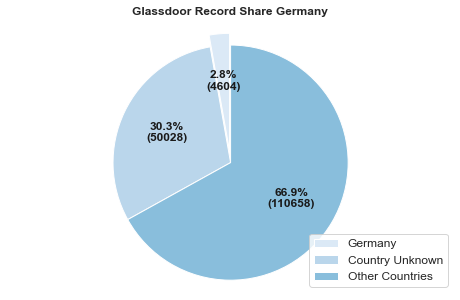

In [746]:
# Create pie chart displaying share of Germany, other and unknown countries 
f, axes = plt.subplots(1, figsize=(8,5))
            
pie_country_share_sizes = [glassdoor_germany_country, glassdoor_na_country, 
                           glassdoor_records - glassdoor_na_country - glassdoor_germany_country]
pie_country_share_labels = ('Germany', 'Country Unknown', 'Other Countries')
plot_pie(axes, pie_country_share_sizes, pie_country_share_labels, pct_value_formatter_glassdoor, 
         'Glassdoor Record Share Germany')

The pie chart above illustrates the share of job listings records for Germany that have been extracted and cleaned from the original dataset.

In [747]:
# All job listing records have no null values, besides for the features: location, normalized_job_title, n_employees and 
# industry
job_location_not_null = glassdoor_clean.location.notnull().sum()
job_normalized_title_not_null = glassdoor_clean.normalized_job_title.notnull().sum()
job_n_employees_not_null = glassdoor_clean.n_employees.notnull().sum()
job_industry_not_null = glassdoor_clean.industry.notnull().sum()
job_features_not_null = glassdoor_clean[glassdoor_clean.location.notnull() & glassdoor_clean.normalized_job_title.notnull() &
                                        glassdoor_clean.n_employees.notnull() & glassdoor_clean.industry.notnull()].shape[0]

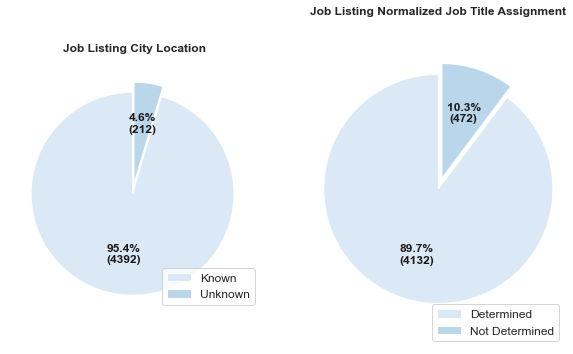

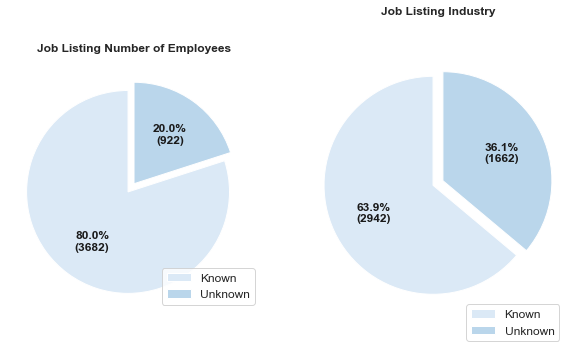

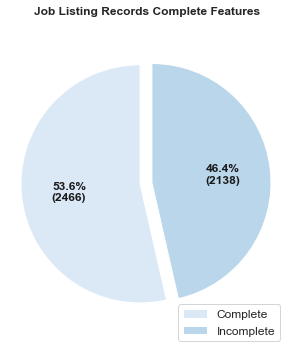

In [748]:
# Create pie charts displaying number of value not null for relevant feature of job listings data (`glassdoor_clean` table) 
f, axes = plt.subplots(1, 2, figsize=(10,6))

pie_location_share_sizes = [job_location_not_null, glassdoor_clean.shape[0] - job_location_not_null]
pie_location_share_labels = ('Known', 'Unknown')
plot_pie(axes[0], pie_location_share_sizes, pie_location_share_labels, pct_value_formatter_jobs, 'Job Listing City Location')

pie_normalized_title_share_sizes = [job_normalized_title_not_null, glassdoor_clean.shape[0] - job_normalized_title_not_null]
pie_normalized_title_share_labels = ('Determined', 'Not Determined')
plot_pie(axes[1], pie_normalized_title_share_sizes, pie_normalized_title_share_labels, pct_value_formatter_jobs, 
         'Job Listing Normalized Job Title Assignment')

f, axes = plt.subplots(1, 2, figsize=(10,6))

pie_n_employees_share_sizes = [job_n_employees_not_null, glassdoor_clean.shape[0] - job_n_employees_not_null]
pie_n_employees_share_labels = ('Known', 'Unknown')
plot_pie(axes[0], pie_n_employees_share_sizes, pie_n_employees_share_labels, pct_value_formatter_jobs, 
         'Job Listing Number of Employees')

pie_industry_share_sizes = [job_industry_not_null, glassdoor_clean.shape[0] - job_industry_not_null]
pie_industry_share_labels = ('Known', 'Unknown')
plot_pie(axes[1], pie_industry_share_sizes, pie_industry_share_labels, pct_value_formatter_jobs, 
         'Job Listing Industry')

f, axes = plt.subplots(1, figsize=(5,6))
pie_features_share_sizes = [job_features_not_null, glassdoor_clean.shape[0] - job_features_not_null]
pie_features_share_labels = ('Complete', 'Incomplete')
plot_pie(axes, pie_features_share_sizes, pie_features_share_labels, pct_value_formatter_jobs, 
         'Job Listing Records Complete Features')

95.4% of the job listings have known values for the city (`location`). For 89.7% of the job listings a normalized job title (`normalized_job_titles`) has been determined. The number of employees (`n_employees`) is known for 80.0%. 63.9% have a industry (`industry`) given. Only 53.6% of the records have no null values for any feature.

2019-10-24    360
2019-11-03    323
2019-11-07    312
2019-10-14    307
2019-11-06    284
             ... 
2019-06-19      1
2019-09-23      1
2019-08-25      1
2019-08-28      1
2019-08-05      1
Name: posted, Length: 80, dtype: int64
26838    2019-11-10
124710   2019-11-10
84653    2019-11-10
60678    2019-11-10
41806    2019-11-10
            ...    
10056    2019-03-20
88401    2019-03-13
18505    2018-10-04
86095    2018-10-04
96016    2018-10-04
Name: posted, Length: 4604, dtype: datetime64[ns]


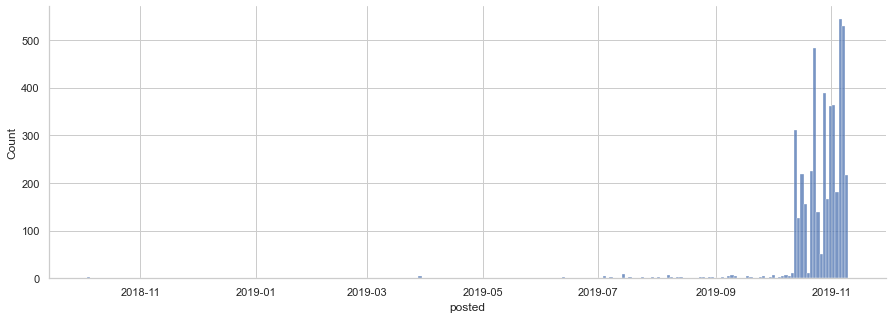

In [749]:
# Distribution of feature `posted` as histogram
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
ax = sns.histplot(glassdoor_clean.posted)
sns.despine()
print(glassdoor_clean.posted.value_counts())
print(glassdoor_clean.posted.sort_values(ascending=False))

In [750]:
print('{}, {:.2%}'.format((glassdoor_clean.posted <= np.datetime64('2019-10-10')).sum(), 
      (glassdoor_clean.posted <= np.datetime64('2019-10-10')).sum() / glassdoor_clean.posted.shape[0]))

123, 2.67%


The histogram above shows the distribution of `posted` dates. Due to some outliers the data looks very left skewed. Less than 3% (123 of 4604 records) of the data has a posted date before the 11th of October 2019. Let's ignore the outliers and zoom in. There is no need to drop the outliers.

97.33% of data is shown without outliers.


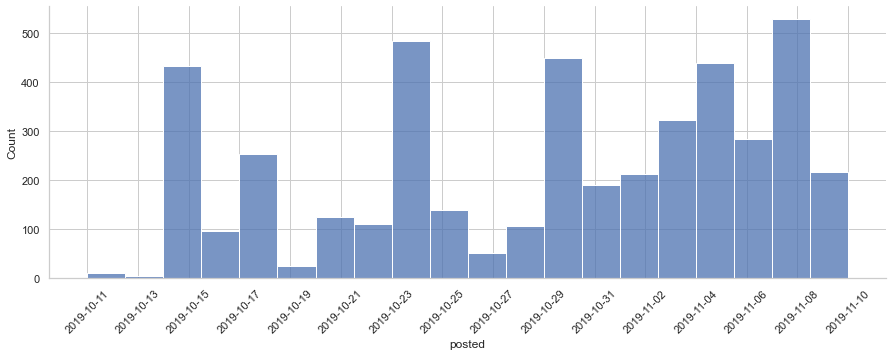

In [751]:
# Distribution of feature `posted` without outliers as histogram
posted_mask_dv = glassdoor_clean.posted > np.datetime64('2019-10-10')
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
ax = sns.histplot(glassdoor_clean[posted_mask_dv].posted)
xticks = np.arange(np.datetime64('2019-10-11'), np.datetime64('2019-11-12'), 2)
plt.xticks(xticks, rotation=45)
sns.despine()
print('{:.2%} of data is shown without outliers.'.format((posted_mask_dv).sum() / glassdoor_clean.posted.shape[0]))

The `posted` date distribution above unveils that 97% of the job listings has been posted between 2019-10-11 and 2019-11-10. It's a multimodal distribution.

89.75% (4132) of data has a normalized job title


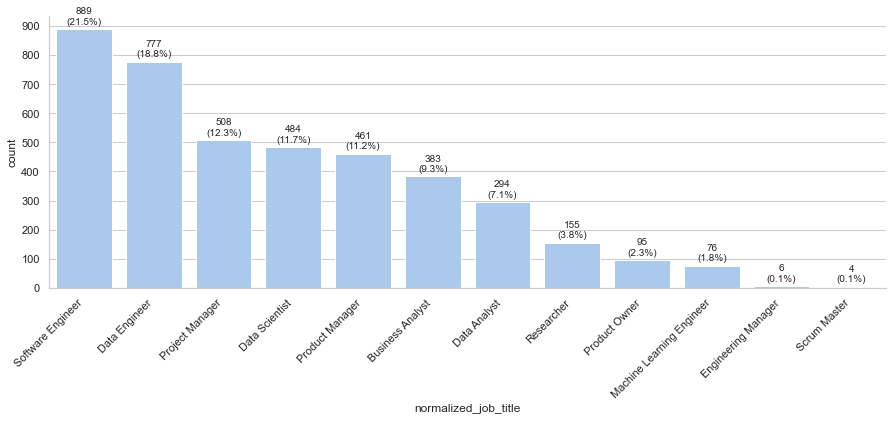

In [752]:
# Distribution of normalized titles sorted by highest count from left to right as countplot 
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
ax = sns.countplot(data=glassdoor_clean, x=glassdoor_clean.normalized_job_title, 
                   order=glassdoor_clean.normalized_job_title.value_counts().index,
                   color=sns.color_palette('pastel')[0])
for bar, label in zip(ax.patches, glassdoor_clean.normalized_job_title.value_counts().values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, 
             '{}\n({:.1%})'.format(label, label/job_normalized_title_not_null), ha='center', va='bottom')
ax.set_xticklabels(glassdoor_clean.normalized_job_title.value_counts().index, ha='right', va='top', rotation=45)
yticks = np.arange(0, 910, 100)
plt.yticks(yticks, yticks)
sns.despine()

print('{:.2%} ({}) of data has a normalized job title'.format(job_normalized_title_not_null /
                                                              glassdoor_clean.normalized_job_title.shape[0],
                                                              job_normalized_title_not_null))

The countplot above shows the distribution of 89.75% of the job listings which have a `normalized_job_title`. The distribution is sorted from high to low frequency from left ot right. Out of this 89.75 %, for roughly 40% of the job listings the normalized job titles are Software Engineer and Data engineer. The number of job listings for Software Engineers is slightly larger than for Data engineers. Project Manager, Data Scientist and Product Manager have a roughly similar job listing frequencies (+-50 counts), which represents in sum approx. 35% of the listings. The next higher frequencies are job listings for Business Analyst and Data Analyst. Those sum up to roughly 16%. The remaining 9% are Researcher, Product Owner, Machine Learning Engineer, Engineering Manager and Scrum Master job listings. The Engineering Manager and Scrum Master job listing frequencies are only covering 10 records and are outliers. For further investigations they will not be considered. The normalized job titles do not have information about the job level, which means there is no differentiation between interns, entries or seniors.

79.97% (3682) of data contains number of employees information


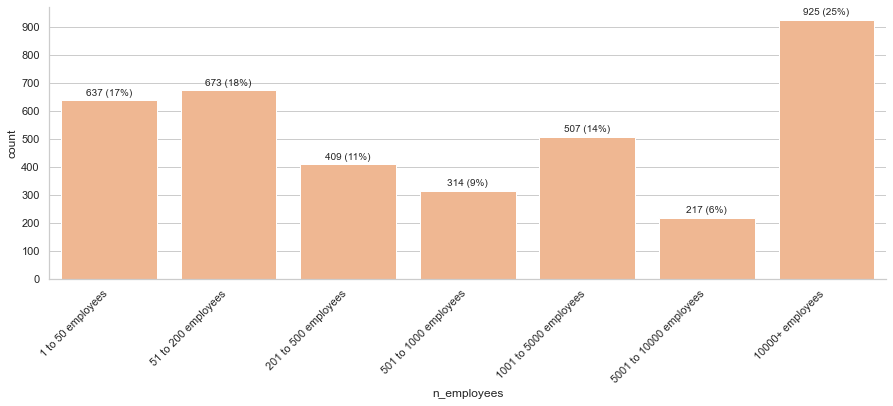

In [753]:
# Distribution of number of employees sorted by employee category size from left to right as countplot 
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
ax = sns.countplot(data=glassdoor_clean, x=glassdoor_clean.n_employees, 
                   color=sns.color_palette('pastel')[1])
val_counts_n_employees = dict(glassdoor_clean.n_employees.value_counts())
val_counts_n_employees_patches = []
for c in n_employees_type.categories:
    val_counts_n_employees_patches.append(val_counts_n_employees.get(c))
for bar, label in zip(ax.patches, val_counts_n_employees_patches):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, 
             '{} ({:.0%})'.format(label, label/job_n_employees_not_null), ha='center', va='bottom')
ax.set_xticklabels(n_employees_type.categories, ha='right', va='top', rotation=45)
yticks = np.arange(0, 960, 100)
plt.yticks(yticks, yticks)
sns.despine()
print('{:.2%} ({}) of data contains number of employees information'.format(job_n_employees_not_null / 
                                                                            glassdoor_clean.n_employees.shape[0], 
                                                                            job_n_employees_not_null))

The distributions of the sorted categorical variable `n_employee` is illustrated as countplot above. For roughly 80% of the job listings records the company size known. Those job listings are well distributed among all company sizes. Companies with more than 10000+ employees provide the most job listings (25%). The two smallest companies sizes have the next highest shares with each almost 20%. The second largest companies with 5001 to 10000 employees provide the lowest number of job listings. The remaining company sizes have a frequency in between.

340 number of unique locations
95.40% (4392) of data contains a city as location
64.66% (2840) of the cities are the top 10
55.40% (2433) of the cities are the top 5


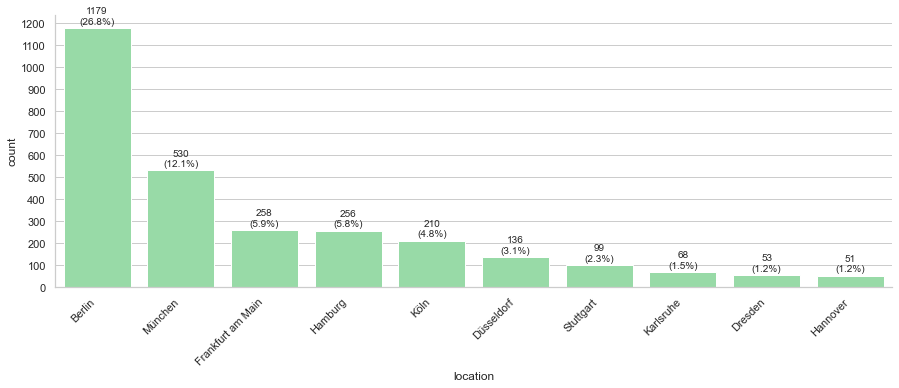

In [754]:
# Distribution of locations sorted by highest count from left to right as countplot 
top_10_job_locations_ordered = glassdoor_clean.location.value_counts()[:10]
mask_top_10_job_locations = glassdoor_clean.location.isin(top_10_job_locations_ordered.index)
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
ax = sns.countplot(data=glassdoor_clean[mask_top_10_job_locations], x='location', 
                   order=top_10_job_locations_ordered.index,
                   color=sns.color_palette('pastel')[2])
for bar, label in zip(ax.patches, top_10_job_locations_ordered.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, 
             '{}\n({:.1%})'.format(label, label/job_location_not_null), ha='center', va='bottom')
ax.set_xticklabels(top_10_job_locations_ordered.index, ha='right', va='top', rotation=45)
yticks = np.arange(0, 1210, 100)
plt.yticks(yticks, yticks)
sns.despine()
print('{} number of unique locations'.format(glassdoor_clean.location.nunique()))
print('{:.2%} ({}) of data contains a city as location'.format(job_location_not_null / glassdoor_clean.location.shape[0],
                                                               job_location_not_null))
print('{:.2%} ({}) of the cities are the top 10'.format(top_10_job_locations_ordered.sum() / job_location_not_null, 
                                                        top_10_job_locations_ordered.sum()))
print('{:.2%} ({}) of the cities are the top 5'.format(top_10_job_locations_ordered[:5].sum() / job_location_not_null, 
                                                       top_10_job_locations_ordered[:5].sum()))

The location is a city. It is known for 96% of the job listings. Since, the dataset contains 340 unique locations, only the Top 10 locations sorted by highest frequency have been plotted. The top 10 locations are representing 65% (2840 records) of the job listings that have a location provided. 55% (2433) of the records that have a location are within the top 5 locations. Berlin has the highest frequency with more than 25%. This is more than twice of the job listings for the location München (Munich) with roughly 12%. The third top location Frankfurt am Main, the forth Hamburg and fifth Köln (Cologne) have roughly half as much of listings as München. Other top 10 cities for job listings are Düsseldorf, Stuttgart, Karlsruhe, Dresden and Hannover.

91 number of unique industries
63.90% (2942) of data contains a industry
60.50% (1780) of the industries are the top 10
47.01% (1383) of the industries are the top 5
40.62% (1195) of the industries are the top 4


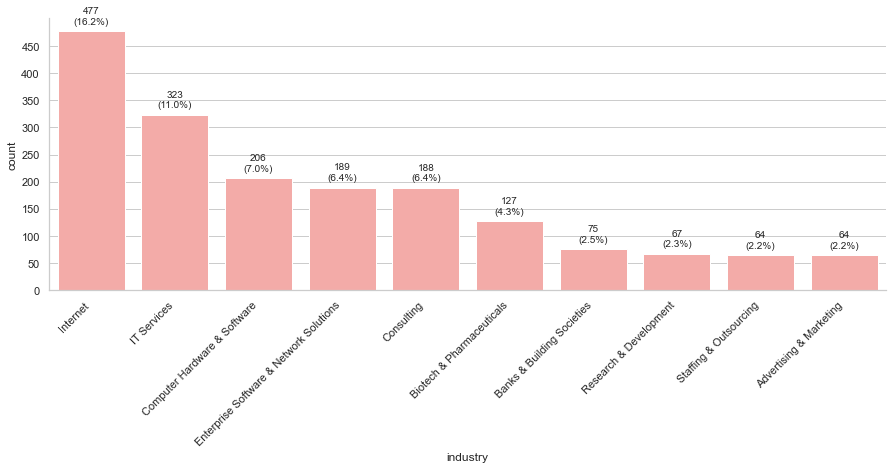

In [755]:
# Distribution of industry sorted by highest count from left to right as countplot 
top_10_job_industry_ordered = glassdoor_clean.industry.value_counts()[:10]
mask_top_10_job_industry = glassdoor_clean.industry.isin(top_10_job_industry_ordered.index)
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
ax = sns.countplot(data=glassdoor_clean[mask_top_10_job_industry], x='industry', 
                   order=top_10_job_industry_ordered.index,
                   color=sns.color_palette('pastel')[3])
for bar, label in zip(ax.patches, top_10_job_industry_ordered.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10,
             '{}\n({:.1%})'.format(label, label/job_industry_not_null), ha='center', va='bottom')
ax.set_xticklabels(top_10_job_industry_ordered.index, ha='right', va='top', rotation=45)
yticks = np.arange(0, 500, 50)
plt.yticks(yticks, yticks)
sns.despine()
print('{} number of unique industries'.format(glassdoor_clean.industry.nunique()))
print('{:.2%} ({}) of data contains a industry'.format(job_industry_not_null /  glassdoor_clean.industry.shape[0],
                                                       job_industry_not_null))
print('{:.2%} ({}) of the industries are the top 10'.format(top_10_job_industry_ordered.sum() / job_industry_not_null,
                                                            top_10_job_industry_ordered.sum()))
print('{:.2%} ({}) of the industries are the top 5'.format(top_10_job_industry_ordered[:5].sum() / job_industry_not_null,
                                                           top_10_job_industry_ordered[:5].sum()))
print('{:.2%} ({}) of the industries are the top 4'.format(top_10_job_industry_ordered[:4].sum() / job_industry_not_null,
                                                           top_10_job_industry_ordered[:4].sum()))

For 64% of the job listings the employers industry is known. Since, the dataset contains 91 unique industries, only the Top 10 industries sorted by highest frequency have been plotted. The top 10 industries are representing 60% (1780 records) of the job listings that have an industry provided. 47% (1383) of the records that have an indsutry are within the top 5 industries.

The Internet industry has the highest frequency with more than 16%. The IT Services industry covers 11%, the Computer Hardware & Software industry 7% and Enterprise Software & Network Solutions industry covers roughly 6.5%. The fifth top industry is Consulting with roughly 6.5%, too. It's remarkable that the top 4 industries are IT-related and sum up to a share of approx. 40.5%. 

Other top 10 industries can be taken from the graphic above.

<a id='unisalary'></a>
### 2.2.2. Salaries
After the univariate exploration of the job listings (`glassdoor_clean` dataset), the project continues with the reported job title salaries (`salaries_clean` dataset). Initially, the shares of records that are not null for the main features of interest will be visualized.

In [756]:
# All salaries records have no null values, besides for the features: normalized_job_title, n_employees and industry
salaries_normalized_title_not_null = salaries_clean.normalized_job_title.notnull().sum()
salaries_n_employees_not_null = salaries_clean.n_employees.notnull().sum()
salaries_industry_not_null = salaries_clean.industry.notnull().sum()
salaries_features_not_null = salaries_clean[salaries_clean.normalized_job_title.notnull() & 
                                            salaries_clean.n_employees.notnull() & 
                                            salaries_clean.industry.notnull()].shape[0]

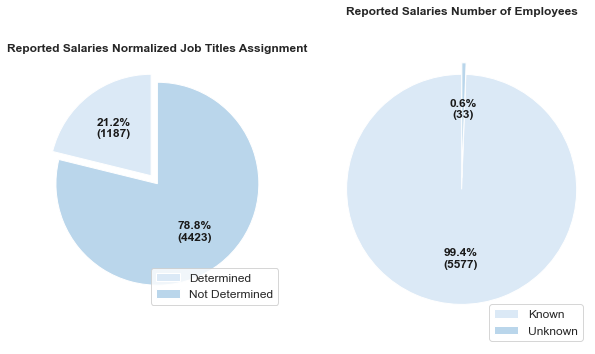

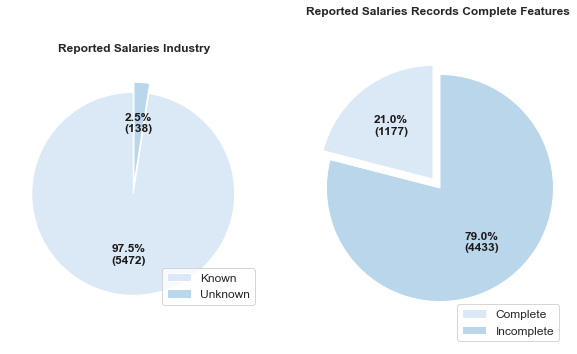

In [757]:
# Create pie charts displaying number of value not null for relevant feature of reported salaries data (`salaries_clean` table) 
f, axes = plt.subplots(1, 2, figsize=(10,6))

pie_normalized_title_share_sizes = [salaries_normalized_title_not_null, salaries_clean.shape[0] - salaries_normalized_title_not_null]
pie_normalized_title_share_labels = ('Determined', 'Not Determined')
plot_pie(axes[0], pie_normalized_title_share_sizes, pie_normalized_title_share_labels, pct_value_formatter_salaries, 
         'Reported Salaries Normalized Job Titles Assignment')

pie_n_employees_share_sizes = [salaries_n_employees_not_null, salaries_clean.shape[0] - salaries_n_employees_not_null]
pie_n_employees_share_labels = ('Known', 'Unknown')
plot_pie(axes[1], pie_n_employees_share_sizes, pie_n_employees_share_labels, pct_value_formatter_salaries, 
         'Reported Salaries Number of Employees')

f, axes = plt.subplots(1, 2, figsize=(10,6))

pie_industry_share_sizes = [salaries_industry_not_null, salaries_clean.shape[0] - salaries_industry_not_null]
pie_industry_share_labels = ('Known', 'Unknown')
plot_pie(axes[0], pie_industry_share_sizes, pie_industry_share_labels, pct_value_formatter_salaries, 
         'Reported Salaries Industry')

pie_features_share_sizes = [salaries_features_not_null, salaries_clean.shape[0] - salaries_features_not_null]
pie_features_share_labels = ('Complete', 'Incomplete')
plot_pie(axes[1], pie_features_share_sizes, pie_features_share_labels, pct_value_formatter_salaries, 
         'Reported Salaries Records Complete Features')

For only 21.2% of the reported job title salaries a normalized job title (`normalized_job_titles`) has been determined. The normalized job titles are the same unique values as for job listings. The number of employees (`n_employees`) is known for 99.4%. 97.5% have no null values for industry (`industry`). Only 21.0% of the records have no null values for any feature.

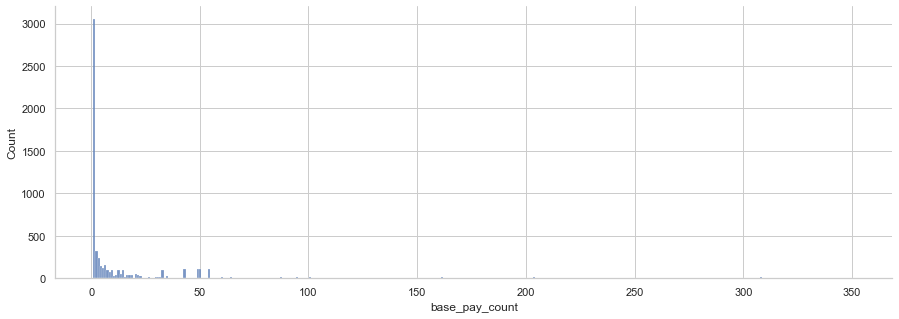

In [758]:
# Distribution of `base_pay_count` as histogram
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
ax = sns.histplot(salaries_clean.base_pay_count)
sns.despine()

The histogram above shows the distribution of the numeric `base_pay_count` variable. Due to some outliers the data looks very right skewed with a long tail. Let's apply a log transformation.

In [759]:
# Print descriptive statistics for series base_pay_count transformed using np.log10, 
# which equals 'log' setting for plot parameter xscale
print(np.log10(salaries_clean.base_pay_count).describe())

count    5610.000000
mean        0.547375
std         0.617852
min         0.000000
25%         0.000000
50%         0.301030
75%         1.000000
max         2.545307
Name: base_pay_count, dtype: float64


Percentile 54: 2.0
Percentile 55: 3.0
Percentile 76: 10.0
Percentile 77: 12.0
Percentile 95: 50.0
Percentile 96: 54.0


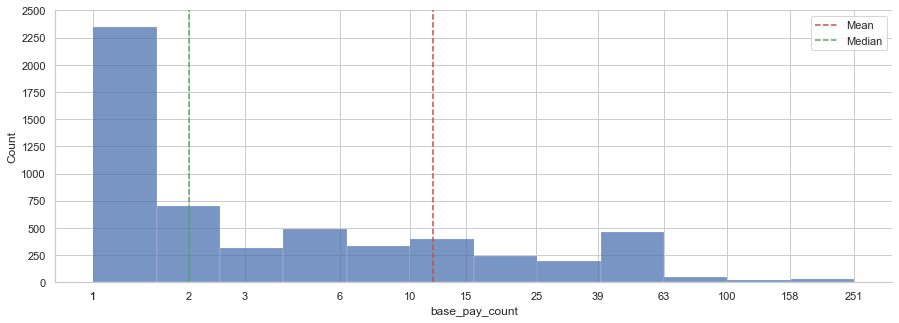

In [760]:
# Distribution of `base_pay_count` as histogram using a log scale
bins_x = 10 ** np.arange(0, 2.55, 0.2)
x_ticks = [int(x) for x in bins_x]
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
ax = sns.histplot(salaries_clean.base_pay_count, bins=bins_x)
ax.set_xscale('log')
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks)
yticks = np.arange(0, 2700, 250)
plt.yticks(yticks, yticks)
plt.axvline(salaries_clean.base_pay_count.mean(), label='Mean', color='r', linestyle='--')
plt.axvline(salaries_clean.base_pay_count.median(), label='Median', color='g', linestyle='--')
plt.legend()
sns.despine(top=True)
print('Percentile 54: {}'.format(salaries_clean.base_pay_count.quantile(.54)))
print('Percentile 55: {}'.format(salaries_clean.base_pay_count.quantile(.55)))
print('Percentile 76: {}'.format(salaries_clean.base_pay_count.quantile(.76)))
print('Percentile 77: {}'.format(salaries_clean.base_pay_count.quantile(.77)))
print('Percentile 95: {}'.format(salaries_clean.base_pay_count.quantile(.95)))
print('Percentile 96: {}'.format(salaries_clean.base_pay_count.quantile(.96)))

Each record has a value for `base_pay_count`. After applying the log transformation, a strong right skewed unimodal distribution is precisely visible. The highest counts are for 1 and 2 values. Those 1 and 2 values sum up to more than 50%, which means that just 1 or 2 salary per job title and pay period has been reported for more than 50% of the records. Another roughly 25% of the records has more than 3 but not more than 10 reported salaries. Less than roughly 5% of the records have more than 50 salaries reported. The remaining 20% have more than 10 but less than 50 reported salaries. It's seems to be worth to use this variable in further investigations, e.g., if the sum of `base_pay_count` for records grouped by `normalized_job_title` and `pay_period` is high, then the significance of the low, median and high base pay salaries is high.

86.02% (4826) is assigned to ANNUAL
5.58% (313) is assigned to MONTHLY
8.40% (471) is assigned to HOURLY


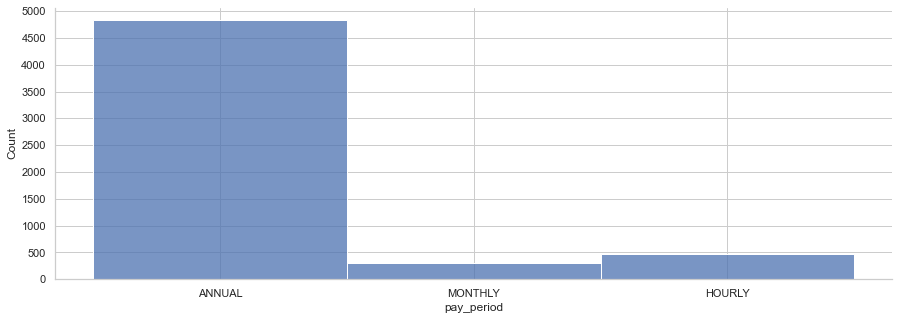

In [761]:
# Distribution of `pay_period` as histogram
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
ax = sns.histplot(salaries_clean.pay_period)
yticks = np.arange(0, 5100, 500)
plt.yticks(yticks, yticks)
sns.despine()
print('{:.2%} ({}) is assigned to ANNUAL'.format((salaries_clean.pay_period == 'ANNUAL').sum() / 
                                                salaries_clean.pay_period.shape[0], 
                                                (salaries_clean.pay_period == 'ANNUAL').sum()))
print('{:.2%} ({}) is assigned to MONTHLY'.format((salaries_clean.pay_period == 'MONTHLY').sum() / 
                                                salaries_clean.pay_period.shape[0], 
                                                (salaries_clean.pay_period == 'MONTHLY').sum()))
print('{:.2%} ({}) is assigned to HOURLY'.format((salaries_clean.pay_period == 'HOURLY').sum() / 
                                                salaries_clean.pay_period.shape[0], 
                                                (salaries_clean.pay_period == 'HOURLY').sum()))

The distribution of the sorted categorical `pay_period` variable is displayed as histogram above. There exist no null values. 86% (4826 records) of the salaries reported represent the annual base pay salary. Monthly reported salaries are roughly 5.5% (313) of the records. The remaining 8.5% (471) are hourly reported salaries.

The further analysis will only focus on annually reported salaries.

In [762]:
# Create new dataframe selecting only records with annaul reported salaries
annual_salaries = salaries_clean[salaries_clean.pay_period == 'ANNUAL'].copy()

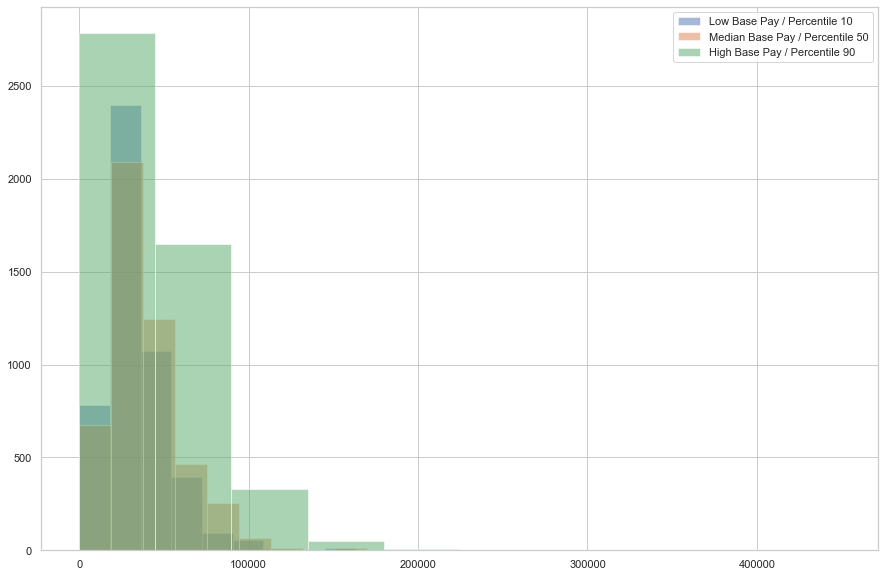

In [763]:
# Distribution of `pay_percentile_10`, `pay_percentile_50` and `pay_percentile_90` for annual reported salaries 
# in a single histogram
plt.figure(figsize=(15,10))
plt.hist(annual_salaries.pay_percentile_10, alpha=.5, label='Low Base Pay / Percentile 10')
plt.hist(annual_salaries.pay_percentile_50, alpha=.5, label='Median Base Pay / Percentile 50')
plt.hist(annual_salaries.pay_percentile_90, alpha=.5, label='High Base Pay / Percentile 90')
plt.legend();

The histogram above shows the distribution of `pay_percentile_10`, `pay_percentile_50` and `pay_percentile_90` for annual reported salaries in a single histogram. For those 3 features no null values exist. The illustration does not replace the need to plot each numeric variable in a dedicated histogram to increase the explanatory power and readability. Still, it shows that all 3 variables seem to be right skewed and have a long tail. This means that lower salaries are more often reported than higher salaries. Let's plot all features in a dedicated histogram using a log transformation scale.

count    4826.000000
mean        4.480907
std         0.216211
min         1.479037
25%         4.343583
50%         4.472340
75%         4.615302
max         5.258194
Name: pay_percentile_10, dtype: float64
count      4826.000000
mean      34175.544473
std       18667.929251
min          30.132646
25%       22058.845931
50%       29671.542926
75%       41238.432638
max      181215.117319
Name: pay_percentile_10, dtype: float64


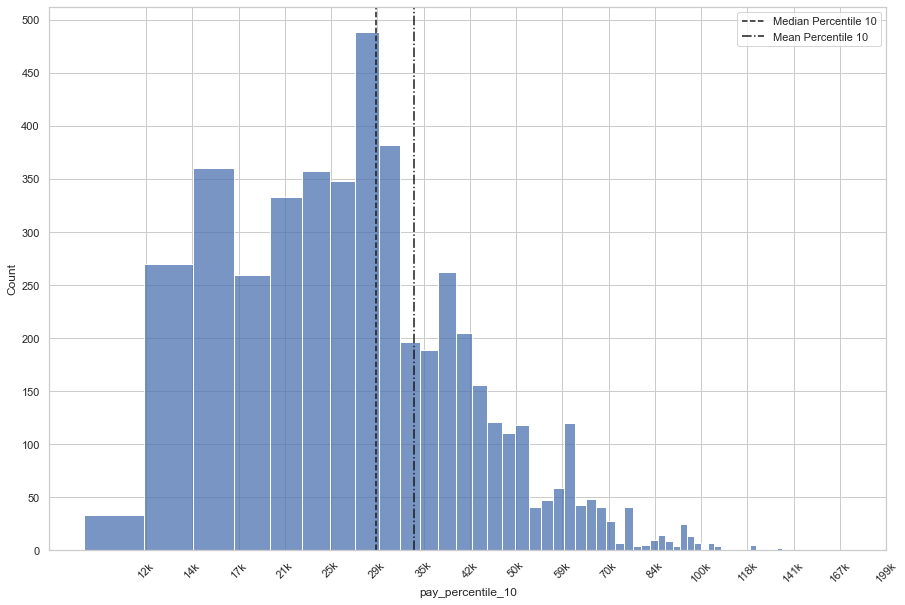

In [764]:
# Distribution of `pay_percentile_10` for annual reported salaries as histogram on log scale
plt.figure(figsize=(15,10))
bins_x = np.arange(10000, 140000, 2500)
sns.histplot(annual_salaries.pay_percentile_10, bins=bins_x)
plt.xscale('log')
xticks = 10 ** np.arange(4.1, 5.3, 0.075)
xtickslabels = ['{}k'.format(int(x/1000)) for x in xticks]
plt.xticks(xticks, xtickslabels, rotation=45)
yticks = np.arange(0, 510, 50)
plt.yticks(yticks, yticks)
plt.axvline(annual_salaries.pay_percentile_10.median(), color='k', linestyle='--', linewidth=1.5, label='Median Percentile 10')
plt.axvline(annual_salaries.pay_percentile_10.mean(), color='k', linestyle='-.', linewidth=1.5, label='Mean Percentile 10')
plt.legend()
print(np.log10(annual_salaries.pay_percentile_10).describe())
print(annual_salaries.pay_percentile_10.describe())

The right skewed distribution was confirmed by appyling a log transformation for `pay_percentile_10` and plotting the mean and median in the histogram above. The top of the reported low base salary is around the median of 30k€. The interquartile range (IQR) starts roughly 7k€ (23k€) below and end 11k€ (41k€) above the median. 

count    4826.000000
mean        4.544128
std         0.226190
min         1.498817
25%         4.393313
50%         4.525700
75%         4.707289
max         5.275361
Name: pay_percentile_50, dtype: float64
count      4826.000000
mean      39859.883092
std       21536.947071
min          31.536769
25%       24735.043592
50%       33550.600001
75%       50967.037093
max      188521.668176
Name: pay_percentile_50, dtype: float64


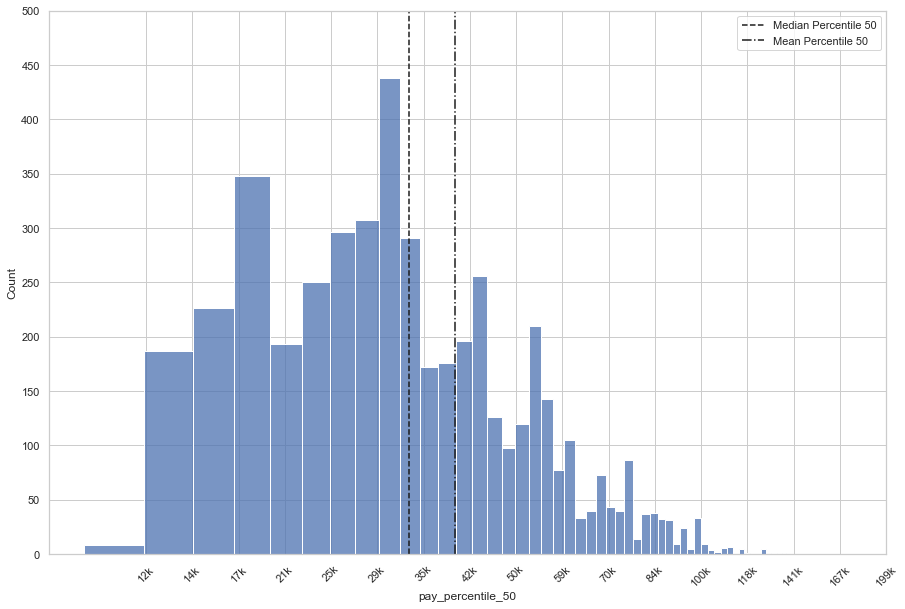

In [765]:
# Distribution of `pay_percentile_50` for annual reported salaries as histogram on log scale
plt.figure(figsize=(15,10))
bins_x = np.arange(10000, 140000, 2500)
sns.histplot(annual_salaries.pay_percentile_50, bins=bins_x)
plt.xscale('log')
xticks = 10 ** np.arange(4.1, 5.3, 0.075)
xtickslabels = ['{}k'.format(int(x/1000)) for x in xticks]
plt.xticks(xticks, xtickslabels, rotation=45)
yticks = np.arange(0, 510, 50)
plt.yticks(yticks, yticks)
plt.axvline(annual_salaries.pay_percentile_50.median(), color='k', linestyle='--', linewidth=1.5, label='Median Percentile 50')
plt.axvline(annual_salaries.pay_percentile_50.mean(), color='k', linestyle='-.', linewidth=1.5, label='Mean Percentile 50')
plt.legend()
print(np.log10(annual_salaries.pay_percentile_50).describe())
print(annual_salaries.pay_percentile_50.describe())

The right skewed distribution was confirmed by appyling a log transformation for `pay_percentile_50` and plotting the mean and median in the histogram above. The top of the reported average base salary is slightly less than the median of 34k€. The interquartile range (IQR) starts roughly 10k€ (24k€) below and ends 17k€ (51k€) above the median. 

count    4826.000000
mean        4.605511
std         0.247939
min         1.515230
25%         4.435233
50%         4.592253
75%         4.791608
max         5.652426
Name: pay_percentile_90, dtype: float64
count      4826.000000
mean      47150.108382
std       28368.150160
min          32.751379
25%       27241.609443
50%       39106.851551
75%       61888.226314
max      449185.302570
Name: pay_percentile_90, dtype: float64


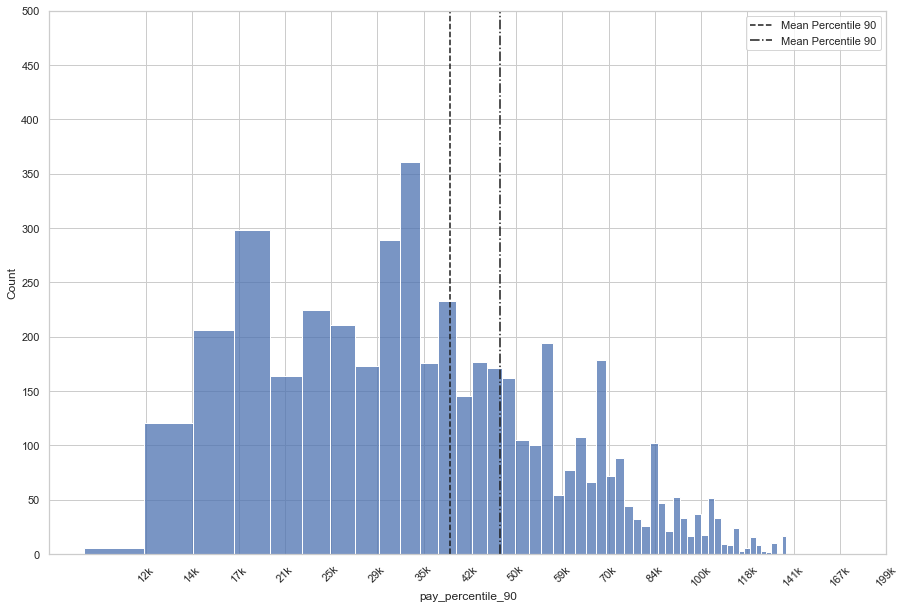

In [766]:
# Distribution of `pay_percentile_90` for annual reported salaries as histogram on log scale
plt.figure(figsize=(15,10))
bins_x = np.arange(10000, 140000, 2500)
sns.histplot(annual_salaries.pay_percentile_90, bins=bins_x)
plt.xscale('log')
xticks = 10 ** np.arange(4.1, 5.3, 0.075)
xtickslabels = ['{}k'.format(int(x/1000)) for x in xticks]
plt.xticks(xticks, xtickslabels, rotation=45)
yticks = np.arange(0, 510, 50)
plt.yticks(yticks, yticks)
plt.axvline(annual_salaries.pay_percentile_90.median(), color='k', linestyle='--', linewidth=1.5, label='Mean Percentile 90')
plt.axvline(annual_salaries.pay_percentile_90.mean(), color='k', linestyle='-.', linewidth=1.5, label='Mean Percentile 90')
plt.legend()
print(np.log10(annual_salaries.pay_percentile_90).describe())
print(annual_salaries.pay_percentile_90.describe())

The right skewed distribution was confirmed by appyling a log transformation for `pay_percentile_90` and plotting the mean and median in the histogram above. The top of the reported average base salary is roughly at 33k€, which is less than median of 39k€. The interquartile range (IQR) starts roughly 12k€ (27k€) below and ends 23k€ (62k€) above the median.

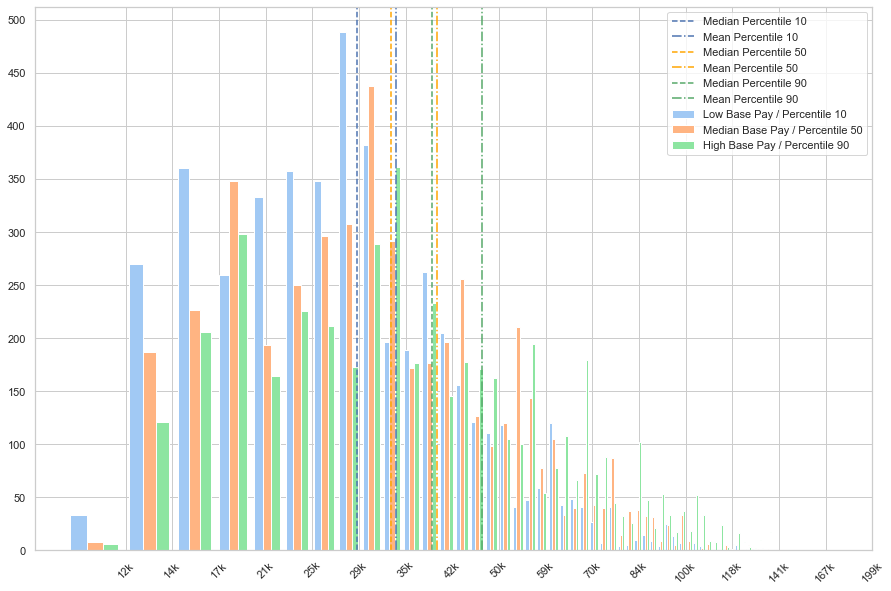

In [767]:
# Distribution of `pay_percentile_10`, `pay_percentile_50` and `pay_percentile_90` for annual reported salaries 
# in a single histogram without overlay of the feature bars and a log transformation applied
percentiles_annual = annual_salaries[['pay_percentile_10', 'pay_percentile_50', 'pay_percentile_90']]
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
bins_x = np.arange(10000, 140000, 2500)
percentile_colors = sns.color_palette('pastel')[:percentiles_annual.shape[1]]
percentiles_labels = ['Low Base Pay / Percentile 10', 'Median Base Pay / Percentile 50', 'High Base Pay / Percentile 90']
plt.hist(percentiles_annual, bins=bins_x, color=percentile_colors, label=percentiles_labels)
plt.xscale('log')
xticks = 10 ** np.arange(4.1, 5.3, 0.075)
xtickslabels = ['{}k'.format(int(x/1000)) for x in xticks]
plt.xticks(xticks, xtickslabels, rotation=45)
yticks = np.arange(0, 550, 50)
plt.yticks(yticks, yticks)

plt.axvline(percentiles_annual.pay_percentile_10.median(), color='b', linestyle='--', linewidth=1.5, 
            label='Median Percentile 10')
plt.axvline(percentiles_annual.pay_percentile_10.mean(), color='b', linestyle='-.', linewidth=1.5, 
            label='Mean Percentile 10')

plt.axvline(percentiles_annual.pay_percentile_50.median(), color='orange', linestyle='--', linewidth=1.5, 
            label='Median Percentile 50')
plt.axvline(percentiles_annual.pay_percentile_50.mean(), color='orange', linestyle='-.', linewidth=1.5, 
            label='Mean Percentile 50')

plt.axvline(percentiles_annual.pay_percentile_90.median(), color='g', linestyle='--', linewidth=1.5, 
            label='Median Percentile 90')
plt.axvline(percentiles_annual.pay_percentile_90.mean(), color='g', linestyle='-.', linewidth=1.5, 
            label='Mean Percentile 90')

plt.legend();

The histogram above shows the distribution of `pay_percentile_10`, `pay_percentile_50` and `pay_percentile_90` for annual reported salaries in a single histogram. The feature bars do not overlay and a log transformation was applied. Additionally, the medians and means for all features are plotted.

Overall, the reported base pay salaries cover a large range from very low to very high reported salaries. There are many outliers. The lower or higher the reported base pays are, the fewer reports are available. It will be interesting to see the relationship with normalized job titles even without having the information about the job level.

21.16% (1187) of data has a normalized job title


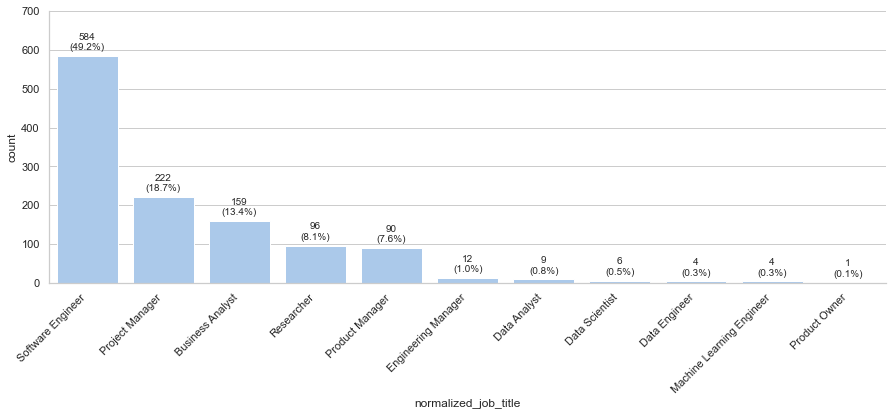

In [768]:
# Distribution of normalized titles sorted by highest count from left to right as countplot 
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
ax = sns.countplot(data=salaries_clean, x=salaries_clean.normalized_job_title, 
                   order=salaries_clean.normalized_job_title.value_counts().index,
                   color=sns.color_palette('pastel')[0])
for bar, label in zip(ax.patches, salaries_clean.normalized_job_title.value_counts().values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, 
             '{}\n({:.1%})'.format(label, label/salaries_normalized_title_not_null), ha='center', va='bottom')
ax.set_xticklabels(salaries_clean.normalized_job_title.value_counts().index, ha='right', va='top', rotation=45)
yticks = np.arange(0, 710, 100)
plt.yticks(yticks, yticks)
sns.despine()

print('{:.2%} ({}) of data has a normalized job title'.format(salaries_normalized_title_not_null / 
                                                              salaries_clean.normalized_job_title.shape[0], 
                                                              salaries_normalized_title_not_null))

The countplot above shows the distribution of 21.16% (1187) of the records that have a `normalized_job_title`. The distribution is sorted from high to low frequency from left ot right. Out of this 21.16%, for roughly 49% of the reported salaries the normalized job titles is Software Engineer. This is more than twice of the second largest frequency share representing Project Manager with approx. 19%. Business Analyst have the third largest frequency share with  approx. 13%. Just a slightly different share of roughly 8% have Researcher and Product Owner. The top 5 cover 97% of the frequency share. The remaining 3% share are covered by Engineering Manager, Data Analyst, Data Scientist, Data Engineer, Machine Learning Engineer and Product Owner. That's why for further reported salary investigations only the top 5 will be considered.

For the normalized job titles determined for job listings are less frequent reported salaries present. Especially, the job titles Data Analyst, Data Scientist and Data Engineer had high frequencies for job listings, but almost have no salary reports. 

Additionally, we have no information about the job level for reported salaries, which means there is no differentiation between interns, entries or seniors.

99.41% (5577) of data contains number of employees information


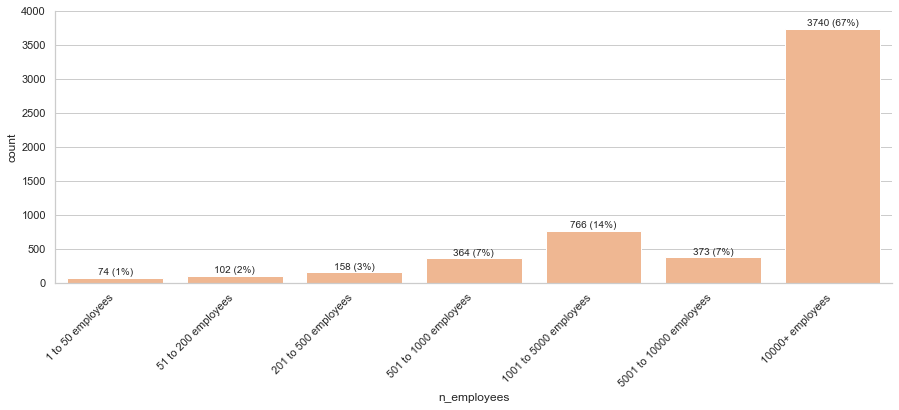

In [769]:
# Distribution of number of employees sorted by employee category size from left to right as countplot 
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
ax = sns.countplot(data=salaries_clean, x=salaries_clean.n_employees, 
                   color=sns.color_palette('pastel')[1])
val_counts_n_employees = dict(salaries_clean.n_employees.value_counts())
val_counts_n_employees_patches = []
for c in n_employees_type.categories:
    val_counts_n_employees_patches.append(val_counts_n_employees.get(c))
for bar, label in zip(ax.patches, val_counts_n_employees_patches):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, 
             '{} ({:.0%})'.format(label, label/salaries_n_employees_not_null), ha='center', va='bottom')
ax.set_xticklabels(n_employees_type.categories, ha='right', va='top', rotation=45)
yticks = np.arange(0, 4010, 500)
plt.yticks(yticks, yticks)
sns.despine()
print('{:.2%} ({}) of data contains number of employees information'.format(salaries_n_employees_not_null / 
                                                                            salaries_clean.n_employees.shape[0],
                                                                            salaries_n_employees_not_null))

The distributions of the sorted categorical variable `n_employee` is illustrated as countplot above. For roughly 99% of the reported salary records the company size known. Especially for large companies with more than 10000+ employees, reported salaries are provided (67%). The second largest companies with 5001 to 10000 employees have a frequency share of 7%, which is similar to companies with 501 to 1000 employees. Companies 1001 to 5000 employees have the second largest frequency share with 14%. The remaining small companies only represent 5% of the frequency share.

65 is the number of unique industries
97.54% (5472) of data contains a industry
67.21% (3678) of the industries are the top 10
52.61% (2879) of the industries are the top 5


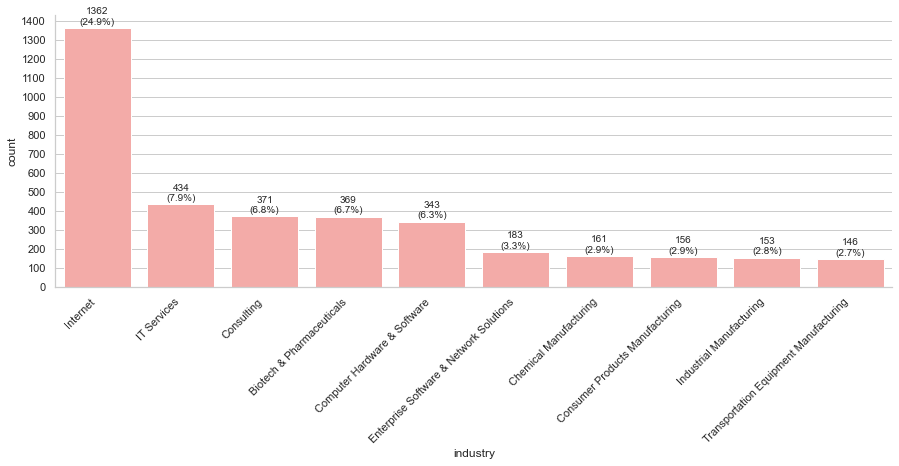

In [770]:
# Distribution of industry sorted by highest count from left to right as countplot 
top_10_salary_industry_ordered = salaries_clean.industry.value_counts()[:10]
mask_top_10_salary_industry = salaries_clean.industry.isin(top_10_salary_industry_ordered.index)
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
ax = sns.countplot(data=salaries_clean[mask_top_10_salary_industry], x='industry', 
                   order=top_10_salary_industry_ordered.index,
                   color=sns.color_palette('pastel')[3])
for bar, label in zip(ax.patches, top_10_salary_industry_ordered.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10,
             '{}\n({:.1%})'.format(label, label/salaries_industry_not_null), ha='center', va='bottom')
ax.set_xticklabels(top_10_salary_industry_ordered.index, ha='right', va='top', rotation=45)
yticks = np.arange(0, 1410, 100)
plt.yticks(yticks, yticks)
sns.despine()
print('{} is the number of unique industries'.format(salaries_clean.industry.nunique()))
print('{:.2%} ({}) of data contains a industry'.format(salaries_industry_not_null /  salaries_clean.industry.shape[0],
                                                       salaries_industry_not_null))
print('{:.2%} ({}) of the industries are the top 10'.format(top_10_salary_industry_ordered.sum() / 
                                                            salaries_industry_not_null, top_10_salary_industry_ordered.sum()))
print('{:.2%} ({}) of the industries are the top 5'.format(top_10_salary_industry_ordered[:5].sum() / 
                                                           salaries_industry_not_null, top_10_salary_industry_ordered[:5].sum()))

For 97.54% of the reported salaries records the employers industry is known. Since, the dataset contains 65 unique industries, only the top 10 industries sorted by highest frequency have been plotted. The top 10 industries are representing approx. 67% of the reported salaries that have an industry provided. Roughly 52% of the records that have an industry are within the top 5 industries.

The Internet industry has the highest frequency with approx. 25%. The IT Services industry covers 8%, the Consulting industry 7%, Biotech & Pharmaceuticals industry 7% and Computer Hardware & Software industry 6%. Those 4 industries have a comparable share that just slightly differs. This is true for the remaining top 10 industries, which can be taken from the graphic above. The share of each is slighly above or below of 3%.

It's remarkable that the top 10 contain 4 IT-related industries, which sum up to a share of approx. 43%.

<a id='unisum'></a>
### 2.2.3. Summary

#### Job listings (`glassdoor_clean` dataset)

53.6% of the records are complete. that means, they have no null values for the features `posted`, `location`, `normalized_job_title`, `n_employees` and `industry`.

97% of the job listings have been *posted* between 2019-10-11 and 2019-11-10. Based on the fact that the data was gathered on the 10th of December 2019, most listings are not older than 2 months. The remaining listings, especially the ones from 2018 and earlier 2019 might be outdated or a kind of permanent listings.

For 89.75% of the job listings a *normalized job title* could be assigned. The titles with the highest frequency are Software Engineer and Data engineer. Both represent already 40% out of the 89.75% of the listings. Other relevant titles that should be considered in further investigation are Project Manager, Data Scientist, Product Manager, Business Analyst, Data Analyst,  Researcher, Product Owner and Machine Learning Engineer. The Engineering Manager and Scrum Master job listing frequencies are only covering 10 records and are outliers. For further investigations they will not be considered. The normalized job titles do not have information about the job level, i.e. there is no differentiation between interns, entries or seniors.
 
For roughly 80% of the job listings records the *company size in terms of number of employees* known. Those job listings are well distributed among all company sizes. Companies with more than 10000+ employees provide the most job listings (25%). The two smallest companies sizes have the next highest shares with each almost 20%.
 
The *location (city)* is known for 96% of the job listings. The top 10 out of 344 unique locations are representing 65% of the job listings that have a location provided. 55% of the records that have a location are within the top 5 locations. Berlin has the highest frequency with more than 25%. This is more than twice of the job listings for the location München (Munich) with roughly 12%. The third top location Frankfurt am Main, the forth Hamburg and fifth Köln (Cologne) have roughly half as much of listings as München. Other top 10 cities for job listings are Düsseldorf, Stuttgart, Karlsruhe, Dresden and Hannover. The further investigation will focus just on the top 5 cities.
 
For 64% of the job listings the employer *industry* is known. The top 10 out of 91 unique industries are representing 60% of the job listings that have an industry provided. 47% of the records that have an indsutry are within the top 5 industries. The Internet industry has the highest frequency with more than 16%. The IT Services industry covers 11%, the Computer Hardware & Software industry 7% and Enterprise Software & Network Solutions industry covers roughly 6.5%. The fifth top industry is Consulting with roughly 6.5%, too. It's remarkable that the top 4 industries are IT-related and sum up to a share of approx. 40.5%. The further investigation will focus just on the top 5 industries.

No changes on the form of data have been applied. 

#### Reported salaries (`salaries_clean` dataset)

21% of the records are complete. They have no null values for the features `base_pay_count`, `pay_period`, `pay_percentile_10`, `pay_percentile_50`, `pay_percentile_90`, `normalized_job_title`, `n_employees` and `industry`.

All records have a value for the numeric variable `base_pay_count`. A log transformation was applied, because the data is covering a large range with a strong right skewed unimodal distribution. The highest counts are for 1 and 2 values. Those 1 and 2 values sum up to more than 50%, which means that just 1 or 2 salary per job title and pay period has been reported for more than 50% of the records. Another roughly 25% of the records has more than 3 but not more than 10 reported salaries. Less than roughly 5% of the records have more than 50 salaries reported. The remaining 20% have more than 10 but less than 50 reported salaries. It's seems to be worth to use this variable in further investigations, e.g. if the sum of `base_pay_count` for records grouped by `normalized_job_title` and `pay_period` is high, then the significance of the low, median and high base pay salaries is high.

The categorical `pay_period` has no null values. 86% of the salaries reported represent the annual base pay salary. Monthly reported salaries are roughly 5.5% (313) of the records. The remaining 8.5% (471) are hourly reported salaries. The further analysis will only focus on annually reported salaries.

There are no null values for `pay_percentile_10`, `pay_percentile_50` and `pay_percentile_90` for annual reported salaries. Those 3 features have a right skewed distribution and a large data range, which required applying a log transformation.
* The top of the reported low base salary `pay_percentile_10` is around the median of 30k€. The interquartile range (IQR) starts roughly 7k€ (23k€) below and end 11k€ (41k€) above the median. 
* The top of the reported average base salary `pay_percentile_50` is slightly less than the median of 34k€. The interquartile range (IQR) starts roughly 10k€ (24k€) below and ends 17k€ (51k€) above the median. 
* The top of the reported average base salary `pay_percentile_90` is roughly at 33k€, which is less than median of 39k€. The interquartile range (IQR) starts roughly 12k€ (27k€) below and ends 23k€ (62k€) above the median.

There are a many outliers representing very low and very high reported base pay salaries. The lower or higher the reported base pays are, the fewer reports are available. It will be interesting to see the relationship with normalized job titles even without having the information about the job level.

21% of the records have a `normalized_job_title`. Out of this 21% have roughly 49% of the reported salaries the normalized job titles Software Engineer. This is more than twice of the second largest frequency share representing Project Manager with approx. 19%. Business Analyst have the third largest frequency share with  ca. 13%. Just a slightly different share of roughly 8% have each Researcher and Product Owner. The top 5 cover 97% of the frequency share. The remaining 3% share consists of Engineering Manager, Data Analyst, Data Scientist, Data Engineer, Machine Learning Engineer and Product Owner. That's why for further reported salary investigations only the top 5 will be considered.

For the normalized job titles determined for job listings are less frequent reported salaries present. Especially, the job titles Data Analyst, Data Scientist and Data Engineer had high frequencies for job listings, but almost have no salary reports. 
Additionally, we have no information about the job level for reported salaries, which means there is no differentiation between interns, entries or seniors.

For roughly 99% of the reported salary records is the company size known. Especially for large companies with more than 10000+ employees, reported salaries are provided (67%). The second largest companies with 5001 to 10000 employees has a frequency share of 7%, which is similar to companies with 501 to 1000 employees. Companies 1001 to 5000 employees have the second largest frequency share with 14%. The remaining small companies only represent 5% of the frequency share.

For 97.54% of the reported salaries records the employers industry is known. The top 10 out of 65 unique industries are representing approx. 67% of the reported salaries that have a industry provided. Roughly 52% of the records that have a industry are within the top 5 industries. The Internet industry has the highest frequency with approx. 25%. The IT Services industry covers 8%, the Consulting industry 7%, Biotech & Pharmaceuticals industry 7% and Computer Hardware & Software industry 6%. Those 4 industry have a comparable share that just slightly differs. It's remarkable that the top 10 contain 4 IT-related industries, which sum up to a share of approx. 43%. The further investigation will focus just on the top 5 industries.

No changes on the form of data have been applied. 

<a id='bivariate'></a>
## 2.3. Bivariate Exploration

Now, investigate the relationships between pairs of variables. The observed relationships and how the features of interest vary with other features will be described. Any interesting relationships between the other features that might support the investigation of the main features of interest will be covered, too.

First the dataset of the job listings (`glassdoor_clean` dataset) will be explored. Afterwards, the exploration of the reported job title salaries (`salaries_clean` dataset) follows.

<a id='bijob'></a>
### 2.3.1. Job Listings

The code below creates the following dedicated subsets of the data:
* `glassdoor_top_normalized_job_title`: Select all job listings, which have not the normalized job title 'Engineering Manager' or 'Scrum Master' assigned
* `glassdoor_top_location`: Select all job listings, which have a location that is among the top 5 highest frequencies
* `glassdoor_top_industry`: Select all job listings, which have a industry that is among the top 5 highest frequencies

In [771]:
mask_top_normalized_job_title = ~glassdoor_clean.normalized_job_title.isin(['Engineering Manager', 'Scrum Master'])

glassdoor_top_normalized_job_title = glassdoor_clean[mask_top_normalized_job_title].copy()

# Update the normalized_job_title categorical dtype in order to avoid 
# plotting 'Engineering Manager' and 'Scrum Master' titles with 0 values
top_normalized_job_title_categories = np.array(glassdoor_top_normalized_job_title.normalized_job_title.values.categories)
top_normalized_job_title_categories = np.delete(top_normalized_job_title_categories, 
                                                [i for i in range(len(top_normalized_job_title_categories)) 
                                                 if top_normalized_job_title_categories[i] in 
                                                 ['Engineering Manager', 'Scrum Master']])
top_normalized_job_title_type = pd.api.types.CategoricalDtype(categories=top_normalized_job_title_categories, ordered=False)
glassdoor_top_normalized_job_title.normalized_job_title = glassdoor_top_normalized_job_title.normalized_job_title.astype(
    dtype=top_normalized_job_title_type)

glassdoor_top_location_names = glassdoor_clean.location.value_counts()[:5].index
mask_top_location = glassdoor_clean.location.isin(glassdoor_top_location_names)
glassdoor_top_location = glassdoor_clean[mask_top_location].copy()

glassdoor_top_industry = glassdoor_clean.industry.value_counts()[:5].index
mask_top_industry = glassdoor_clean.industry.isin(glassdoor_top_industry)
glassdoor_top_industry = glassdoor_clean[mask_top_industry].copy()

All features of main interest are qualitative variables. For visualization use countplots and different color encoding for the hue variable. For `n_employees` variable use the sequential color palette 'Blues', use 'Greens' for `normalized_job_title` and 'flare' for `location`.

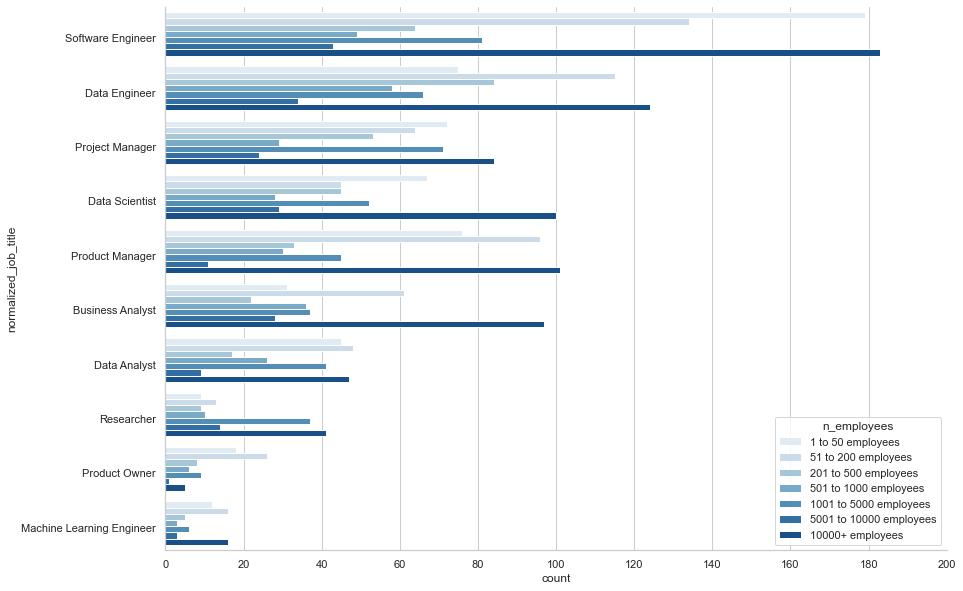

In [772]:
sns.set_style("whitegrid")
plt.figure(figsize=(14,10))
ax = sns.countplot(data=glassdoor_top_normalized_job_title, y='normalized_job_title', hue='n_employees', 
                   order=glassdoor_top_normalized_job_title.normalized_job_title.value_counts().index, palette='Blues');
ax.set_yticklabels(glassdoor_top_normalized_job_title.normalized_job_title.value_counts().index, ha='right', va='top')
xticks = np.arange(0, 210, 20)
plt.xticks(xticks, xticks)
sns.despine()

The countplot above visualizes the relationship between the count of normalized job titles and the number of employees. The number of employees are color encoded.

For almost each normalized job title, large companies with more than 10,000 employees seem to have the largest share of job listings. For Data Engineer it's the second largest share. Only for Product Owner the share of the largest company is clearly smaller. 

The smallest companies with less than 201 employees have often the second largest share of job listings. It's eyecatching that small companies count more job listings for Product Owner than large companies.

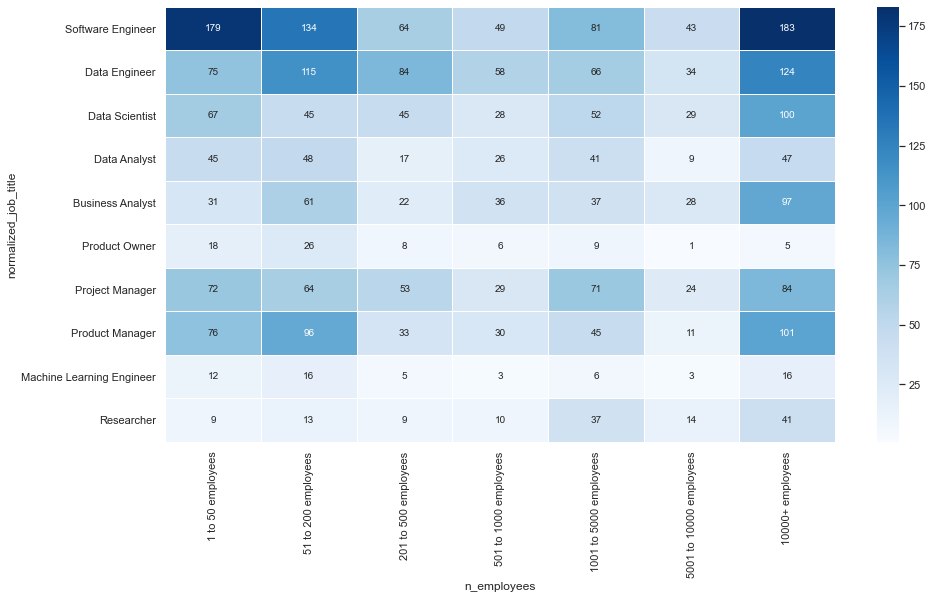

In [773]:
sns.set_style("whitegrid")
glassdoor_top_normalized_job_title_n_employees_count = glassdoor_top_normalized_job_title.groupby(by=['normalized_job_title', 'n_employees']).posted.count()
glassdoor_top_normalized_job_title_n_employees_count = glassdoor_top_normalized_job_title_n_employees_count.reset_index(name='count')
glassdoor_top_normalized_job_title_n_employees_count = glassdoor_top_normalized_job_title_n_employees_count.pivot(index='normalized_job_title', columns='n_employees', values='count')
f, ax = plt.subplots(figsize=(15,8))
sns.heatmap(glassdoor_top_normalized_job_title_n_employees_count, annot=True, fmt='d', linewidths=.5, ax=ax, 
            cmap='Blues',);

The relationship between normalized job titles and the number of employees in terms of job listing counts is shown again as heatmap above. The heatmap confirms the observations already made in the previously shown countplot. It was plotted, because on the y-axis of the countplot we have 10 normalized jobs and no count values are displayed. The heatmap annotates all value counts and uses a color encoding that makes large values more eye-catching by a darker blue color.

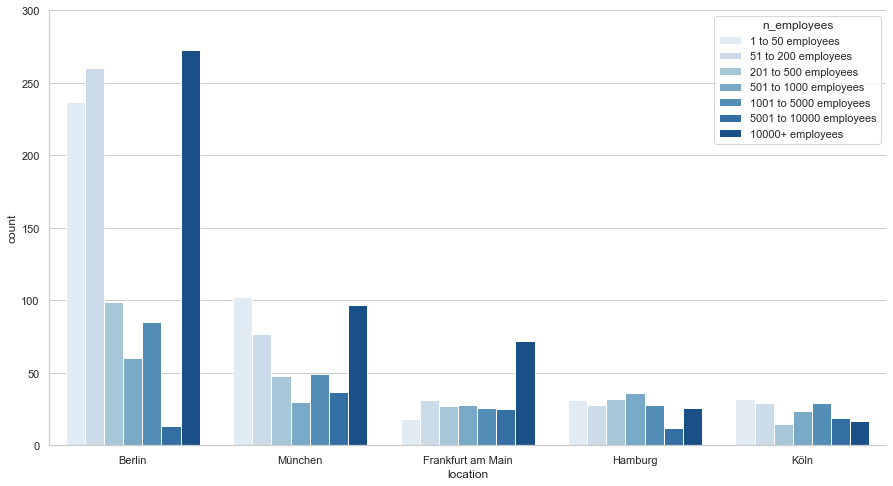

In [774]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(data=glassdoor_top_location, x='location', hue='n_employees', 
                   order=glassdoor_top_location.location.value_counts().index, palette='Blues');
yticks = np.arange(0, 310, 50)
plt.yticks(yticks, yticks)
sns.despine()

By focusing on the relationship of location and the number of employees, the countplot above unveils that especially in Berlin, München (Munich) and Frankfurt am Main large companies with more than 10,000 employees have clearly the largest share of job listings. In Frankfurt am Main the remaining share of job listings is almost equally distributed among the other company sizes. The smallest companies with less than 201 employees have clearly the second largest shares of job listings in Berlin and München. In Frankfurt am Main companies with less than 51 employees have the smallest share. The job listings for Hamburg and Köln (Cologne) are well distributed among all company sizes.

Plotting a heatmap in addition is not necessary, because the readability when having just 5 locations is very good.

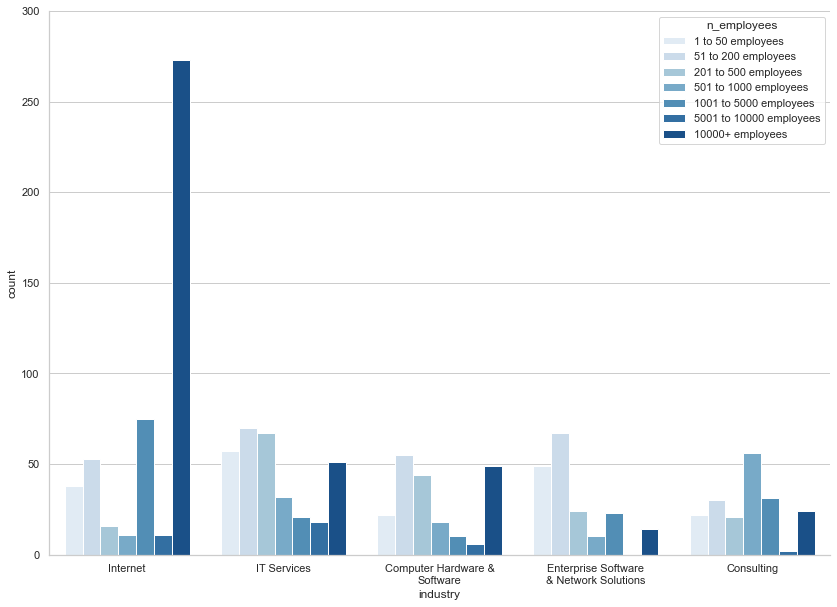

In [775]:
sns.set_style("whitegrid")
plt.figure(figsize=(14,10))
ax = sns.countplot(data=glassdoor_top_industry, x='industry', hue='n_employees',
                   order=glassdoor_top_industry.industry.value_counts().index, palette='Blues');
labels = ['\n'.join(wrap(l, 20)) for l in glassdoor_top_industry.industry.value_counts().index]
ax.set_xticklabels(labels, ha='center', va='top')
yticks = np.arange(0, 310, 50)
plt.yticks(yticks, yticks)
sns.despine()

The relationship between industry and the number of employees is shown in the countplot above. It's eye-catching that the job listings of large companies with more than 10,000 employees have a very high share in the Internet industry. Companies with 1001 to 5000 employees have the second largest share in Internet industry. In IT Services, Computer Hardware & Software and Enterprise Software & Network Solutions have small companies with 51 to 200 employees the largest share. In Consulting industry companies with 501 to 1000 employees have the largest share. In each of the top 5 industries, companies with 5001 to 10000 employees seem to have the smallest share of job listings. In Enterprise Software & Network Solutions industry those companies have no job listings.

In [776]:
glassdoor_top_normalized_job_title_location = glassdoor_top_normalized_job_title[
    glassdoor_top_normalized_job_title.location.isin(
        glassdoor_top_normalized_job_title.location.value_counts()[:5].index)]

glassdoor_top_normalized_job_title_industry = glassdoor_top_normalized_job_title[
    glassdoor_top_normalized_job_title.industry.isin(
        glassdoor_top_normalized_job_title.industry.value_counts()[:5].index)]

glassdoor_top_industry_location = glassdoor_top_industry[
    glassdoor_top_industry.location.isin(glassdoor_top_industry.location.value_counts()[:5].index)]

The code above creates the following dedicated subsets of the data:
* `glassdoor_top_normalized_job_title_location`: Select all job listings, which have not the normalized job title 'Engineering Manager' or 'Scrum Master' assigned and have a location that is among the top 5 highest frequencies
* `glassdoor_top_normalized_job_title_industry`: Select all job listings, which have not the normalized job title 'Engineering Manager' or 'Scrum Master' assigned and have a industry that is among the top 5 highest frequencies
* `glassdoor_top_industry_location`: Select all job listings, which have a industry that is among the top 5 highest frequencies and have a location that is among the top 5 highest frequencies

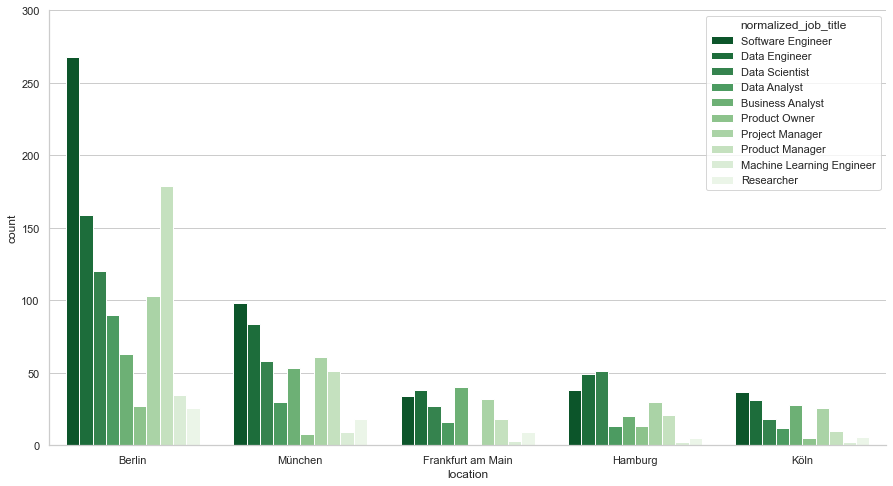

In [777]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
sns.countplot(data=glassdoor_top_normalized_job_title_location, x='location', hue='normalized_job_title', 
              order=glassdoor_top_normalized_job_title_location.location.value_counts().index, palette='Greens_r');
yticks = np.arange(0, 310, 50)
plt.yticks(yticks, yticks)
sns.despine()

The countplot above displays the relationship between normalized job titles and the location. The normalized job titles are color encoded. Especially in Berlin, but as well in München (Munich) and Köln (Cologne) Software Engineer listings have the highest share. For Frankfurt am Main Business Analysts and for Hamburg Data Scientists are listed most. The second largest shares for all locations, besides Berlin, are Data Engineer listings. In Berlin, it is the third largest share, which is still larger than the largest share of listings of other locations. The second largest share in Berlin by far is Product Manager. This is unusual compared to the large shares of other location. To confirm the observations, let's plot a heatmap below.

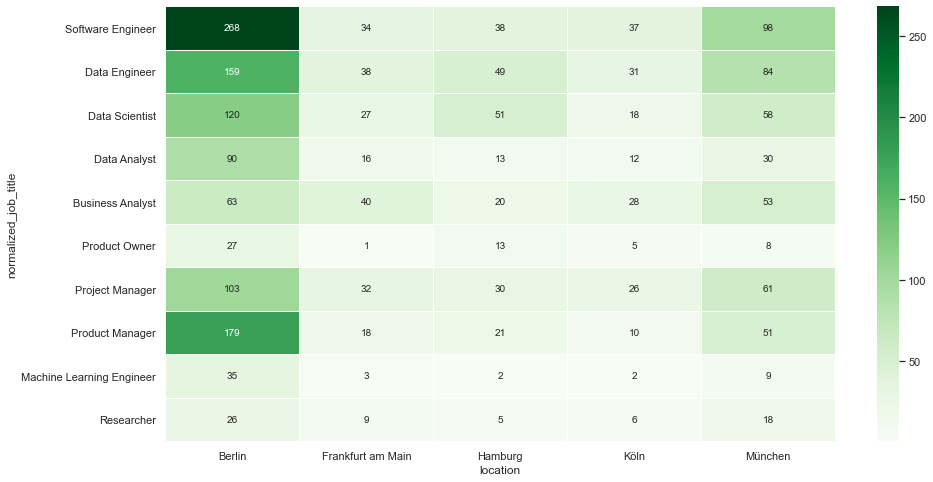

In [778]:
sns.set_style("whitegrid")
glassdoor_top_normalized_job_title_location_count = glassdoor_top_normalized_job_title_location.groupby(by=[
    'normalized_job_title', 'location']).posted.count()
glassdoor_top_normalized_job_title_location_count = glassdoor_top_normalized_job_title_location_count.reset_index(
    name='count')
glassdoor_top_normalized_job_title_location_count = glassdoor_top_normalized_job_title_location_count.pivot(
    index='normalized_job_title', columns='location', values = 'count')
f, ax = plt.subplots(figsize=(15,8))
sns.heatmap(glassdoor_top_normalized_job_title_location_count, annot=True, fmt='d', linewidths=.5, ax=ax, cmap='Greens');

The heatmap confirms the observations made with the countplot above.

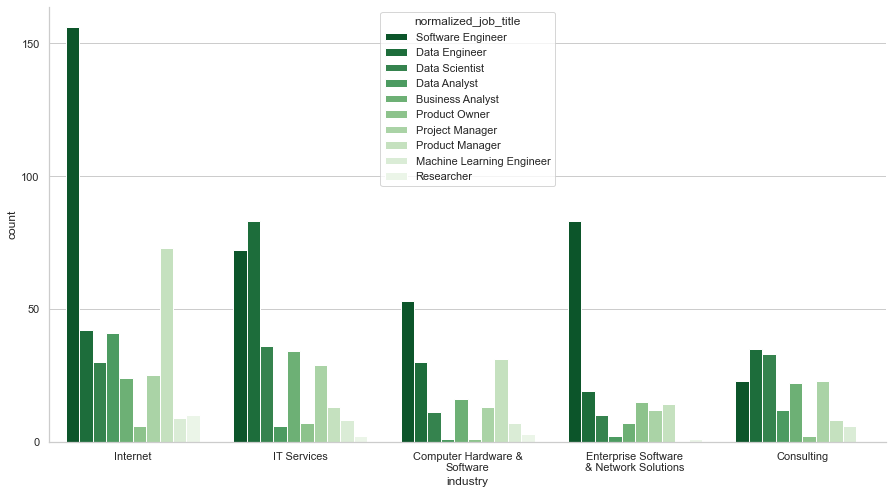

In [779]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(data=glassdoor_top_normalized_job_title_industry, x='industry', hue='normalized_job_title', 
              order=glassdoor_top_normalized_job_title_industry.industry.value_counts().index, palette='Greens_r')
labels = ['\n'.join(wrap(l, 20)) for l in glassdoor_top_normalized_job_title_industry.industry.value_counts().index]
ax.set_xticklabels(labels, ha='center', va='top')
yticks = np.arange(0, 161, 50)
plt.yticks(yticks, yticks)
sns.despine()

The relationship of normalized job titles and industry is illustrated above. It's eye-catching that the job listings of Software Engineers have the largest share in Internet, Computer Hardware & Software and Enterprise Software & Network Solutions by far. In IT Services and Consulting industry it's a large share, but not the largest. Instead, Data Engineers are listed most for those industries. The second largest share in Internet industry by far is Product Manager. This is unusual compared to the large shares of other industries.

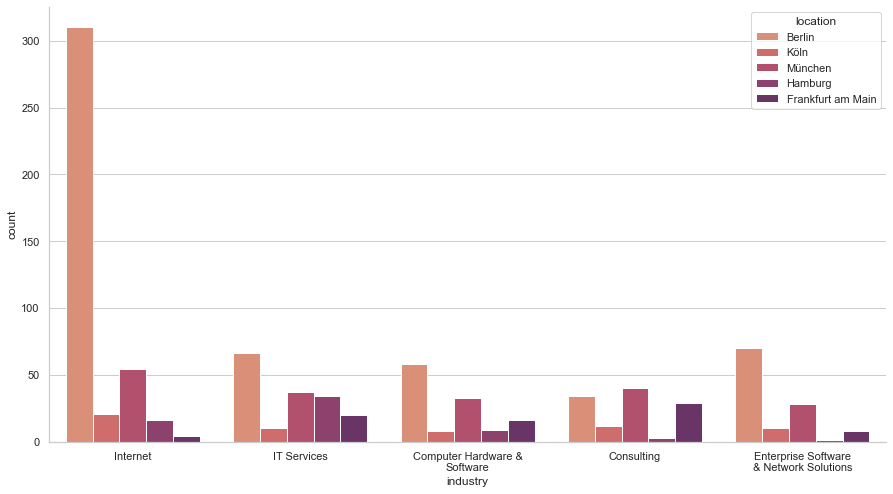

In [780]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(data=glassdoor_top_industry_location, x='industry', hue='location', 
              order=glassdoor_top_industry_location.industry.value_counts().index, palette='flare')
labels = ['\n'.join(wrap(l, 20)) for l in glassdoor_top_industry_location.industry.value_counts().index]
ax.set_xticklabels(labels, ha='center', va='top')
yticks = np.arange(0, 310, 50)
plt.yticks(yticks, yticks)
sns.despine()

The countplot above displays the relationship between industry and the location. The industry is color encoded. Especially in the Internet Industry, but as well in IT Services, Computer Hardware & Software and Enterprise Software & Network Solutions job listings in Berlin have the largest share by far. München (Munich) has for those industries the second largest share. Only for Consulting industry München (Munich) has the most listed followed by Berlin. The job listings for Hamburg are focused in IT Services industry. Frankfurt has only a few listings in Internet and Enterprise Software & Network Solutions industry.

Finally, investigate the relationship of other features with the features of main interest.

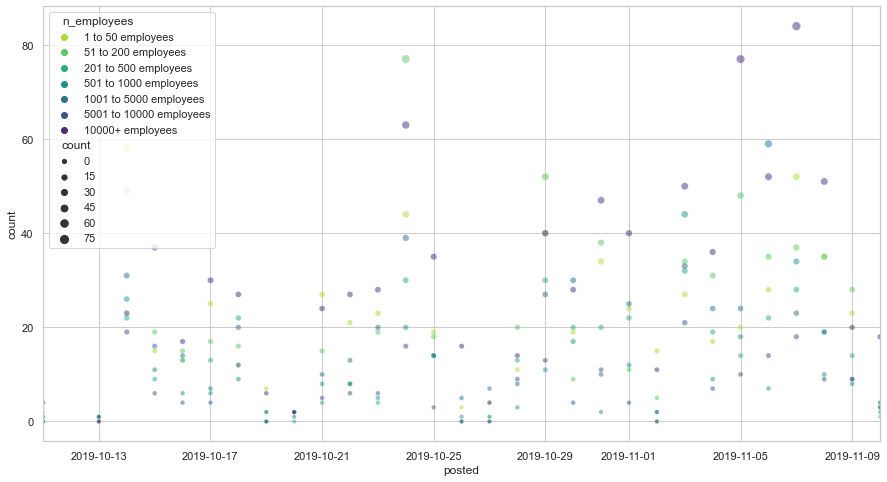

In [781]:
posted_n_employees_group = glassdoor_clean.groupby([glassdoor_clean.posted, 
                                                    glassdoor_clean.n_employees]).posted.agg({'count'})
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=posted_n_employees_group, x='posted', y='count', alpha=0.5, 
                     hue='n_employees', palette='viridis_r', size='count')
ax.set_xlim(pd.Timestamp('2019-10-11'), pd.Timestamp('2019-11-10'));

The relationship between the count of jobs posted per date and the number of employees is illustrated in the scatterplot above. The number of employees are color encoded. The size of the marker depends on the counts of jobs posted per date. The more jobs have been posted per date, the larger the diameter of the marker is. The plot does not unveil any interesting relationships.

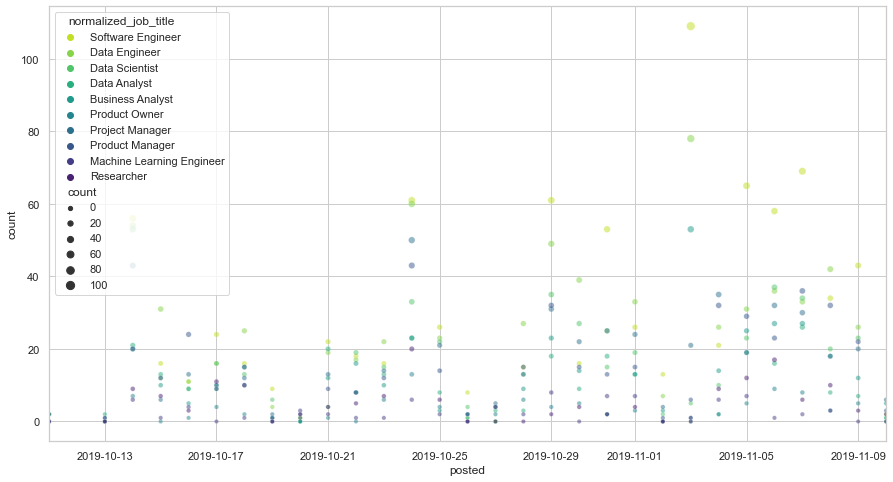

In [782]:
posted_normalized_job_title_group = glassdoor_top_normalized_job_title.groupby([
    glassdoor_top_normalized_job_title.posted, 
    glassdoor_top_normalized_job_title.normalized_job_title]).posted.agg({'count'})
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=posted_normalized_job_title_group, x='posted', y='count', alpha=0.5, 
                     hue='normalized_job_title', palette='viridis_r', size='count')
ax.set_xlim(pd.Timestamp('2019-10-11'), pd.Timestamp('2019-11-10'));

The relationship between the count of jobs posted per date and the normalized job titles is illustrated in the scatterplot above. The normalized job titles are color encoded. The size of the marker depends on the counts of jobs posted per date. The more jobs have been posted per date, the larger the diameter of the marker is. The plot does not unveil any interesting relationship.

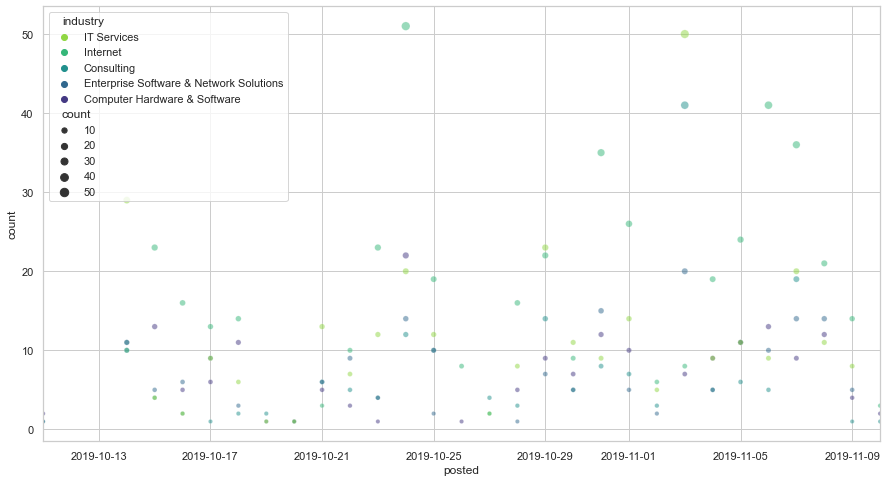

In [783]:
posted_industry_group = glassdoor_top_industry.groupby([
    glassdoor_top_industry.posted, 
    glassdoor_top_industry.industry]).posted.agg({'count'})
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=posted_industry_group, x='posted', y='count', alpha=0.5, 
                     hue='industry', palette='viridis_r', size='count')
ax.set_xlim(pd.Timestamp('2019-10-11'), pd.Timestamp('2019-11-10'));

The relationship between the count of jobs posted per date and the top 5 industries is illustrated in the scatterplot above. The industries are color encoded. The size of the marker depends on the counts of jobs posted per date. The more jobs have been posted per date, the larger the diameter of the marker is. The plot does not unveil any interesting relationships.

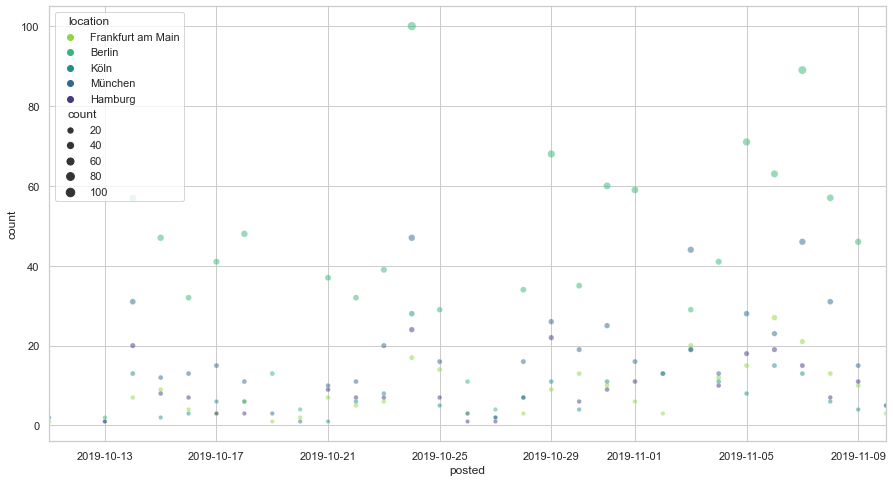

In [784]:
posted_location_group = glassdoor_top_location.groupby([
    glassdoor_top_location.posted, 
    glassdoor_top_location.location]).posted.agg({'count'})
plt.figure(figsize=(15,8))
ax = sns.scatterplot(data=posted_location_group, x='posted', y='count', alpha=0.5, 
                     hue='location', palette='viridis_r', size='count')
ax.set_xlim(pd.Timestamp('2019-10-11'), pd.Timestamp('2019-11-10'));

The relationship between the count of jobs posted per date and the top 5 locations is illustrated in the scatterplot above. The locations are color encoded. The size of the marker depends on the counts of jobs posted per date. The more jobs have been posted per date, the larger the diameter of the marker is. The plot does not unveil any interesting relationships.

<a id='bisalary'></a>
### 2.3.2. Salaries
Let's explore the reported job title salaries. Based on the original dataset `salaries_clean` a subset just containing records of salaries with value 'ANNUAL' for `pay_period` named `annual_salaries` was created. As stated in the summary of the univariate exploration, the further investigation will only focus on `annual_salaries` as new origin.

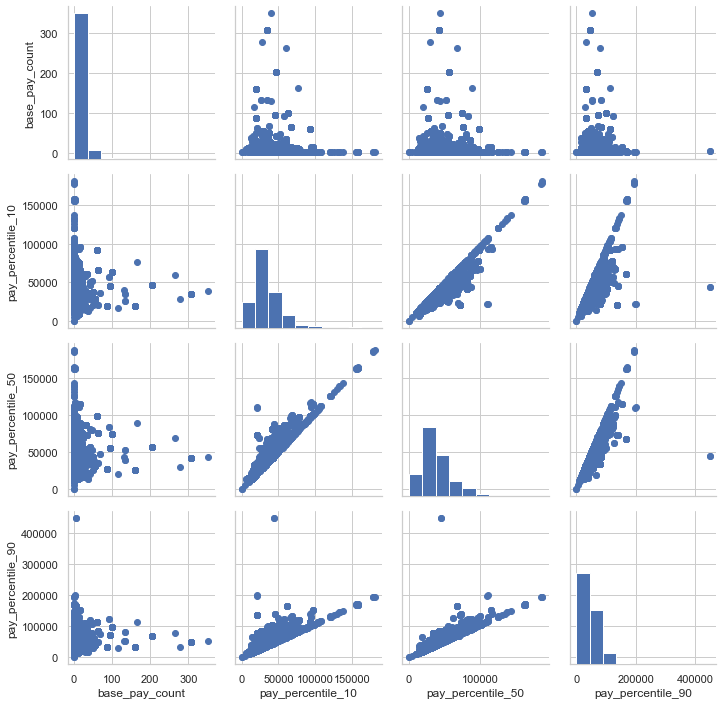

In [785]:
sns.set_style("whitegrid")
g = sns.PairGrid(data=annual_salaries, vars=['base_pay_count', 'pay_percentile_10', 'pay_percentile_50', 
                                             'pay_percentile_90'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
sns.despine();

The pairgrid above illustrates all numerical features of interest and other features. The diagonal plots a histogram to show the distribution of each variable as already done in bivariate exploration. All other cells provide a scatterplot of a pair of variables.

The `base_pay_count`, which equals the number of reported salaries, seem to have no correlation with the variables `pay_percentile_10`, `pay_percentile_50` and `pay_percentile_90`. This means that there is no positive as well as negative correlation, e.g. a large number of reported salaries, does not lead to a higher salary and vice versa.

As expected, the `pay_percentile_10`, `pay_percentile_50` and `pay_percentile_90` have a strong positive correlation.

Let's compute and plot pairwise correlation coefficients.

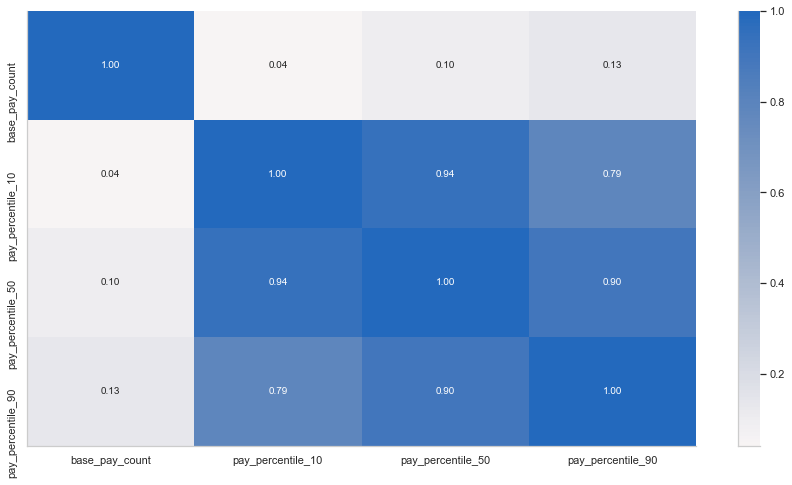

In [786]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
sns.heatmap(annual_salaries[['base_pay_count', 'pay_percentile_10', 'pay_percentile_50', 'pay_percentile_90']].corr(), 
            annot=True, fmt='.2f', cmap='vlag_r', center=0)
sns.despine()

The heatmap above illustrates the pairwise computed pearson standard correlation coefficients. The same variables as plotted within the scatterplots of the pairgrid are used: `base_pay_count`, `pay_percentile_10`, `pay_percentile_50` and `pay_percentile_90`. The pearson standard correlation coefficients confirms the observations made from the scatterplots. In addition, the coefficients is closer to 1 for the pair `pay_percentile_10` and `pay_percentile_50` as well as the pair `pay_percentile_90` and `pay_percentile_50` compared to `pay_percentile_10` and `pay_percentile_90`. It is just a slight difference, which should not be overinterpreted.

In [787]:
salaries_top_normalized_job_title_names = salaries_clean.normalized_job_title.value_counts()[:5].index
mask_salaries_top_normalized_job_title = salaries_clean.normalized_job_title.isin(salaries_top_normalized_job_title_names)
salaries_top_normalized_job_title = salaries_clean[mask_salaries_top_normalized_job_title].copy()

# Update the normalized_job_title categorical dtype in order to avoid 
# plotting not top 5 titles with 0 values
salaries_top_normalized_job_title_categories = np.array(salaries_clean.normalized_job_title.values.categories)
salaries_top_normalized_job_title_categories = np.delete(salaries_top_normalized_job_title_categories, 
                                                [i for i in range(len(salaries_top_normalized_job_title_categories)) 
                                                 if salaries_top_normalized_job_title_categories[i] not in 
                                                 salaries_top_normalized_job_title_names])

salaries_top_normalized_job_title_type = pd.api.types.CategoricalDtype(categories=salaries_top_normalized_job_title_categories, 
                                                                       ordered=False)
salaries_top_normalized_job_title.normalized_job_title = salaries_top_normalized_job_title.normalized_job_title.astype(
    dtype=salaries_top_normalized_job_title_type)

salaries_top_normalized_job_title_annual = salaries_top_normalized_job_title[
    salaries_top_normalized_job_title.pay_period == 'ANNUAL'].copy()

salaries_top_industry_names = salaries_clean.industry.value_counts()[:5].index
mask_salaries_top_industry = salaries_clean.industry.isin(salaries_top_industry_names)
salaries_top_industry = salaries_clean[mask_salaries_top_industry].copy()
salaries_top_industry_annual = salaries_top_industry[salaries_top_industry.pay_period == 'ANNUAL'].copy()

The code above creates the following dedicated subsets of the data:
* `salaries_top_normalized_job_title_annual`: Select all reported salaries, which have a normalized job title that is among the top 5 highest frequencies and 'ANNUAL' pay period
* `salaries_top_industry_annual`: Select all reported salaries, which have a industry that is among the top 5 highest frequencies and 'ANNUAL' pay period

For the qualitative features of main interest a different color encoding is used:
* `normalized_job_title`: Greens
* `n_employees`: Blues
* `industry`: flare

The relationship of each of those qualitative features with the numerical features `base_pay_count`, `pay_percentile_10`, `pay_percentile_50` and `pay_percentile_90` will be investigated below.

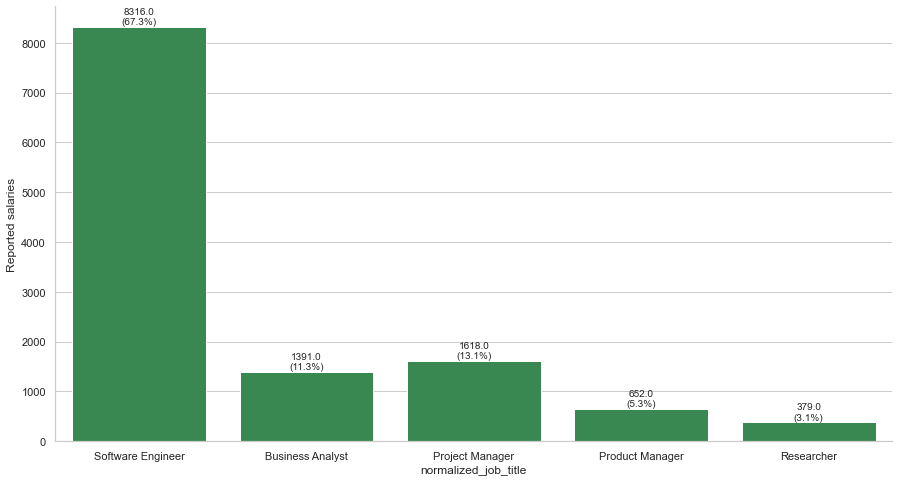

In [788]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
salaries_top_normalized_job_title_annual_base_pay_count_sum = salaries_top_normalized_job_title_annual.groupby(
    by=['normalized_job_title']).base_pay_count.sum()
ax = sns.barplot(x=salaries_top_normalized_job_title_annual_base_pay_count_sum.index, 
            y=salaries_top_normalized_job_title_annual_base_pay_count_sum.values, color=sns.color_palette('Greens_r')[1])
for bar, label in zip(ax.patches, salaries_top_normalized_job_title_annual_base_pay_count_sum.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10,
             '{}\n({:.1%})'.format(label, label/salaries_top_normalized_job_title_annual_base_pay_count_sum.sum()), 
             ha='center', va='bottom')
plt.ylabel('Reported salaries');
yticks = np.arange(0, 8100, 1000)
plt.yticks(yticks, yticks)
sns.despine()

As visualized in the barplot above, 5 times more salaries have been reported for Software Engineers (67%) compared to the second largest number of reported salaries for Project Manager (13%). For Business Analyst 11%, for Product Manager 5% and 3% for Researcher have been reported. Please note that those reported salary numbers are the sum of the `base_pay_count` values per job title. It's not the number of records per job title. Each record already contains a base pay salary that was computed by Glassdoor based on the `base_pay_count` value (number of reported salaries).

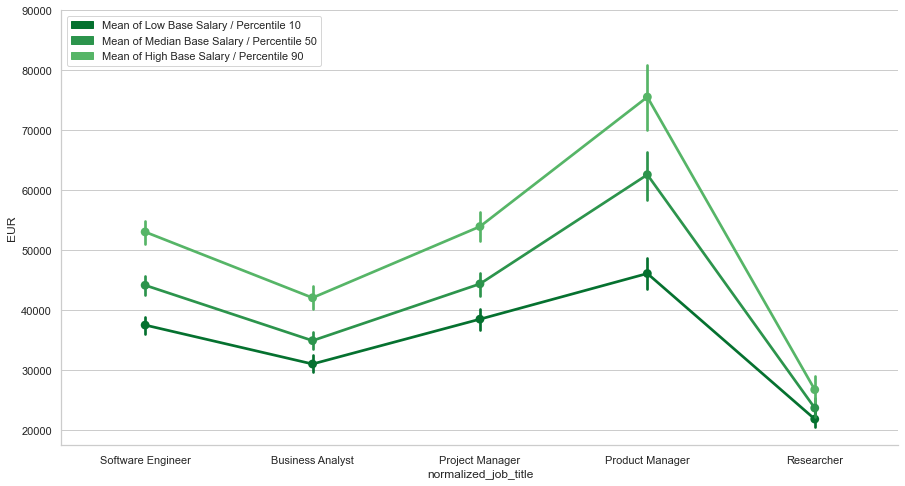

In [789]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
colors = [c for c in sns.color_palette('Greens_r')[:3]]
sns.pointplot(data=salaries_top_normalized_job_title_annual, seed=42,
              x='normalized_job_title', y='pay_percentile_10', color=colors[0])
sns.pointplot(data=salaries_top_normalized_job_title_annual, seed=42,
              x='normalized_job_title', y='pay_percentile_50', color=colors[1])
sns.pointplot(data=salaries_top_normalized_job_title_annual, seed=42,
              x='normalized_job_title', y='pay_percentile_90', color=colors[2])
yticks = np.arange(20000, 100000, 10000)
plt.yticks(yticks, yticks)
legend_handles = []
legend_labels = ['Mean of Low Base Salary / Percentile 10', 'Mean of Median Base Salary / Percentile 50', 
                 'Mean of High Base Salary / Percentile 90']
for entry in zip(colors, legend_labels):
    legend_handles.append(mpatches.Patch(color=entry[0], label=entry[1]))
plt.legend(handles=legend_handles)
plt.ylabel('EUR')
sns.despine()

The pointplot above shows the average of all Low (Percentile 10), Median (Percentile 50) and High (Percentile 90) salaries provided per normalized job title. Additionally, for each data point an error bar representing the 95% confidence interval (5% error rate) using bootstrapping is shown. A seed is used for reproducible bootstrapping. The points are connected as line to see the slopes.

The relationship between the normalized job titles and salaries unveils that the highest average salaries are reported for Product Managers by far. The next higher average salaries are for Project Managers followed by Software Engineers by only a slight difference. The mean median salary of those jobs titles is approx. at the same level as the low salary of Product Managers. Business Analyst average salaries are lower than Software Engineers. The mean high salary of Business Analysts is approx. at the same level at the mean median average salaries of Software Engineers. Researcher have the by far lowest salaries reported. 

Besides Product Manager listings have all other titles a smaller error bar, which indicates that there are more reported salaries. The distance between average low, median and high base salaries is the smallest for Researchers. Product Manager listings have the largest distances. A larger distance indicates that a higher variety of reported salaries exists.

The pointplot only shows the mean. Let's investigate the distribution next.

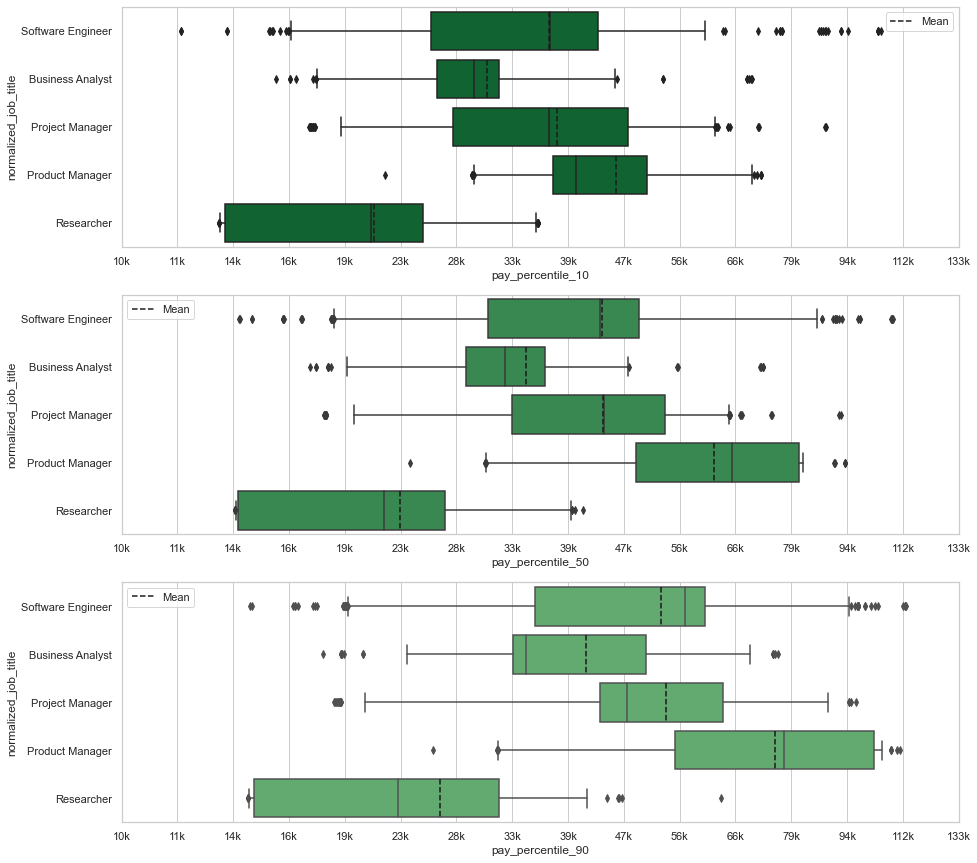

In [790]:
meanlineprops = dict(linestyle='--', linewidth=1.5, color='k', label='Mean')
sns.set_theme(style="whitegrid")
colors = [c for c in sns.color_palette('Greens_r')[:3]]
f, axes = plt.subplots(3, figsize=(15,15))
for i, (ax, col) in enumerate(zip(axes.flatten(), ['pay_percentile_10', 'pay_percentile_50', 'pay_percentile_90'])):
    sns.boxplot(data=salaries_top_normalized_job_title_annual, x=col, y='normalized_job_title', ax=ax, color=colors[i],
                showmeans=True, meanprops=meanlineprops, meanline=True, whis=[5,95])
    #sns.violinplot(data=salaries_top_normalized_job_title_annual, x=col, y="normalized_job_title", 
    #               ax=ax, palette='Greens_r', inner="quartile", scale='width')
    ax.set_xscale('log')
    legend_handles_labels = ax.get_legend_handles_labels()
    ax.legend([legend_handles_labels[0][0]], legend_handles_labels[1])
    xticks = 10 ** np.arange(4.0, 5.15, 0.075)
xtickslabels = ['{}k'.format(int(x/1000)) for x in xticks]
plt.setp(axes, xticks=xticks, xticklabels=xtickslabels);

For the Low (Percentile 10), Median (Percentile 50) and High (Percentile 90) salaries a boxplot is displayed above. Each boxplot illustrates the relationship with the top 5 normalized job titles. Additionally, the mean was added as dashed line as reference to the pointplot explored before. Points lower than quantile 5 and higher than quantile 95 will be plotted outside the whisker and are treated as outliers. A log transformation for all salaries was applied, because of the right skewed distribution and large range of data determined during the univariate exploration.

The observations made based on the pointplot can be confirmed by the boxplots. In addition, it's eye-catching that the IQR distributions (the box, 25-50%) is covering a larger salary range for high salaries compared to median salaries as well as for median salaries compared to low salaries.

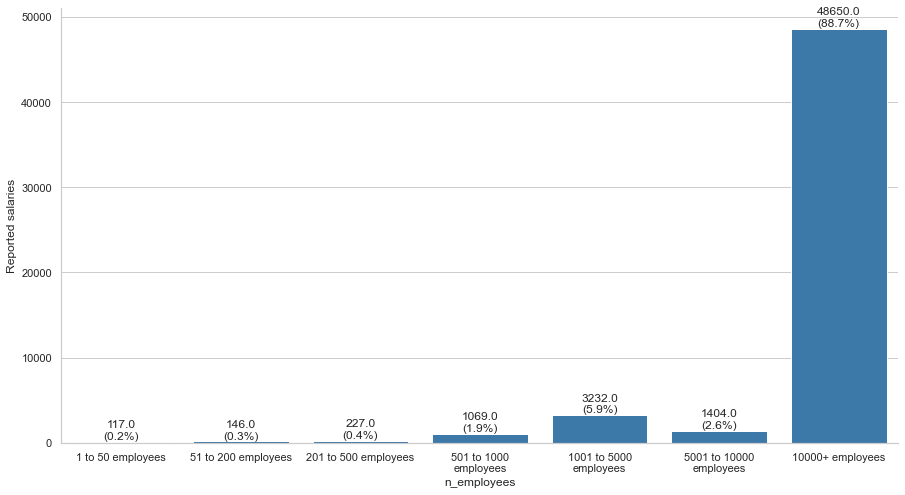

In [791]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
salaries_annual_n_employees_base_pay_count_sum = annual_salaries.groupby(
    by=['n_employees']).base_pay_count.sum()
ax = sns.barplot(x=salaries_annual_n_employees_base_pay_count_sum.index, 
            y=salaries_annual_n_employees_base_pay_count_sum.values, color=sns.color_palette('Blues_r')[1])
for bar, label in zip(ax.patches, salaries_annual_n_employees_base_pay_count_sum.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10,
             '{}\n({:.1%})'.format(label, label/salaries_annual_n_employees_base_pay_count_sum.sum()), 
             ha='center', va='bottom')
xlabels = ['\n'.join(wrap(l, 20)) for l in salaries_annual_n_employees_base_pay_count_sum.index]
ax.set_xticklabels(xlabels, ha='center', va='top')
plt.ylabel('Reported salaries')
yticks = np.arange(0, 50100, 10000)
plt.yticks(yticks, yticks)
sns.despine()

The barplot above illustrates that 15 times more salaries have been reported for large companies with 10000+ employees (88.5%) compared to the second largest number of reported salaries for companies with 1001 to 5000 employess (6%). Afterwards the shares of companies with 5001 to 10000 employees with 2.5% and companies with 501 to 1001 employees with 2% follow. The share of reported salaries for the 3 smallest companies sums up to less than 1%. Please note that those reported salary numbers are the sum of the `base_pay_count` values per comnpany size. It's not the number of records per company size. Each record already contains a base pay salary that was computed by Glassdoor based on the `base_pay_count` value (number of reported salaries).

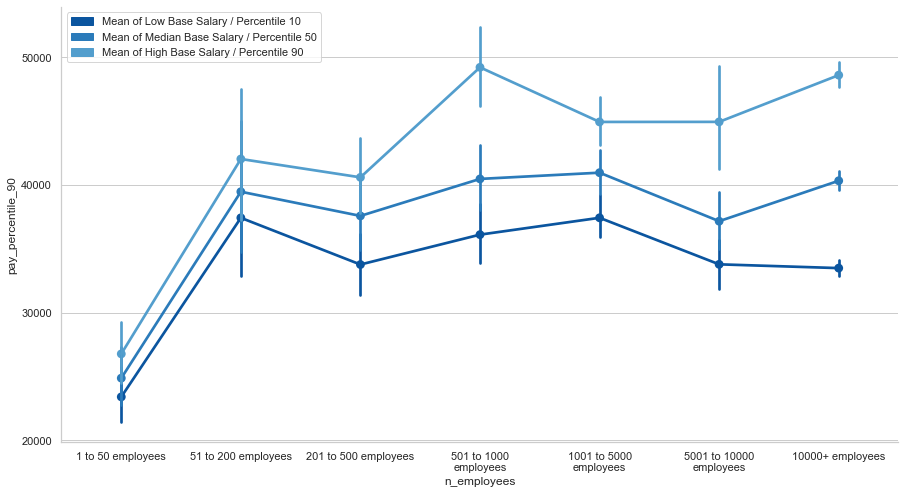

In [792]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
colors = [c for c in sns.color_palette('Blues_r')[:3]]
sns.pointplot(data=annual_salaries, 
              x='n_employees', y='pay_percentile_10', seed=42, color=colors[0])
sns.pointplot(data=annual_salaries, 
              x='n_employees', y='pay_percentile_50', seed=42, color=colors[1])
ax = sns.pointplot(data=annual_salaries, 
              x='n_employees', y='pay_percentile_90', seed=42, color=colors[2])
xlabels = ['\n'.join(wrap(l, 20)) for l in salaries_annual_n_employees_base_pay_count_sum.index]
ax.set_xticklabels(xlabels, ha='center', va='top')
yticks = np.arange(20000, 60000, 10000)
plt.yticks(yticks, yticks)
legend_handles = []
legend_labels = ['Mean of Low Base Salary / Percentile 10', 'Mean of Median Base Salary / Percentile 50', 
                 'Mean of High Base Salary / Percentile 90']
for entry in zip(colors, legend_labels):
    legend_handles.append(mpatches.Patch(color=entry[0], label=entry[1]))
plt.legend(handles=legend_handles)
sns.despine()

The pointplot above shows the average of all Low (Percentile 10), Median (Percentile 50) and High (Percentile 90) salaries provided per company size. Additionally, for each data point an error bar representing the 95% confidence interval (5% error rate) using bootstrapping is shown. A seed is used for reproducible bootstrapping. The points are connected as line to see the slopes.

The relationship between the number of employees and salaries shows that the smallest companies with 1 to 50 employees have the lowest mean base salaries reported. The highest average median salaries are reported for companies with 1001 to 5000 employees, followed very closely by companies with 501 to 1000 employees and 10000+ employees. For the average high salaries reported, companies with 501 to 1000 employees are leading, closely follows by companies with 10000+ employees. The average low and median salary of companies is even higher than the highest, but the mean high salaries are lower. Companies with 1001 to 5000 employees have approx. the same mean high salaries as companies with 5001 to 10000 employees. Other mean salaries can be taken from the graphic.

Besides companies with 10000+ employees all companies have a large error bar, which indicates that there are less reported salaries. The distance between average low, median and high base salaries is the smallest for companies with 1 to 50 employees, followed by companies with 51 to 200 employees. Companies with 10000+ employees, 501 to 1000 employees and 5001 to 100001 employess have the largest distances in this order. Companies in between have a distance in between. Especially the distance between the mean median and mean high salaries varies. A larger distance indicates that a higher variety of reported salaries exists.

Let's investigate the distribution next.

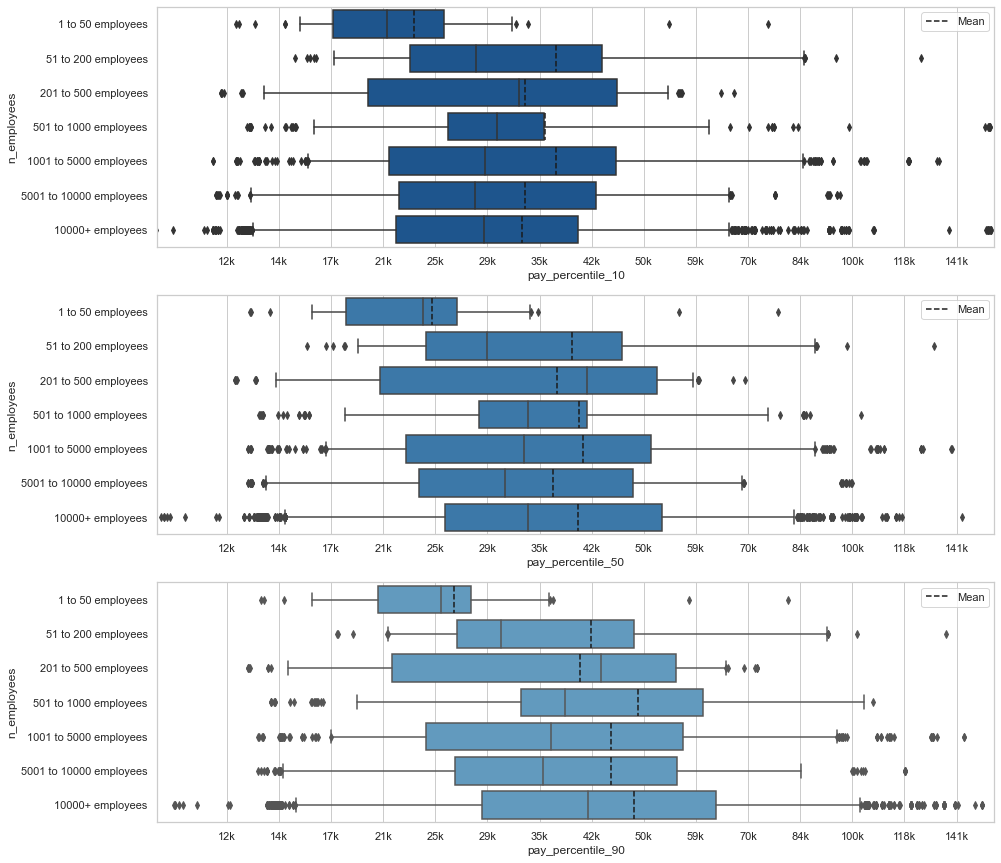

In [793]:
meanlineprops = dict(linestyle='--', linewidth=1.5, color='k', label='Mean')
sns.set_theme(style="whitegrid")
colors = [c for c in sns.color_palette('Blues_r')[:3]]
f, axes = plt.subplots(3, figsize=(15,15))
for i, (ax, col) in enumerate(zip(axes.flatten(), ['pay_percentile_10', 'pay_percentile_50', 'pay_percentile_90'])):
    sns.boxplot(data=annual_salaries, x=col, y='n_employees', ax=ax, color=colors[i],
                showmeans=True, meanprops=meanlineprops, meanline=True, whis=[5,95])
    #sns.violinplot(data=salaries_top_normalized_job_title_annual, x=col, y="normalized_job_title", 
    #               ax=ax, palette='Blues_r', inner="quartile", scale='width')
    ax.set_xscale('log')
    legend_handles_labels = ax.get_legend_handles_labels()
    ax.legend([legend_handles_labels[0][0]], legend_handles_labels[1])
    ax.set_xlim([10000, 160000]) 
xticks = 10 ** np.arange(4.1, 5.2, 0.075)
xtickslabels = ['{}k'.format(int(x/1000)) for x in xticks]
plt.setp(axes, xticks=xticks, xticklabels=xtickslabels);

For the Low (Percentile 10), Median (Percentile 50) and High (Percentile 90) salaries a boxplot is displayed above. Each boxplot illustrates the relationship with the company size. Additionally, the mean was added as dashed line as reference to the pointplot explored before. Points lower than quantile 5 and higher than quantile 95 will be plotted outside the whisker and are treated as outliers. A log transformation for all salaries was applied, because of the right skewed distribution and large range of data determined during the univariate exploration.

The observations made based on the pointplot can be confirmed by the boxplots. In addition, it's eye-catching that the IQR distributions (the box, 25-50%) is covering a larger salary range for high salaries compared to median salaries as well as for median salaries compared to low salaries.

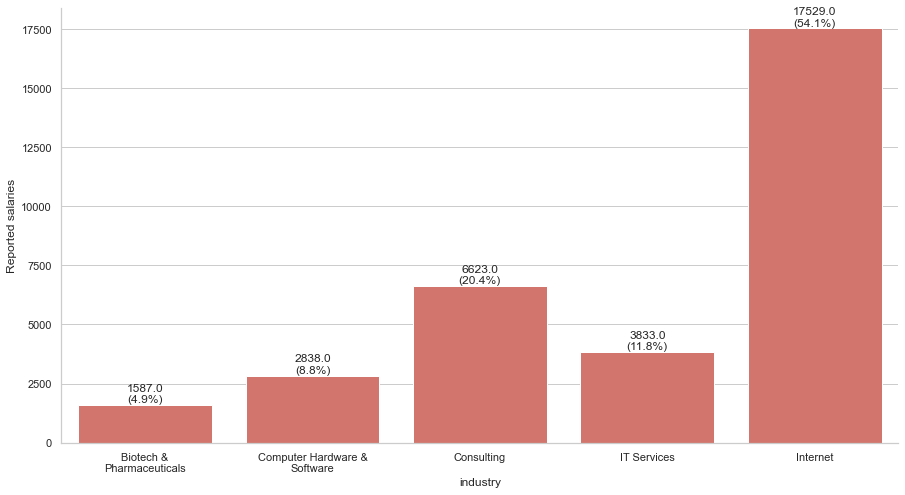

In [794]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
salaries_top_industry_annual_base_pay_count_sum = salaries_top_industry_annual.groupby(
    by=['industry']).base_pay_count.sum()
ax = sns.barplot(x=salaries_top_industry_annual_base_pay_count_sum.index, 
            y=salaries_top_industry_annual_base_pay_count_sum.values, color=sns.color_palette('flare')[1])
for bar, label in zip(ax.patches, salaries_top_industry_annual_base_pay_count_sum.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10,
             '{}\n({:.1%})'.format(label, label/salaries_top_industry_annual_base_pay_count_sum.sum()), 
             ha='center', va='bottom')
xlabels = ['\n'.join(wrap(l, 20)) for l in salaries_top_industry_annual_base_pay_count_sum.index]
ax.set_xticklabels(xlabels, ha='center', va='top')
plt.ylabel('Reported salaries')
yticks = np.arange(0, 18100, 2500)
plt.yticks(yticks, yticks)
sns.despine()

The barplot above illustrates that 2.5 times more salaries have been reported for the Internet industry (54%) compared to the second largest number of reported salaries for Consulting industry (20%). The IT Services industry gains 12%, the Computer Hardware & Software industry 9% and the Biotech & Pharmaceuticals 5% share of reported salaries.

Please note that those reported salary numbers are the sum of the `base_pay_count` values per industry. It's not the number of records per industry. Each record already contains a base pay salary that was computed by Glassdoor based on the `base_pay_count` value (number of reported salaries).

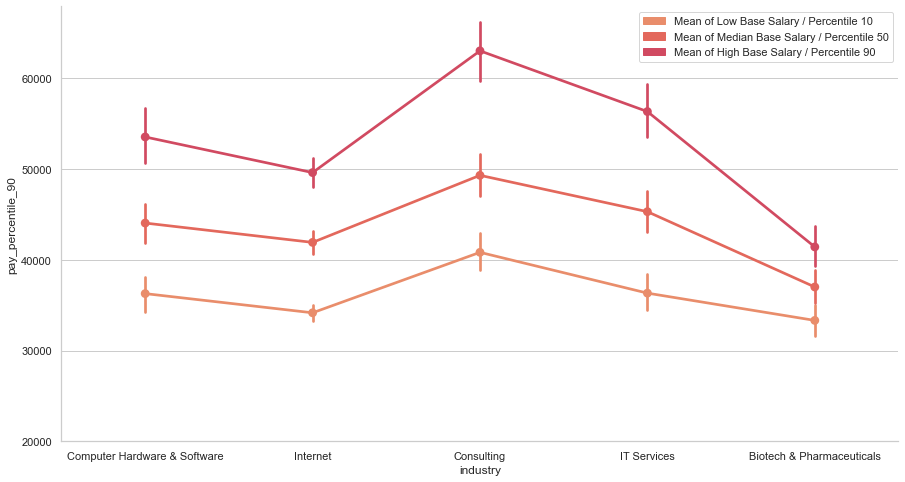

In [795]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
colors = [c for c in sns.color_palette('flare')[:3]]
sns.pointplot(data=salaries_top_industry_annual, 
              x='industry', y='pay_percentile_10', seed=42, color=colors[0])
sns.pointplot(data=salaries_top_industry_annual, 
              x='industry', y='pay_percentile_50', seed=42, color=colors[1])
sns.pointplot(data=salaries_top_industry_annual, 
              x='industry', y='pay_percentile_90', seed=42, color=colors[2])
yticks = np.arange(20000, 70000, 10000)
plt.yticks(yticks, yticks)
legend_handles = []
legend_labels = ['Mean of Low Base Salary / Percentile 10', 'Mean of Median Base Salary / Percentile 50', 
                 'Mean of High Base Salary / Percentile 90']
for entry in zip(colors, legend_labels):
    legend_handles.append(mpatches.Patch(color=entry[0], label=entry[1]))
plt.legend(handles=legend_handles)
sns.despine()

The pointplot above shows the average of all Low (Percentile 10), Median (Percentile 50) and High (Percentile 90) Salaries provided per industry. Additionally, for each data point an error bar representing the 95% confidence interval (5% error rate) using bootstrapping is shown. A seed is used for reproducible bootstrapping. The points are connected as line to see the slopes.

The relationship between the industries and salaries unveils that the Consulting industry have the highest mean base salaries reported. In IT Services industry the second highest salaries are reported. The Computer Hardware & Software and Internet industry follows. The lowest salaries are reported for Biotech & Pharmaceuticals industry.

Besides the Internet industry have all other industries a large error bar, which indicates that there are less reported salaries. The distance between average low, median and high base salaries is the smallest in Biotech & Pharmaceuticals and the largest is in Consulting industry. Especially the distance between the mean median and mean high salaries varies. A larger distance indicates that a higher variety of reported salaries exists.

Let's investigate the distribution next.

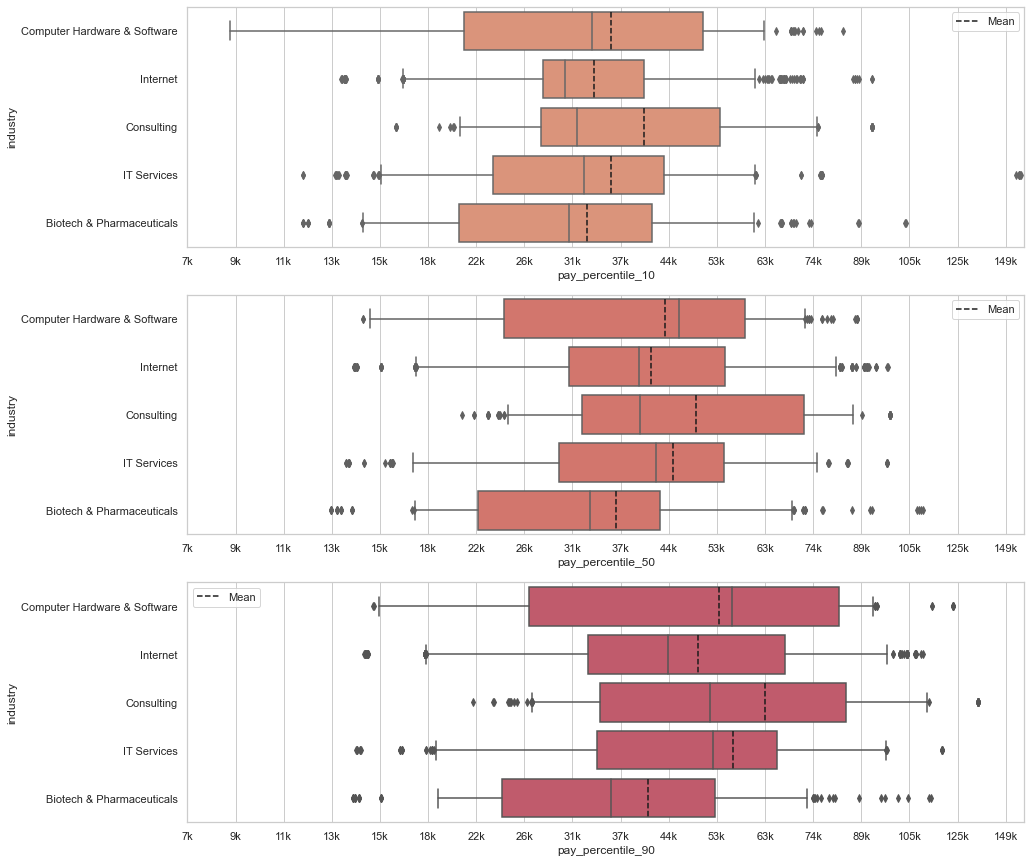

In [796]:
meanlineprops = dict(linestyle='--', linewidth=1.5, color='k', label='Mean')
sns.set_theme(style="whitegrid")
f, axes = plt.subplots(3, figsize=(15,15))
colors = [c for c in sns.color_palette('flare')[:3]]
for i, (ax, col) in enumerate(zip(axes.flatten(), ['pay_percentile_10', 'pay_percentile_50', 'pay_percentile_90'])):
    sns.boxplot(data=salaries_top_industry_annual, x=col, y='industry', ax=ax, color=colors[i],
               showmeans=True, meanprops=meanlineprops, meanline=True, whis=[5,95])
    #sns.violinplot(data=salaries_top_normalized_job_title_annual, x=col, y="normalized_job_title", 
    #               ax=ax, palette='Greens_r', inner="quartile", scale='width')
    ax.set_xscale('log')
    legend_handles_labels = ax.get_legend_handles_labels()
    ax.legend([legend_handles_labels[0][0]], legend_handles_labels[1])
    ax.set_xlim([10000, 160000]) 
xticks = 10 ** np.arange(3.9, 5.2, 0.075)
xtickslabels = ['{}k'.format(int(x/1000)) for x in xticks]
plt.setp(axes, xticks=xticks, xticklabels=xtickslabels);

For the Low (Percentile 10), Median (Percentile 50) and High (Percentile 90) Salaries a boxplot is displayed above. Each boxplot illustrates the relationship with the top 5 industries. Additionally, the mean was added as dashed line as reference to the pointplot explored before. Points lower than quantile 5 and higher than quantile 95 will be plotted outside the whisker and are treated as outliers. A log transformation for all salaries was applied, because of the right skewed distribution and large range of data determined during the univariate exploration.

The observations made based on the pointplot can be confirmed by the boxplots. In addition, it's eye-catching that the IQR distributions (the box, 25-50%) is covering a larger salary range for high salaries compared to median salaries as well as for median salaries compared to low salaries.

<a id='bisum'></a>
### 2.3.3. Summary

#### Job listings (`glassdoor_clean` dataset)

The relationships of the features of main interest (qualitative variables only) have been investigated.

Following observations for the relationships with ***number of employees*** were determined:

* For almost each of the ***top 5 normalized job titles***, large companies with more than 10,000 employees seem to have the largest share of job listings. Only for Product Owner the share of such large companies is clearly smaller. The smallest companies with less than 201 employees have often the second largest share of job listings. It's eyecatching that small companies count more job listings for Product Owner than large companies. Software Engineers and Data Engineers are the most listed among all company sizes.

* Especially in Berlin, München (Munich) and Frankfurt am Main large companies with more than 10,000 employees have clearly the largest share of job listings among the ***top 5 locations***. The smallest companies with less than 201 employees have clearly the second largest shares of job listings in Berlin and München.

* It's eye-catching that the job listings of large companies with more than 10,000 employees have a very high share in the Internet industry among the ***top 5 industries***. Companies with 1001 to 5000 employees have the second largest share in Internet industry. In IT Services, Computer Hardware & Software and Enterprise Software & Network Solutions have small companies with 51 to 200 employees the largest share. In Consulting industry companies with 501 to 1000 employees have the largest share. In each of the top 5 industries, companies with 5001 to 10000 employees seem to have the smallest share of job listings. In Enterprise Software & Network Solutions industry those companies have no job listings.

Examining the relationships of the ***top 5 normalized job titles*** lead to the following observations:

* The relationship of the top 5 normalized job titles and with the ***top 5 locations*** shows, that especially in Berlin, but as well in München (Munich) and Köln (Cologne) Software Engineer listings have the highest share. For Frankfurt am Main Business Analysts and for Hamburg Data Scientists are most listed. The second largest shares for all locations, besides Berlin, are Data Engineer listings. In Berlin, it is the third largest share, which is still larger than the largest share of listings of other locations. The second largest share in Berlin by far is Product Manager. This is unusual compared to the large shares of other location. 

* The ***top 5 industry*** relationship illustrates that the job listings of Software Engineers have the largest share in Internet, Computer Hardware & Software and Enterprise Software & Network Solutions by far. In IT Services and Consulting industry it's a large share, but not the largest. Instead Data Engineers are most listed for those industries. The second largest share in Internet industry by far is Product Manager. This is unusual compared to the large shares of other industries.

The remaining relationships between the ***top 5 industries*** and the ***top 5 locations*** revealed that especially in the Internet Industry, but as well in IT Services, Computer Hardware & Software and Enterprise Software & Network Solutions job listings in Berlin have the largest share by far. München (Munich) has for those industries the second largest share. Only for Consulting industry München (Munich) has the most listed followed by Berlin. The job listings for Hamburg are focused in IT Services industry. Frankfurt has only a few listings in Internet and Enterprise Software & Network Solutions industry.

The investigation of relationships of other features with main features of interest did not lead to any insights. There is no interesting relationship between the ***count of jobs posted per date*** and 
* the number of employees,
* the top 5 normalized job titles,
* the top 5 locations or
* the top 5 industries.


####  Reported salaries (`salaries_clean` dataset)

The relationship only for reported salaries with the an annual pay period has been examined.

The investigation of the correlation of all numerical features of main interest and other features lead to the observation that the Low Base Pay Salary `pay_percentile_10`, the Median Base Pay Salary `pay_percentile_50` and the High Base Pay Salary `pay_percentile_90` have a strong positive correlation. This was expected, because each record already contains a base pay salary Low, Median and High salary that was computed by Glassdoor based on the `base_pay_count` value. The `base_pay_count`, which equals the number of reported salaries per record, seems to have no correlation with the variables `pay_percentile_10`, `pay_percentile_50` and `pay_percentile_90`. This means that there is no positive as well as negative correlation, e.g., a large number of reported salaries, does not lead to a higher salary and vice versa. Those obersavtions were confirmed by pairwise computing the pearson standard correlation coefficients.

For the qualitative features of main interest the relationship with the numerical features `base_pay_count`, `pay_percentile_10`, `pay_percentile_50` and `pay_percentile_90` has been explored.

Examining the relationships of the ***top 5 normalized job titles*** for which annual salaries have been reported lead to the following observations:

* 5 times more salaries have been reported for Software Engineers (67%) compared to the second largest number of reported salaries for Project Manager (13%). For Business Analyst 11%, for Product Manager 5% and 3% for Researcher have been reported. 
* The highest average salaries are reported for Product Managers by far. The next higher average salaries are for Project Managers followed by Software Engineers by only a slight difference. The mean median salary of those jobs titles is approx. at the same level as the low salary of Product Managers. Business Analyst average salaries are lower than Software Engineers. The mean high salary of Business Analysts is approx. at the same level as the mean median average salaries of Software Engineers. Researcher have the by far lowest salaries reported. 

Following observations for the relationships with ***number of employees*** were determined:

* 15 times more salaries have been reported for large companies with 10000+ employees (88.5%) compared to the second largest number of reported salaries for companies with 1001 to 5000 employess (6%). Afterwards the shares of companies with 5001 to 10000 employees with 2.5% and companies with 501 to 1001 employees with 2% follow. The share of reported salaries for the 3 smallest companies sums up to less than 1%. 
* The smallest companies with 1 to 50 employees have the lowest mean base salaries reported. The highest average median salaries are reported for companies with 1001 to 5000 employees, followed very closely by companies with 501 to 1000 employees and 10000+ employees. For the average high salaries reported, companies with 501 to 1000 employees are leading, closely follows by companies with 10000+ employees. The average low and median salary of companies is even higher than the highest, but the mean high salaries are lower. Companies with 1001 to 5000 employees have approx. the same mean high salaries as companies with 5001 to 10000 employees.

The investigation of relationships of the ***top 5 industries*** revealed following:

* 2.5 times more salaries have been reported for the Internet industry (54%) compared to the second largest number of reported salaries for Consulting industry (20%). The IT Services industry gains 12%, the Computer Hardware & Software industry 9% and the Biotech & Pharmaceuticals 5% share of reported salaries. 
* The Consulting industry has the highest mean base salaries reported. In IT Services industry the second highest salaries are reported. The Computer Hardware & Software and Internet industry follows. The lowest salaries are reported for Biotech & Pharmaceuticals industry.

<a id='multivariate'></a>
## 2.4. Multivariate Exploration

Finally, follow-up the pairwise explored relationships by investigating the relationships between three or more variables. The observed relationships and how the features strengthens each other will be described. Any interesting or suprising interactions will be covered, too.

First the dataset of the job listings (`glassdoor_clean` dataset) will be explored. Afterwards, the exploration of the reported job title salaries (`salaries_clean` dataset) follows.

<a id='multijob'></a>
### 2.4.1. Job Listings
The features of main interest for job listings are only qualitative variables. That's why we have to compute a translation of some of the qualitative variables to a numerical variable (similar to an index). This will allow us to create heatmaps leveraging two qualitative and one numerical feature. In order to decide, what numerical value will be assigned based on the relationship of the two qualitative features, the highest frequency count of the third qualitative, the to be translated variable, will be used.

In [797]:
n_employees_index_dict = {}
n_employees_names = np.array(n_employees_type.categories)
n_employees_names = np.append(n_employees_names, 'Multiple Company Sizes')
for i in range(len(n_employees_names)):
    n_employees_index_dict[n_employees_names[i]] = i
n_employees_index_dict

{'1 to 50 employees': 0,
 '51 to 200 employees': 1,
 '201 to 500 employees': 2,
 '501 to 1000 employees': 3,
 '1001 to 5000 employees': 4,
 '5001 to 10000 employees': 5,
 '10000+ employees': 6,
 'Multiple Company Sizes': 7}

The above code shows the creation of an dictionary that serves as translation between the qualitative (categorical) and quantative (numerical) values for company sizes. An additional category named 'Multiple Company Sizes' was added to cover cases were the highest frequency count of company size based on the relationship of the two other qualitative features, locations and normalized job titles, is shared among multiple company sizes and is not 0.

In [798]:
top_normalized_job_title_location_industry_names = glassdoor_top_normalized_job_title_location.industry.value_counts(ascending=True)[-5:].index
top_normalized_job_title_location_industry_names = np.array(top_normalized_job_title_location_industry_names)
top_normalized_job_title_location_industry_names = np.append(top_normalized_job_title_location_industry_names,
                                                             'Multiple Industries')
mask_top_normalized_job_title_location_industry = glassdoor_top_normalized_job_title_location.industry.isin(top_normalized_job_title_location_industry_names)
top_normalized_job_title_location_industry_index_dict = {}
for i in range(len(top_normalized_job_title_location_industry_names)):
    top_normalized_job_title_location_industry_index_dict[top_normalized_job_title_location_industry_names[i]] = i
top_normalized_job_title_location_industry_index_dict

{'Consulting': 0,
 'Enterprise Software & Network Solutions': 1,
 'Computer Hardware & Software': 2,
 'IT Services': 3,
 'Internet': 4,
 'Multiple Industries': 5}

The above code shows the creation of an dictionary that serves as translation between the qualitative (String) and quantative (numerical) values for industries. An additional category named 'Multiple Industries' was added to cover cases were the highest frequency count of industry based on the relationship of the two other qualitative features, locations and normalized job titles, is shared among multiple industries and is not 0.

In [799]:
# Group job listings, by job titles, location and company size
glassdoor_top_normalized_job_title_location_n_employees = glassdoor_top_normalized_job_title_location.groupby(
    by=['normalized_job_title', 'location', 'n_employees']).size()
# Reset the index to create a dataframe out of the group
glassdoor_top_normalized_job_title_location_n_employees = glassdoor_top_normalized_job_title_location_n_employees.reset_index(name='count')

# Store the top locations and normalized job titles as list
unique_locations = glassdoor_top_normalized_job_title_location_n_employees.location.unique()
unique_titles = glassdoor_top_normalized_job_title_location_n_employees.normalized_job_title.unique()

# Initialize 2 new variables
# n_employees_index: The numerical values that translates to the company size category
# n_employees_multi: Is True in case the highest frequency count of company size based on the relationship of 
# top locations and normalized job titles is shared among multiple company sizes and not 0
glassdoor_top_normalized_job_title_location_n_employees['n_employees_index'] = np.nan
glassdoor_top_normalized_job_title_location_n_employees['n_employees_multi'] = np.nan

# List to track the records for which multiple company sizes have the highest frequency count
track_mutliple_n_employees_max_counts = []

# Iterate through the unique job titles
for t in unique_titles:
    # Iterate through the unique locations
    for l in unique_locations:
        # Select the job title and location
        mask_t_l = (glassdoor_top_normalized_job_title_location_n_employees.normalized_job_title == t) & (
            glassdoor_top_normalized_job_title_location_n_employees.location == l)
        # Get the highest frequency count
        max_count = glassdoor_top_normalized_job_title_location_n_employees[mask_t_l]['count'].max()
        # If the count is 0, continue with the next location the combination of job title and location and 
        # any company size has 0 records
        if max_count == 0:
            break
        # Select the records with the highest frequency count for the selected job title and location
        mask_max_count = (mask_t_l) & (glassdoor_top_normalized_job_title_location_n_employees['count'] == max_count)
        # Get the company size values of those records
        max_n_employees = glassdoor_top_normalized_job_title_location_n_employees[mask_max_count].n_employees.values
        # If there exists more than 1 value, set n_employees_multi to True and 
        # add the value 7 to n_employees_index for only the first record (the pivot table required for the heatmap cannot
        # contain duplicate entries)
        if len(max_n_employees) > 1:
            # Add the information to a list as double check
            track_mutliple_n_employees_max_counts.append({'t': t, 'l': l, 'max_count': max_count, 
                                                          'max_n_employees': max_n_employees})
            glassdoor_top_normalized_job_title_location_n_employees.loc[
                glassdoor_top_normalized_job_title_location_n_employees[mask_max_count].index, 'n_employees_multi'] = True
            glassdoor_top_normalized_job_title_location_n_employees.loc[
                glassdoor_top_normalized_job_title_location_n_employees[mask_max_count].index[0], 
                'n_employees_index'] = 7
        # There exists just 1 value
        else:
            # Add the respective index value for the company size with the highest frequency count using
            # the previously defined dictionary to column n_employees_index
            glassdoor_top_normalized_job_title_location_n_employees.loc[
                glassdoor_top_normalized_job_title_location_n_employees[mask_max_count].index, 
                'n_employees_index'] = n_employees_index_dict.get(max_n_employees[0], np.nan)

# Below print the information in case the highest frequency count for a certain job title
# and location was shared among multiple company sizes

# Print the list with as double check
pprint(track_mutliple_n_employees_max_counts)

# Print the dataframe, it should have the same information as the list previously print
glassdoor_top_normalized_job_title_location_n_employees[
    glassdoor_top_normalized_job_title_location_n_employees.n_employees_multi == True]

[{'l': 'Köln',
  'max_count': 3,
  'max_n_employees': ['201 to 500 employees', '1001 to 5000 employees', '10000+ employees']
Categories (7, object): ['1 to 50 employees' < '51 to 200 employees' < '201 to 500 employees' < '501 to 1000 employees' < '1001 to 5000 employees' < '5001 to 10000 employees' < '10000+ employees'],
  't': 'Data Engineer'},
 {'l': 'Köln',
  'max_count': 3,
  'max_n_employees': ['1 to 50 employees', '51 to 200 employees', '1001 to 5000 employees']
Categories (7, object): ['1 to 50 employees' < '51 to 200 employees' < '201 to 500 employees' < '501 to 1000 employees' < '1001 to 5000 employees' < '5001 to 10000 employees' < '10000+ employees'],
  't': 'Data Analyst'},
 {'l': 'Hamburg',
  'max_count': 3,
  'max_n_employees': ['1 to 50 employees', '501 to 1000 employees', '10000+ employees']
Categories (7, object): ['1 to 50 employees' < '51 to 200 employees' < '201 to 500 employees' < '501 to 1000 employees' < '1001 to 5000 employees' < '5001 to 10000 employees' < '100

,normalized_job_title,location,n_employees,count,n_employees_index,n_employees_multi
58,Data Engineer,Köln,201 to 500 employees,3,7.0,True
60,Data Engineer,Köln,1001 to 5000 employees,3,NaN,True
62,Data Engineer,Köln,10000+ employees,3,NaN,True
126,Data Analyst,Köln,1 to 50 employees,3,7.0,True
127,Data Analyst,Köln,51 to 200 employees,3,NaN,True
130,Data Analyst,Köln,1001 to 5000 employees,3,NaN,True
154,Business Analyst,Hamburg,1 to 50 employees,3,7.0,True
157,Business Analyst,Hamburg,501 to 1000 employees,3,NaN,True
160,Business Analyst,Hamburg,10000+ employees,3,NaN,True
164,Business Analyst,Köln,501 to 1000 employees,6,7.0,True


The above code computes the dataframe required to plot the heatmap displaying the highest frequency count of company sizes based on the relationship of the top 5 locations and normalized job titles.

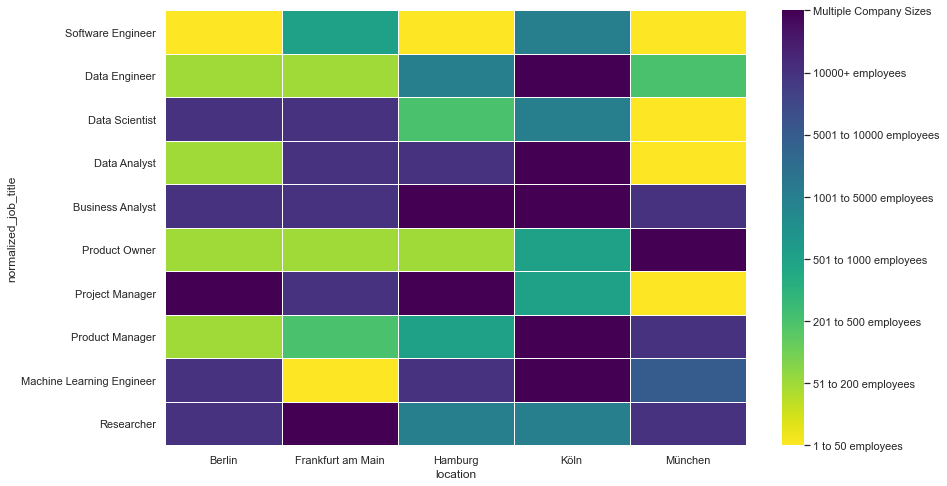

In [800]:
heatmap_glassdoor_top_normalized_job_title_location_n_employees = glassdoor_top_normalized_job_title_location_n_employees[
    glassdoor_top_normalized_job_title_location_n_employees.n_employees_index.notnull()].pivot(
    index='normalized_job_title', columns='location', values='n_employees_index')
f, ax = plt.subplots(figsize=(13,8))
ax = sns.heatmap(heatmap_glassdoor_top_normalized_job_title_location_n_employees, fmt='.0f', linewidths=.5, ax=ax, 
                 cmap='viridis_r',);
cbar = ax.collections[0].colorbar
cbar.set_ticks([n_employees_index_dict.get(i) for i in n_employees_names])
cbar.set_ticklabels(n_employees_names)

The heatmap above illustrates the highest frequency count of company sizes based on the relationship of the top 5 locations and normalized job titles. For all combinations job listings exist.

The most listings for companies with 1 to 50 employees are in München (Munich) for Software Engineers, Data Scientists, Data Analysts and Project Managers. In 3 out of 5 locations are Software Engineers listed most for companies with 1 to 50 employees. For companies with 51 to 200 employees, Berlin lists the most jobs for Data Engineer, Data Analyst, Product Owner and Product Manager. In 3 out of 5 locations are Product Owners the most listed for companies with 51 to 200 employees. Data Engineers in München, Data Scientist in Hamburg and Product Manager in Frankfurt am Main listings have the highest frequency for comapnies with 201 to 500 employees. In Köln (Cologne), companies with 501 to 1000 employees searching for Product Owner and Product Manager are most frequent listed. Companies with 1001 to 5000 employees have in Köln the most job listings for Software Engineers, Data Scientists and Researchers.  Companies with 5001 to 10000 employees only have in München listing for Machine Learning Engineers with the highest frequency. In Berlin and Frankfurt am Main have companies with more than 10000+ employees the most listing. Such large companies provide listings for Business Analysts for 3 out of 5 locations.

Especially the location Köln, as well as all other location have occasionally listings for individual job titles for which the highest frequency count is shared among multiple company sizes.

In [801]:
# Group job listings, by job titles, location and industry
glassdoor_top_normalized_job_title_location_industry = glassdoor_top_normalized_job_title_location[
    mask_top_normalized_job_title_location_industry].groupby(
    by=['normalized_job_title', 'location', 'industry']).size()
# Reset the index to create a dataframe out of the group
glassdoor_top_normalized_job_title_location_industry = glassdoor_top_normalized_job_title_location_industry.reset_index(name='count')

# Store the top locations and normalized job titles as list
unique_locations = glassdoor_top_normalized_job_title_location_industry.location.unique()
unique_titles = glassdoor_top_normalized_job_title_location_industry.normalized_job_title.unique()

# Initialize 2 new variables
# n_employees_index: The numerical values that translates to the industry string
# n_employees_multi: Is True in case the highest frequency count of industry based on the relationship of 
# top locations and normalized job titles is shared among multiple industries and not 0
glassdoor_top_normalized_job_title_location_industry['industry_index'] = np.nan
glassdoor_top_normalized_job_title_location_industry['industry_multi'] = np.nan

# List to track the records for which multiple industries have the highest frequency count
track_mutliple_industry_max_counts = []

# Iterate through the unique job titles
for t in unique_titles:
    # Iterate through the unique locations
    for l in unique_locations:
        # Select the job title and location
        mask_t_l = (glassdoor_top_normalized_job_title_location_industry.normalized_job_title == t) & (
            glassdoor_top_normalized_job_title_location_industry.location == l)
        # Get the highest frequency count
        max_count = glassdoor_top_normalized_job_title_location_industry[mask_t_l]['count'].max()
        # If the count is 0, continue with the next location the combination of job title and location and 
        # any industry has 0 records
        if max_count == 0:
            break
        # Select the records with the highest frequency count for the selected job title and location
        mask_max_count = (mask_t_l) & (glassdoor_top_normalized_job_title_location_industry['count'] == max_count)
        # Get the industry values of those records
        max_industry = glassdoor_top_normalized_job_title_location_industry[mask_max_count].industry.values
        # If there exists more than 1 value, set industry_multi to True and 
        # add the value 5 to industry_index for only the first record (the pivot table required for the heatmap cannot
        # contain duplicate entries)
        if len(max_industry) > 1:
            # Add the information to a list as double check
            track_mutliple_industry_max_counts.append({'t': t, 'l': l, 'max_count': max_count, 
                                                       'max_industry': max_industry})
            glassdoor_top_normalized_job_title_location_industry.loc[
                glassdoor_top_normalized_job_title_location_industry[mask_max_count].index, 'industry_multi'] = True
            glassdoor_top_normalized_job_title_location_industry.loc[
                glassdoor_top_normalized_job_title_location_industry[mask_max_count].index[0], 
                'industry_index'] = 5
        # There exists just 1 value
        else:
            # Add the respective index value for the industry with the highest frequency count using
            # the previously defined dictionary to column industry_index
            glassdoor_top_normalized_job_title_location_industry.loc[
                glassdoor_top_normalized_job_title_location_industry[mask_max_count].index, 
                'industry_index'] = top_normalized_job_title_location_industry_index_dict.get(max_industry[0], np.nan)

# Below print the information in case the highest frequency count for a certain job title
# and location was shared among multiple industries

# Print the list with as double check
pprint(track_mutliple_industry_max_counts)

# Print the dataframe, it should have the same information as the list previously print
glassdoor_top_normalized_job_title_location_industry[
    glassdoor_top_normalized_job_title_location_industry.industry_multi == True]

[{'l': 'Frankfurt am Main',
  'max_count': 4,
  'max_industry': array(['Consulting', 'IT Services'], dtype=object),
  't': 'Project Manager'},
 {'l': 'Frankfurt am Main',
  'max_count': 2,
  'max_industry': array(['Computer Hardware & Software',
       'Enterprise Software & Network Solutions'], dtype=object),
  't': 'Product Manager'},
 {'l': 'Köln',
  'max_count': 1,
  'max_industry': array(['Consulting', 'Enterprise Software & Network Solutions',
       'Internet'], dtype=object),
  't': 'Product Manager'}]


,normalized_job_title,location,industry,count,industry_index,industry_multi
156,Project Manager,Frankfurt am Main,Consulting,4,5.0,True
158,Project Manager,Frankfurt am Main,IT Services,4,NaN,True
180,Product Manager,Frankfurt am Main,Computer Hardware & Software,2,5.0,True
182,Product Manager,Frankfurt am Main,Enterprise Software & Network Solutions,2,NaN,True
191,Product Manager,Köln,Consulting,1,5.0,True
192,Product Manager,Köln,Enterprise Software & Network Solutions,1,NaN,True
194,Product Manager,Köln,Internet,1,NaN,True


The above code computes the dataframe required to plot the heatmap displaying the highest frequency count of industries based on the relationship of the top 5 locations and normalized job titles.

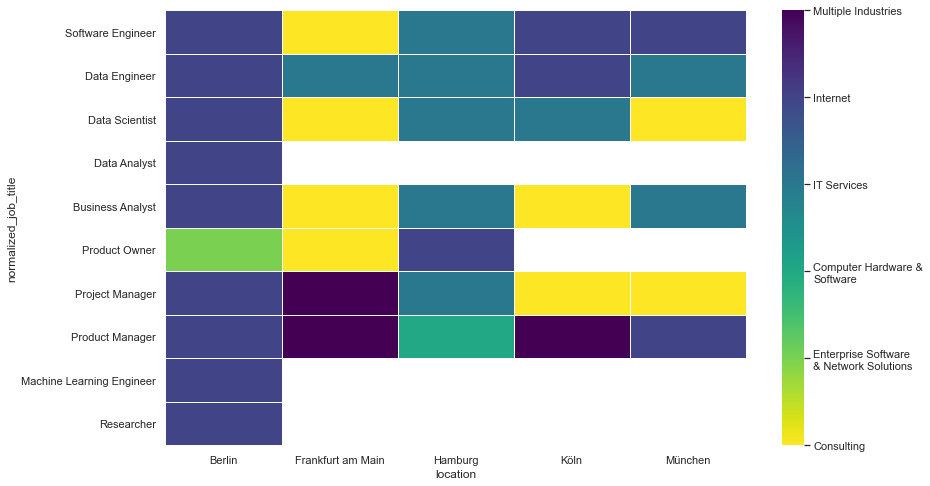

In [802]:
heatmap_glassdoor_top_normalized_job_title_location_industry = glassdoor_top_normalized_job_title_location_industry[
    glassdoor_top_normalized_job_title_location_industry.industry_index.notnull()].pivot(
    index='normalized_job_title', columns='location', values='industry_index')
f, ax = plt.subplots(figsize=(13,8))
ax = sns.heatmap(heatmap_glassdoor_top_normalized_job_title_location_industry, fmt='.0f', linewidths=.5, ax=ax, 
                 cmap='viridis_r',);
cbar = ax.collections[0].colorbar
cbar.set_ticks([top_normalized_job_title_location_industry_index_dict.get(i) for i in 
                top_normalized_job_title_location_industry_names])
cbar_labels = ['\n'.join(wrap(l, 20)) for l in top_normalized_job_title_location_industry_names]
cbar.set_ticklabels(cbar_labels)

The heatmap above illustrates the highest frequency count of the top 5 industries based on the relationship of the top 5 locations and normalized job titles.

For some combination of locations and normalized job titles no listing within the top 5 industries exists. Only in Berlin job listings for Data Analysts, Machine Learning Engineers and Researchers exist within the top 5 industries. For other locations they do not exist. For Product Owner in Köln (Cologne) and München (Munich) no listing within the top 5 industries exist.

The most listings within the Consulting industry are in Frankfurt am Main for Software Engineers, Data Scientists, Business Analysts and Product Owners. In 2 out of 5 locations are Data Scientists, Business Analysts and Project Manager for the Consulting industry the most listed.

Listings for which the Enterprise Software & Network Solutions industry has the highest frequency are rare. Only Product Owners in Berlin are most listed by this industry. It's similar for the Computer Hardware & Software industry. Just in Hamburg Product Managers are most listed for this industry.

In Hamburg the most listings for Software Engineers, Data Engineers, Data Scientists, Business Analysts and Project Managers are for the IT Services industry. Data Engineer for the IT Services industry are listed most frequent in 3 out of 5 locations.

The Internet industry has the highest frequency for the most combinations of location and job titles. The focus of the Internet industry is Berlin. The listing for all job titles besides for Product Owners have the highest frequency in Berlin. In 3 out of 5 locations are Software Engineers for the Internet industry the most listed.

Only the locations Frankfurt am Main and Köln have occasionally listings for individual job titles for which the highest frequency count is shared among multiple industries.

<a id='multisalary'></a>
### 2.4.2. Salaries
Let's explore the reported job title salaries. We have 3 qualitative features of main interest, `normalized_job_title`, `n_employees` and `industry`. 

Initially investigate the relationship between the qualitative features with the summed up numerical variable `base_pay_count` (reported salaries).

Afterwards, explore the relationship of the qualitative features with Median Low, Median and High Base Salaries.

Finally, examine the relationship of the qualitative features with the distribution of the Low, Median and High Base Salaries.

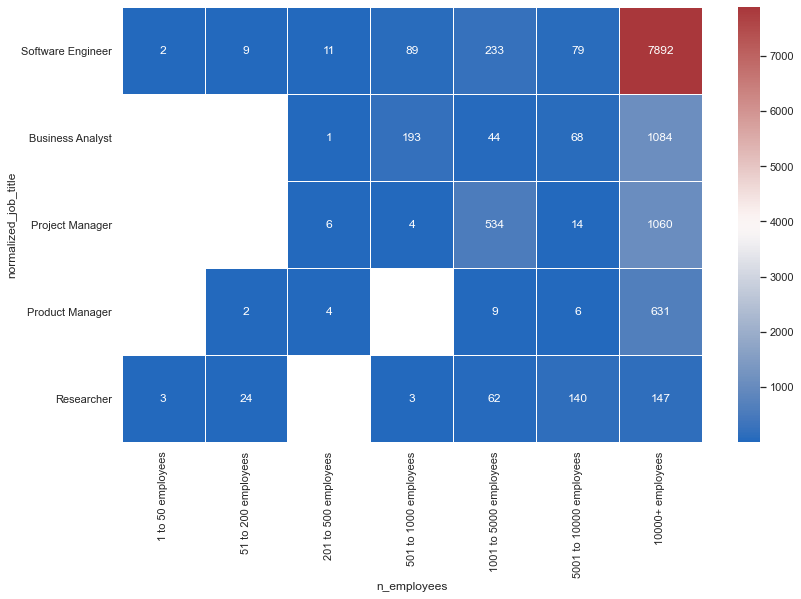

In [803]:
sns.set_style("whitegrid")
base_pay_count_sum = salaries_top_normalized_job_title_annual.groupby(by=['normalized_job_title', 
                                                                          'n_employees']).base_pay_count.sum()
base_pay_count_sum = base_pay_count_sum.reset_index(name='base_pay_count_sum')
base_pay_count_sum.loc[base_pay_count_sum[base_pay_count_sum.base_pay_count_sum == 0].index, 
                       'base_pay_count_sum'] =  np.nan
base_pay_count_sum = base_pay_count_sum.pivot(index='normalized_job_title', columns='n_employees', 
                                              values = 'base_pay_count_sum')
f, ax = plt.subplots(figsize=(13,8))
sns.heatmap(base_pay_count_sum, annot=True, fmt='.0f', linewidths=.5, ax=ax, cmap='vlag');

The heatmap above shows that the companies with more than 10000 employees have the most reported salaries for all top 5 normalized job tiles. It's eye-catching that Software Engineers of companies with more than 10000 employees have the most frequent salary reports. The frequency is approx. 8 times larger compared to the second and third largest frequencies of Business Analysts and Project Managers.

Without considering companies with more than 10000 employees, the job title and company size combinations with the largest amount of reported salaries are:
* 5001 to 10000 employees: Researcher
* 1001 to 5000 employees: Project Manager
* 501 to 1000 employees: Business Analyst
* 201 to 500 employees: Software Engineer
* 51 to 200 employees: Researcher
* 1 to 50 employees: Researcher

For some combination of normalized job titles and company sizes no reported salaries exists. Especially, for companies with 1 to 50 employees for 3 out of 5 top normalized job titles (Business Analyst, Project and Prouct Manager), no salary report exists. For next larger company size with 51 to 200 employee, Business Analysts and Project Manager salary reports do not exist, too.

In general it seems like that the more employees a company has, the more salaries for the top 5 normalized job titles are reported.

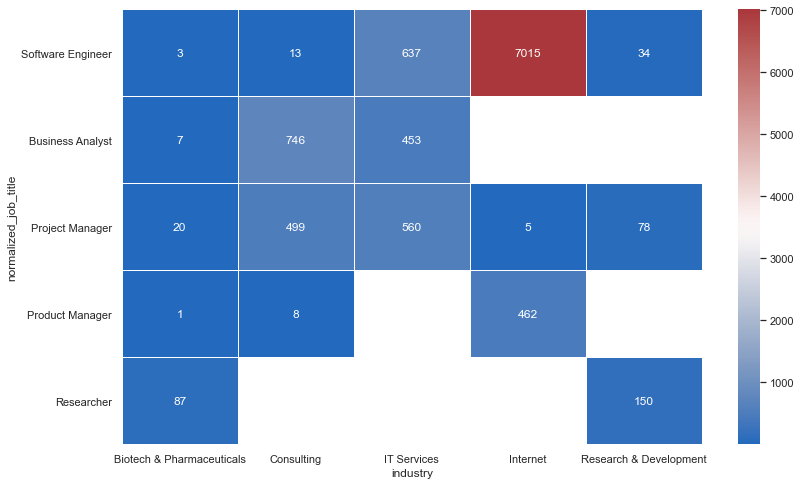

In [804]:
sns.set_style("whitegrid")
salaries_top_normalized_job_title_annual_industry_names = salaries_top_normalized_job_title_annual.industry.value_counts()[:5].index
mask_salaries_top_normalized_job_title_annual_industry = salaries_top_normalized_job_title_annual.industry.isin(
    salaries_top_normalized_job_title_annual_industry_names)
base_pay_count_sum = salaries_top_normalized_job_title_annual[
    mask_salaries_top_normalized_job_title_annual_industry].groupby(
    by=['normalized_job_title', 'industry']).base_pay_count.sum()
base_pay_count_sum = base_pay_count_sum.reset_index(name='base_pay_count_sum')
base_pay_count_sum.loc[base_pay_count_sum[base_pay_count_sum.base_pay_count_sum == 0].index, 
                       'base_pay_count_sum'] =  np.nan
base_pay_count_sum = base_pay_count_sum.pivot(index='normalized_job_title', columns='industry', 
                                              values = 'base_pay_count_sum')
f, ax = plt.subplots(figsize=(13,8))
sns.heatmap(base_pay_count_sum, annot=True, fmt='.0f', linewidths=.5, ax=ax, cmap='vlag');

The heatmap above shows that the companies in the Internet industry has the most reported salaries for Software Engineers and Product Managers. It's eye-catching that for Software Engineers in the Internet industry a 10 times larger count of  reported salaries compared to the second largest count within the top 5 normalized job titles and industries exists. That's why the Internet industry has the largest count of all industries within the top 5 normalized job titles. The second largest count is for Business Analysts in the Consulting industry. The third largest count, which is the highest count for the IT Services industry, is for Software Engineer. The Biotech & Pharmaceuticals have the most reported salaries for Researchers. Researchers presenting the highest count for the Research & Development industry, too.

For some combination of normalized job titles and industry no reported salaries exists. Only for Software Engineers and Project Manager salary reports for each of the top 5 industries exist. Especially, for Reseachers for 3 out of 5 top industries (Consulting, IT Services and Internet) no salary report exists. Only for Biotech & Pharmaceutical industry salary reports for each of the top 5 normalized job titles exist.

After the Internet industry has the IT Services industry followed by the Consulting industry the largest count of reported salaries among the top 5 normalized job titles.

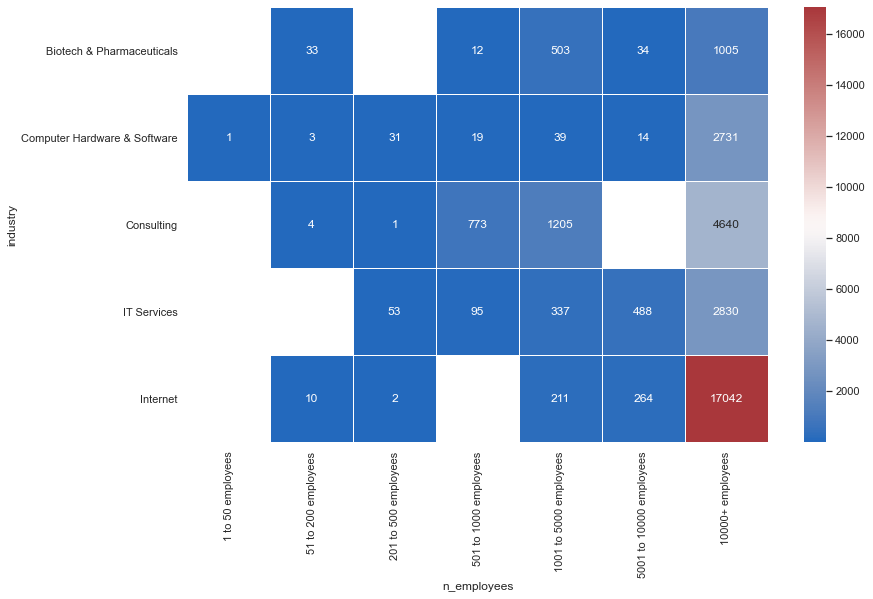

In [805]:
sns.set_style("whitegrid")

base_pay_count_sum = salaries_top_industry_annual.groupby(by=['industry', 'n_employees']).base_pay_count.sum()
base_pay_count_sum = base_pay_count_sum.reset_index(name='base_pay_count_sum')
base_pay_count_sum.loc[base_pay_count_sum[base_pay_count_sum.base_pay_count_sum == 0].index, 
                       'base_pay_count_sum'] =  np.nan
base_pay_count_sum = base_pay_count_sum.pivot(index='industry', columns='n_employees', 
                                              values = 'base_pay_count_sum')
f, ax = plt.subplots(figsize=(13,8))
sns.heatmap(base_pay_count_sum, annot=True, fmt='.0f', linewidths=.5, ax=ax, cmap='vlag');

The heatmap above shows that the companies with more than 10000 employees have the most reported salaries for all top 5 industries. It's eye-catching that companies with more than 10000 employees in the Internet industry have the most reported salaries by far. This count of reported salaries is approx. 3.5 times larger than the count for the second largest count of the Consulting industry.

Without considering companies with more than 10000 employees, the industry and company size combinations with the largest amount of reported salaries are:
* 5001 to 10000 employees: IT Services
* 1001 to 5000 employees: Consulting
* 501 to 1000 employees: Consulting
* 201 to 500 employees: IT Services
* 51 to 200 employees: Biotech & Pharmaceuticals
* 1 to 50 employees: Computer Hardware & Software

For some combination of industries and company sizes no reported salaries exists. Especially, for companies with 1 to 50 employees for 4 out of 5 top industries no salary report exists and for the Computer Hardware & Software industry 1 reported salary exists. That's why only for the Computer Hardware & Software salary reports for all company sizes exist. For the Biotech & Pharmaceutical, Consulting, IT Services and Internet indudstry no salaries have been reported for two individual company sizes each. That's why for each those industries just reported salaries for 5 out of 7 company sizes exist.

In general it seems like that the more employees a company has, the more salaries for the top 5 industries are reported.

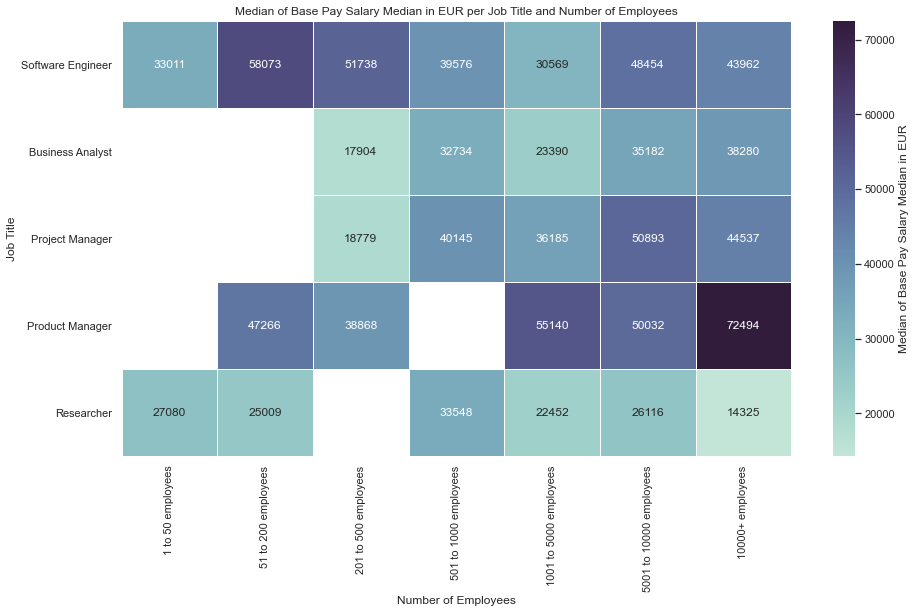

In [806]:
sns.set_style("whitegrid")
salaries_top_normalized_job_title_annual_perc_50_median = salaries_top_normalized_job_title_annual.groupby(
    by=['normalized_job_title', 'n_employees']).pay_percentile_50.median()
salaries_top_normalized_job_title_annual_perc_50_median = salaries_top_normalized_job_title_annual_perc_50_median.reset_index(
    name='50_median')
salaries_top_normalized_job_title_annual_perc_50_median = salaries_top_normalized_job_title_annual_perc_50_median.pivot(
    index='normalized_job_title', columns='n_employees', values='50_median')
f, ax = plt.subplots(figsize=(15,8))
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
sns.heatmap(salaries_top_normalized_job_title_annual_perc_50_median, annot=True, fmt='.0f', linewidths=.5, ax=ax, 
                 cmap=cmap, cbar_kws = {'label' : 'Median of Base Pay Salary Median in EUR'})
ax.set_xlabel('Number of Employees')
ax.set_ylabel('Job Title')
ax.set_title('Median of Base Pay Salary Median in EUR per Job Title and Number of Employees');

The heatmap above shows that the companies with more than 10000 employees have the highest median of the reported median salaries for Product Manager. It's the highest median salary considering all company sizes for the top 5 normnalized job titles.

You can find the highest median of the reported median salaries in the following for the remaining job title and company size combinations:
* 5001 to 10000 employees: Project Manager (very closely followed by Product Manager)
* 1001 to 5000 employees: Product Manager
* 501 to 1000 employees: Project Manager
* 201 to 500 employees: Software Engineer
* 51 to 200 employees: Software Engineer
* 1 to 50 employees: Software Engineer

Larger companies have higher median salaries for Product Manager and smaller companies have higher median salaries for Software Engineers.

For some combination of normalized job titles and company sizes no reported salaries exists. Especially, for companies with 1 to 50 employees for 3 out of 5 top normalized job titles (Business Analyst, Project and Prouct Manager), no salary report exists. For next larger company size with 51 to 200 employee, Business Analysts and Project Manager salary reports do not exist, too.

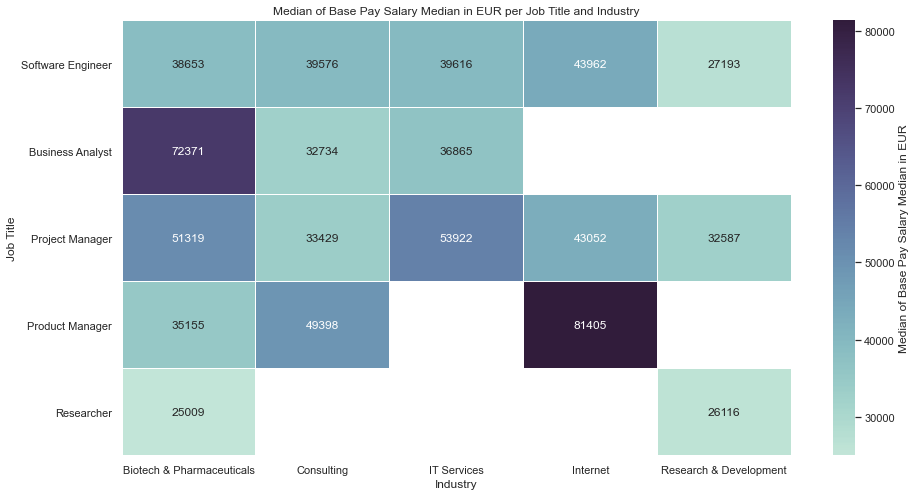

In [807]:
sns.set_style("whitegrid")
salaries_top_normalized_job_title_annual_industry_perc_50_median = salaries_top_normalized_job_title_annual[
    mask_salaries_top_normalized_job_title_annual_industry].groupby(
    by=['normalized_job_title', 'industry']).pay_percentile_50.median()
salaries_top_normalized_job_title_annual_industry_perc_50_median = salaries_top_normalized_job_title_annual_industry_perc_50_median.reset_index(
    name='50_median')
salaries_top_normalized_job_title_annual_industry_perc_50_median = salaries_top_normalized_job_title_annual_industry_perc_50_median.pivot(
    index='normalized_job_title', columns='industry', values='50_median')
f, ax = plt.subplots(figsize=(15, 8))
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
sns.heatmap(salaries_top_normalized_job_title_annual_industry_perc_50_median, annot=True, fmt='.0f', linewidths=.5, ax=ax, 
                 cmap=cmap, cbar_kws = {'label' : 'Median of Base Pay Salary Median in EUR'})
ax.set_xlabel('Industry')
ax.set_ylabel('Job Title')
ax.set_title('Median of Base Pay Salary Median in EUR per Job Title and Industry');

The heatmap above shows that the companies in the Internet industry have the highest median of the reported median salaries for Product Manager. The second highest median salary is for Business Analysts in the Biotech & Pharmaceutical industry, which is the highest median salary in this industry among the top 5 normalized job titles. The third largest highest salary, which is the highest salary for the IT Services industry, is for Project Manager. The Consulting industry has the highest median salary for Product Managers. Project Manager have the lowest median salary in Research & Development industry, which still is the highest median slary for this industry. Researcher have a higher median salary in Research & Development compared to Biotech & Pharmaceutical industry. The Internet industry provides the highest median salaries among the top 5 industries for Software Engineers. In Consulting, IT Services and Biotech & Pharmaceutical industry Software Engineer only have an approx. 10 % lower high median salary. 

For some combination of normalized job titles and industry no reported salaries exists. Only for Software Engineers and Project Manager salary reports for each of the top 5 industries exist. Especially, for Reseachers for 3 out of 5 top industries (Consulting, IT Services and Internet) no salary report exists. Only for Biotech & Pharmaceutical industry salary reports for each of the top 5 normalized job titles exist. After the Biotech & Pharmaceutical industry has the Consulting industry 4 out of 5, followed by the remaining top 5 industries with 3 out of 5 reported salaries among the top 5 normalized job titles.

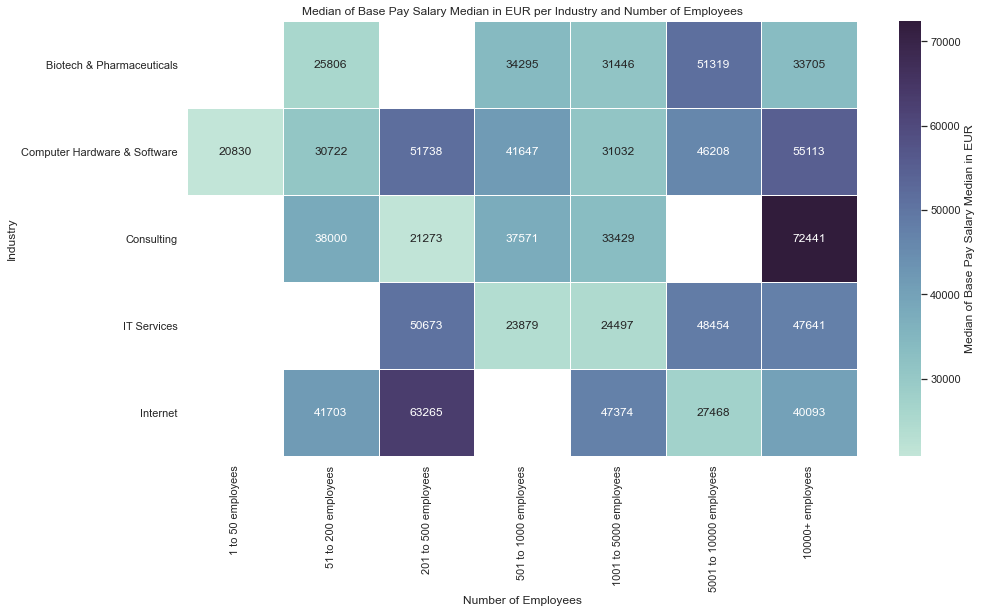

In [808]:
sns.set_style("whitegrid")
salaries_top_industry_annual_perc_50_median = salaries_top_industry_annual.groupby(
    by=['industry', 'n_employees']).pay_percentile_50.median()
salaries_top_industry_annual_perc_50_median = salaries_top_industry_annual_perc_50_median.reset_index(
    name='50_median')
salaries_top_industry_annual_perc_50_median = salaries_top_industry_annual_perc_50_median.pivot(
    index='industry', columns='n_employees', values='50_median')
f, ax = plt.subplots(figsize=(15, 8))
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
sns.heatmap(salaries_top_industry_annual_perc_50_median, annot=True, fmt='.0f', linewidths=.5, ax=ax, 
                 cmap=cmap, cbar_kws = {'label' : 'Median of Base Pay Salary Median in EUR'})
ax.set_xlabel('Number of Employees')
ax.set_ylabel('Industry')
ax.set_title('Median of Base Pay Salary Median in EUR per Industry and Number of Employees');

The heatmap above shows that the companies with more than 10000 employees have the highest median of the reported median salaries the Consulting and Computer Hardware & Software industry. The median salaries in Consulting industry for other company sizes is maximum approx. half as high. The second highest median salary is reported for Internet industry and companies with 201 to 500 employees. Company with such a size have the highest median salary for the IT Services industry, too. For the Biotech & Pharmaceutical industry companies with 5001 to 10000 employees have the median salaries reported.   

For some combination of industries and company sizes no reported salaries exists. Especially, for companies with 1 to 50 employees for 4 out of 5 top industries no salary report exists and for the Computer Hardware & Software industry has 1 reported salary exists. That's why only for the Computer Hardware & Software salary reports for all company sizes exist. For the Biotech & Pharmaceutical, Consulting, IT Services and Internet indudstry no salaries have been reported for two individual company sizes each. That's why for each those industries just reported salaries for 5 out of 7 company sizes exist.

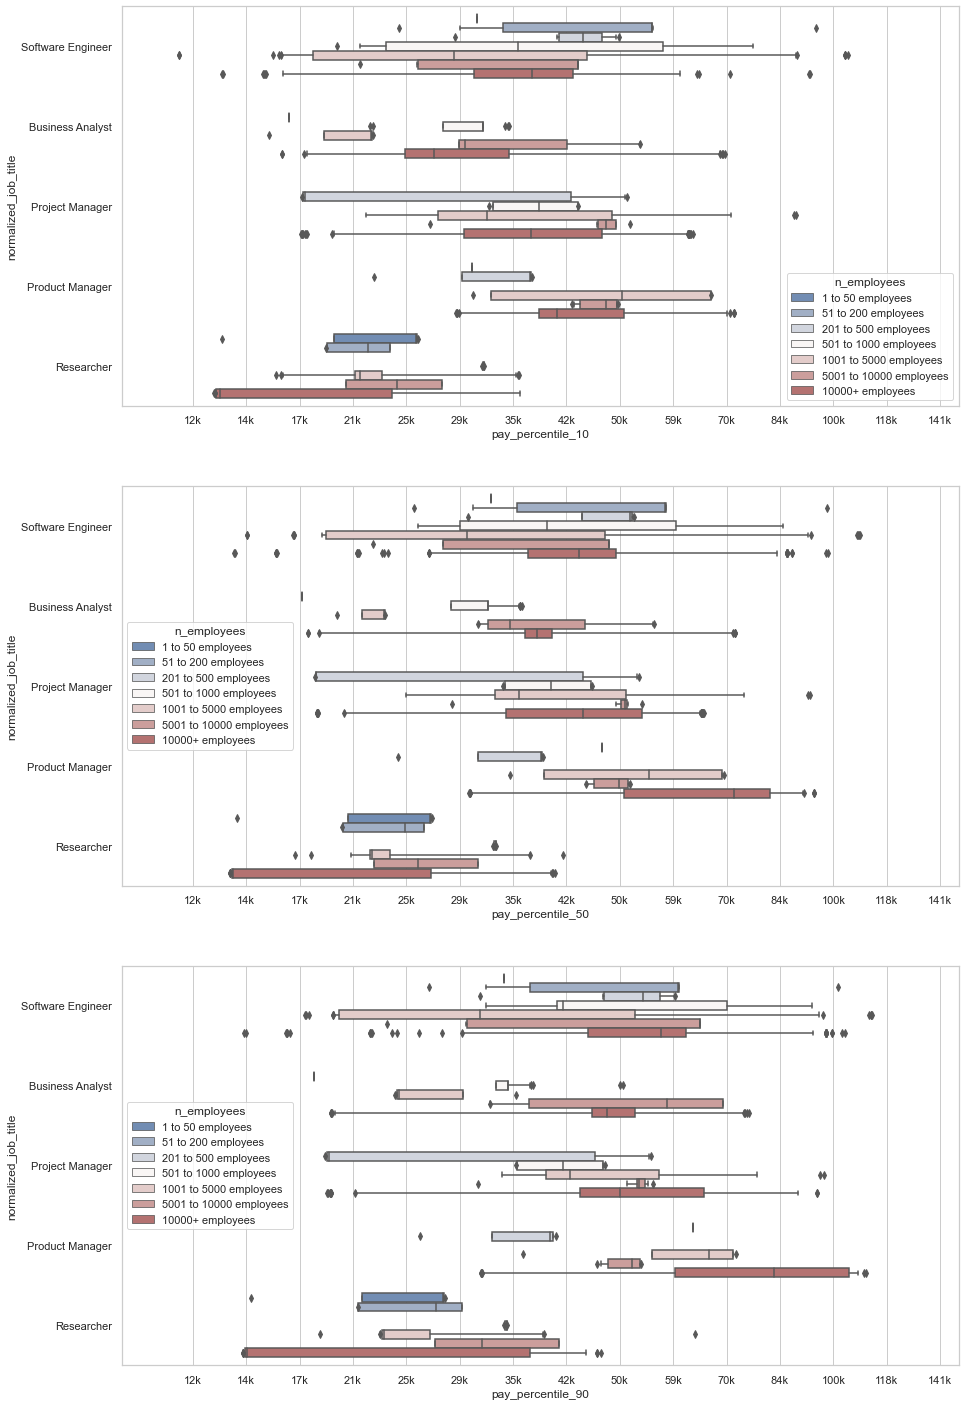

In [809]:
sns.set_theme(style="whitegrid")
f, axes = plt.subplots(3, figsize=(15,25))
for ax, col in zip(axes.flatten(), ['pay_percentile_10', 'pay_percentile_50', 'pay_percentile_90']):
    sns.boxplot(data=salaries_top_normalized_job_title_annual, x=col, y='normalized_job_title', hue='n_employees', 
                ax=ax, whis=[5,95], palette='vlag')
    #sns.violinplot(data=salaries_top_normalized_job_title_annual, x=col, y="normalized_job_title", 
    #               ax=ax, palette='Greens_r', inner="quartile", scale='width')
    ax.set_xscale('log')
    ax.set_xlim([10000, 150000]) 
xticks = 10 ** np.arange(4.1, 5.2, 0.075)
xtickslabels = ['{}k'.format(int(x/1000)) for x in xticks]
plt.setp(axes, xticks=xticks, xticklabels=xtickslabels);

For the top 5 normalized job titles and company size, the Low (Percentile 10), Median (Percentile 50) and High (Percentile 90) Salaries each as boxplot are illustrated above. Points lower than quantile 5 and higher than quantile 95 will be plotted outside the whisker and are treated as outliers. A log transformation for all salaries was applied, because of the right skewed distribution and large range of data determined during the univariate exploration.

The observations made based on the previously created heatmap can be confirmed by the boxplots. In addition to the median salary investigated using the heatmap, are boxplots for the low and high reported salaries shown. But there is no further insight, because of the strong relationship between low, median and high reported salaries.

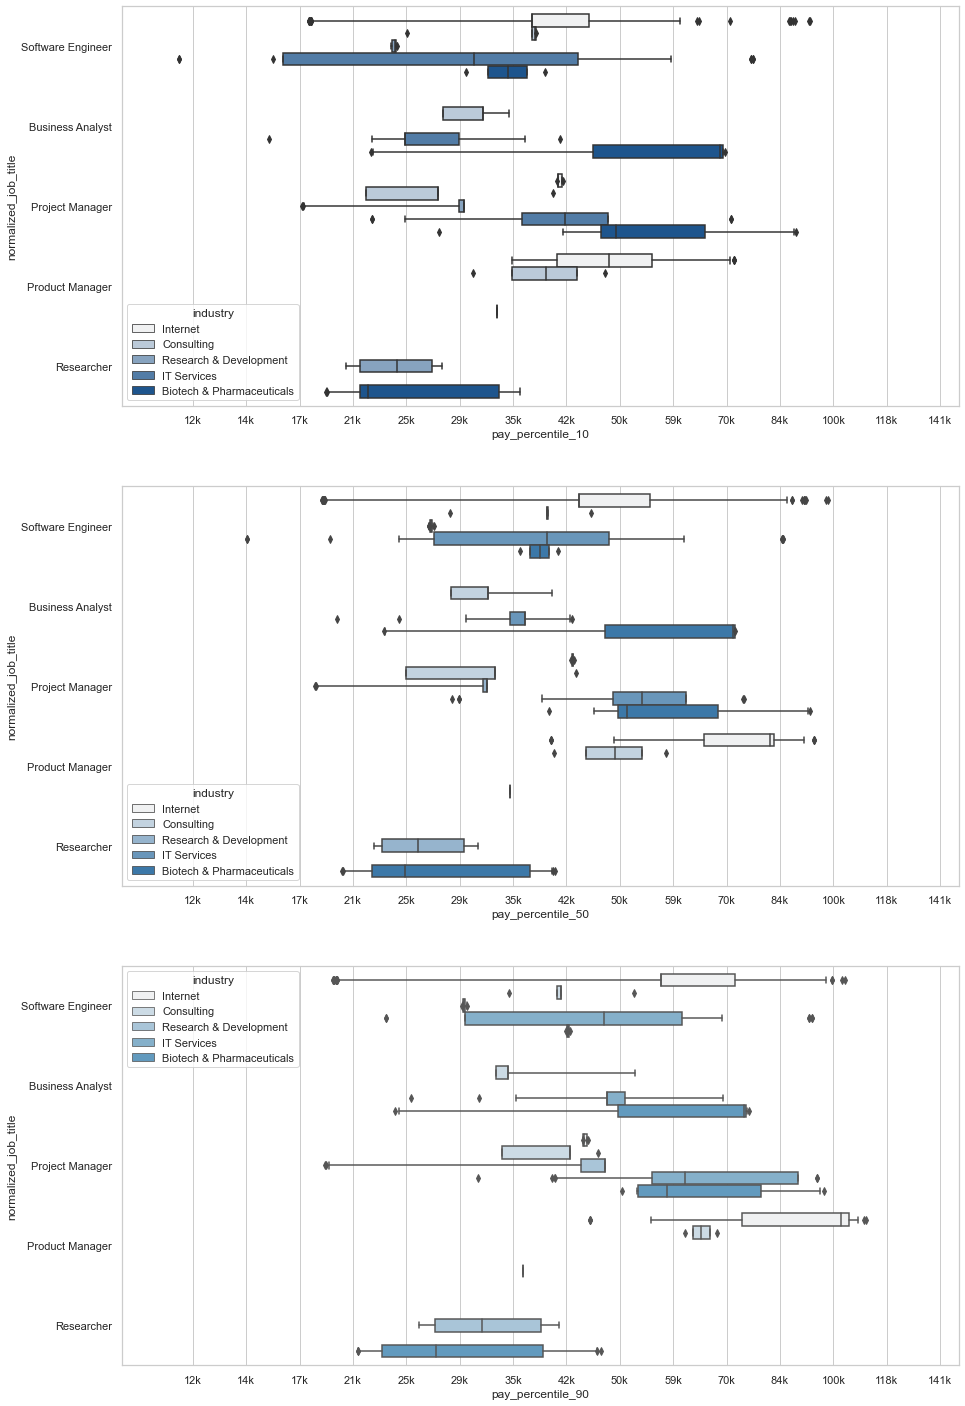

In [810]:
sns.set_theme(style="whitegrid")
colors = [c for c in sns.color_palette('Blues_r')[:3]]
f, axes = plt.subplots(3, figsize=(15,25))
for i, (ax, col) in enumerate(zip(axes.flatten(), ['pay_percentile_10', 'pay_percentile_50', 'pay_percentile_90'])):
    sns.boxplot(data=salaries_top_normalized_job_title_annual[mask_salaries_top_normalized_job_title_annual_industry], 
                x=col, y='normalized_job_title', hue='industry', ax=ax, color=colors[i], whis=[5,95])
    #sns.violinplot(data=salaries_top_normalized_job_title_annual, x=col, y="normalized_job_title", 
    #               ax=ax, palette='Greens_r', inner="quartile", scale='width')
    ax.set_xscale('log')
    ax.set_xlim([10000, 150000]) 
xticks = 10 ** np.arange(4.1, 5.2, 0.075)
xtickslabels = ['{}k'.format(int(x/1000)) for x in xticks]
plt.setp(axes, xticks=xticks, xticklabels=xtickslabels);

For the top 5 normalized job titles and top5 industries, the Low (Percentile 10), Median (Percentile 50) and High (Percentile 90) Salaries each as boxplot are illustrated above. Points lower than quantile 5 and higher than quantile 95 will be plotted outside the whisker and are treated as outliers. A log transformation for all salaries was applied, because of the right skewed distribution and large range of data determined during the univariate exploration.

The observations made based on the previously created heatmap can be confirmed by the boxplots. In addition to the median salary investigated using the heatmap, are boxplots for the low and high reported salaries shown. But there is no further insight, because of the strong relationship between low, median and high reported salaries.

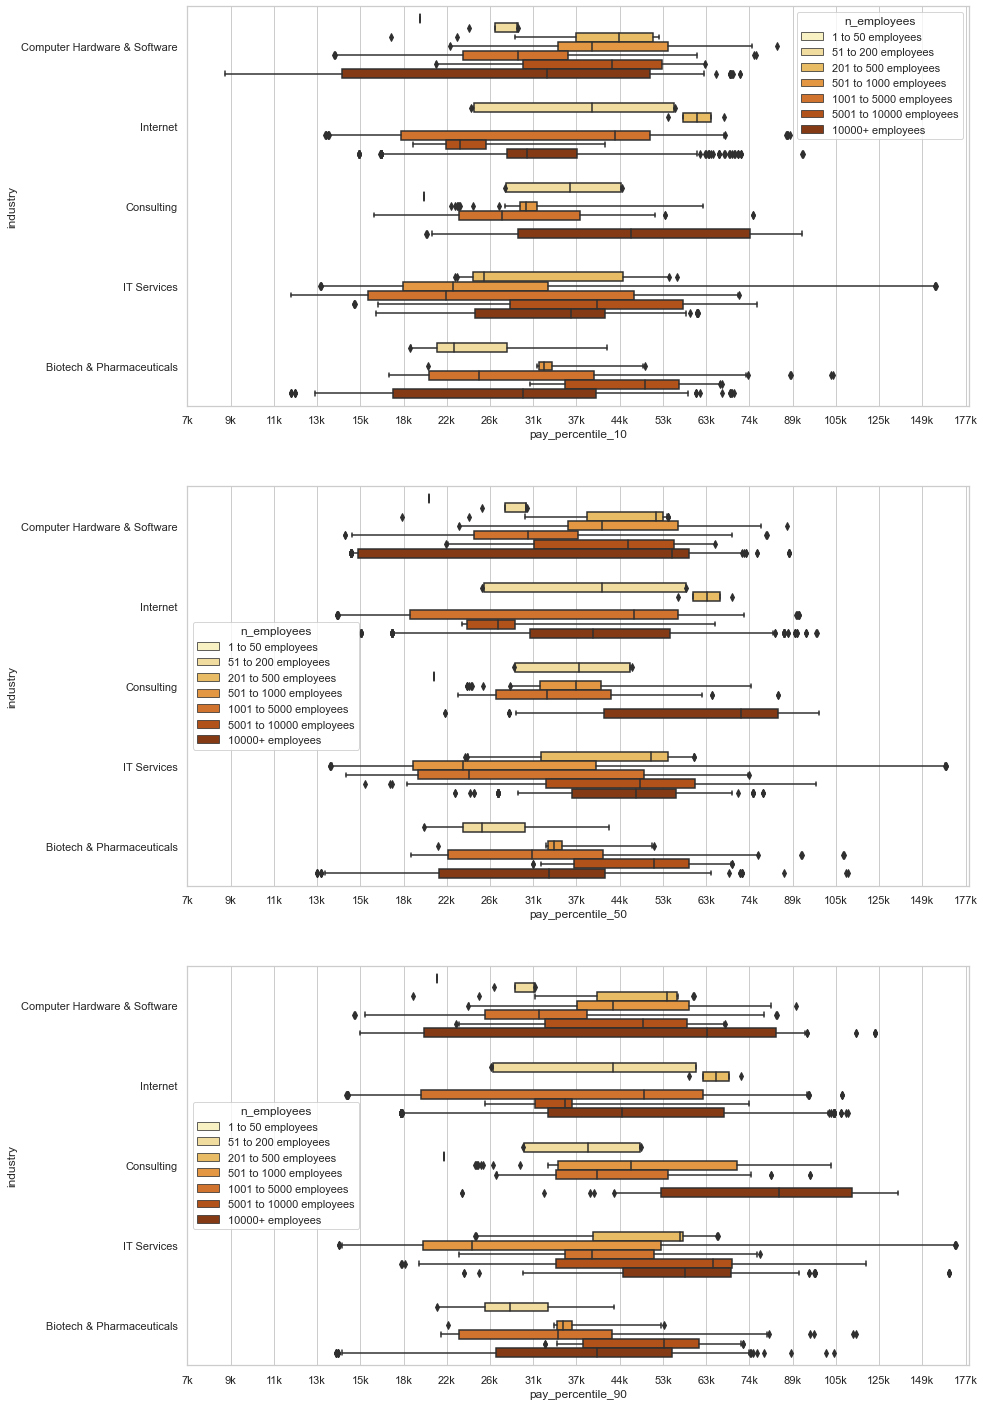

In [811]:
sns.set_theme(style="whitegrid")
f, axes = plt.subplots(3, figsize=(14,25))
for ax, col in zip(axes.flatten(), ['pay_percentile_10', 'pay_percentile_50', 'pay_percentile_90']):
    sns.boxplot(data=salaries_top_industry_annual, x=col, y='industry', hue='n_employees', ax=ax, 
                whis=[5,95], palette='YlOrBr')
    #sns.violinplot(data=salaries_top_normalized_job_title_annual, x=col, y="normalized_job_title", 
    #               ax=ax, palette='Greens_r', inner="quartile", scale='width')
    ax.set_xscale('log')
    ax.set_xlim([10000, 180000]) 
xticks = 10 ** np.arange(3.9, 5.25, 0.075)
xtickslabels = ['{}k'.format(int(x/1000)) for x in xticks]
plt.setp(axes, xticks=xticks, xticklabels=xtickslabels);

For the top 5 industries and company size, the Low (Percentile 10), Median (Percentile 50) and High (Percentile 90) Salaries each as boxplot are illustrated above. Points lower than quantile 5 and higher than quantile 95 will be plotted outside the whisker and are treated as outliers. A log transformation for all salaries was applied, because of the right skewed distribution and large range of data determined during the univariate exploration.

The observations made based on the previously created heatmap can be confirmed by the boxplots. In addition to the median salary investigated using the heatmap, are boxplots for the low and high reported salaries shown. But there is no further insight, because of the strong relationship between low, median and high reported salaries.

<a id='multisum'></a>
### 2.4.3. Summary

#### Job listings (`glassdoor_clean` dataset)

The features of main interest for job listings are only qualitative variables.  That's why the data was grouped by ***top 5 normalized job titles***, ***top 5 locations*** and ***company size***. For each of those unique combinations a frequency count was determined. Following observations were determined:
* The most listings for companies with 1 to 50 employees are in München (Munich) for Software Engineers, Data Scientists, Data Analysts and Project Managers. In 3 out of 5 locations are Software Engineers most listed for companies with 1 to 50 employees. For companies with 51 to 200 employees, Berlin lists the most jobs for Data Engineer, Data Analyst, Product Owner and Product Manager. In 3 out of 5 locations are Product Owners the most listed for companies with 51 to 200 employees. Data Engineers in München, Data Scientist in Hamburg and Product Manager in Frankfurt am Main listings have the highest frequency for companies with 201 to 500 employees. In Köln (Cologne), companies with 501 to 1000 employees searching for Product Owner and Product Manager are most frequent listed. Companies with 1001 to 5000 employees have in Köln the most job listings for Software Engineers, Data Scientists and Researchers. Companies with 5001 to 10000 employees only have in München listing for Machine Learning Engineers with the highest frequency. In Berlin and Frankfurt am Main have companies with more than 10000+ employees the most listing. Such large companies provide listings for Business Analysts for 3 out of 5 locations.
* Especially the location Köln, as well as all other location have occasionally listings for individual job titles for which the highest frequency count is shared among multiple company sizes.

For the final investigation, the data was grouped by ***top 5 normalized job titles***, ***top 5 locations*** and ***top 5 industries***. For each of those unique combinations a frequency count was determined. The examination lead to the following observations:
* For some combination of the top 5 locations and top 5 normalized job titles no listing within the top 5 industries exists. Only in Berlin job listings for Data Analysts, Machine Learning Engineers and Researchers exist within the top 5 industries. For Product Owner in Köln (Cologne) and München (Munich) no listing within the top 5 industries exist.
* The Internet industry has the highest frequency for the most combinations of location and job titles. The focus of the Internet industry is Berlin. The listing for all job titles besides for Product Owners have the highest frequency in Berlin. In 3 out of 5 locations are Software Engineers for the Internet industry the most listed.
* The most listings within the Consulting industry are in Frankfurt am Main for Software Engineers, Data Scientists, Business Analysts and Product Owners. In 2 out of 5 locations are Data Scientists, Business Analysts and Project Manager for the Consulting industry the most listed.
* Listings for which the Enterprise Software & Network Solutions industry has the highest frequency are rare. Only Product Owners in Berlin are most listed by this industry. It's similar for the Computer Hardware & Software industry. Just in Hamburg Product Managers are most listed for this industry.
* In Hamburg the most listings for Software Engineers, Data Engineers, Data Scientists, Business Analysts and Project Managers are for the IT Services industry. Data Engineer for the IT Services industry are listed most frequent in 3 out of 5 locations.
* Only the locations Frankfurt am Main and Köln have occasionally listings for individual job titles for which the highest frequency count is shared among multiple industries.

#### Reported salaries (`salaries_clean` dataset)

The relationships of each of the 3 qualitative features of main interest ***top 5 normalized job titles***, ***top 5 industries*** and ***company size*** with the summed up ***number of reported salaries*** were explored. The exploration revealed the following observations:

* The ***top 5 job title and company size combinations*** with the largest amount of reported salaries are:
   * 10000+ employees: Software Engineers, Business Analysts, Project Manager, Product Manager and Reseacher (ranked by count; Software Engineers have the largest count by far, which is approx. 8 times larger than the second largest count for Business Analysts and Project Manager; 10000+ employees have the largest counts for each of the top 5 job titles)
   * 5001 to 10000 employees: Researcher
   * 1001 to 5000 employees: Project Manager
   * 501 to 1000 employees: Business Analyst
   * 201 to 500 employees: Software Engineer
   * 51 to 200 employees: Researcher
   * 1 to 50 employees: Researcher
* For some combination of normalized job titles and company sizes no reported salaries exists. Especially, for companies with 1 to 50 employees for 3 out of 5 top normalized job titles (Business Analyst, Project and Prouct Manager), no salary report exists. For next larger company size with 51 to 200 employee, Business Analysts and Project Manager salary reports do not exist, too.
* In general it seems like that the more employees a company has, the more salaries for the top 5 normalized job titles are reported.
<br>

* Among the ***combinations of the top 5 normalized job titles and top 5 industries***, the ranking of the larger number of reported is as follows:
   1. Software Engineers in Internet (largest count by far, which is approx. 10 times larger than the second largest count across the top 5 job titles and industries; Internet industry has the largest count among the top 5 normalized job titles)
   1. Business Analysts in Consulting (third largest count among the top 5 normalized job titles)
   1. Software Engineers in IT Services (second largest count among the top 5 normalized job titles)
   1. Project Manager in IT Services
   1. Product Managers in Internet
   1. Researchers in Research & Development
   1. Researchers in Biotech & Pharmaceuticals
* For some combination of normalized job titles and industry no reported salaries exists. Only for Software Engineers and Project Manager salary reports for each of the top 5 industries exist. Especially, for Reseachers for 3 out of 5 top industries (Consulting, IT Services and Internet) no salary report exists. Only for Biotech & Pharmaceutical industry salary reports for each of the top 5 normalized job titles exist. After the Biotech & Pharmaceutical industry has the Consulting industry 4 out of 5, followed by the remaining top 5 industries with 3 out of 5 reported salaries among the top 5 normalized job titles.
<br>

* The ***top 5 industry and company size combinations*** with the largest amount of reported salaries are:
   * 10000+ employees: Internet, Consulting, IT Services, Computer Hardware & Software and Biotech & Pharmaceuticals (ranked by count; Internet has the largest count by far, which is approx. 3.5 times larger than the second largest count for Consulting; 10000+ employees have the largest counts for each of the top 5 industries)
   * 5001 to 10000 employees: IT Services
   * 1001 to 5000 employees: Consulting
   * 501 to 1000 employees: Consulting
   * 201 to 500 employees: IT Services
   * 51 to 200 employees: Biotech & Pharmaceuticals
   * 1 to 50 employees: Computer Hardware & Software (only 1 reported salary exists)
* For some combination of industries and company sizes no reported salaries exists. Especially, for companies with 1 to 50 employees for 4 out of 5 top industries no salary report exists and for the Computer Hardware & Software industry only 1 reported salary exists. That's why only for the Computer Hardware & Software salary reports for all company sizes exist. For the Biotech & Pharmaceutical, Consulting, IT Services and Internet indudstry no salaries have been reported for two individual company sizes each. That's why for each of those industries just reported salaries for 5 out of 7 company sizes exist.
* In general it seems like that the more employees a company has, the more salaries for the top 5 industries are reported.

Finally, the investigation of the relationship of the qualitative features of main interest ***top 5 normalized job titles***, ***top 5 industries*** and ***company size*** with the Median Low, Median and High Base Salaries was performed.
Following observations were made:

* The highest median of the reported median salaries is represented by each of the following ***top 5 job title and company size combinations***:
   * 10000+ employees: Product Manager (highest median salary considering all company sizes for the top 5 normnalized job title)
   * 5001 to 10000 employees: Project Manager (very closely followed by Product Manager)
   * 1001 to 5000 employees: Product Manager
   * 501 to 1000 employees: Project Manager
   * 201 to 500 employees: Software Engineer
   * 51 to 200 employees: Software Engineer
   * 1 to 50 employees: Software Engineer
* Larger companies have higher median salaries for Product Manager and smaller companies have higher median salaries for Software Engineers.
<br>

* Among the ***combinations of the top 5 normalized job titles and top 5 industries***, the ranking of the highest median reported salaries is as follows:
   1. Product Manager in Internet (equals the highest salary among the top 5 industries and job titles)
   1. Business Analysts in Biotech & Pharmaceutical
   1. Project Manager in IT Services
   1. Product Managers in Consulting
   1. Software Engineers in Internet 
   1. Project Manager in Research & Development (equals the lowest salary among the top 5 industries for Project Manager)
   1. Researchers in Research & Development
<br>


* The highest median of the reported median salaries is provided by following ***top 5 industry and company size combinations***:
   * 10000+ employees: Consulting and Computer Hardware & Software (combination with Consulting industry equals the largest salary among all industry and company size combinations; for other company sizes the median salaries in Consulting industry is maximum approx. half as high)
   * 5001 to 10000 employees: Biotech & Pharmaceutical
   * 1001 to 5000 employees: Internet
   * 501 to 1000 employees: Computer Hardware & Software
   * 201 to 500 employees: Internet and IT Services (combination with Internet industry equals the second largest salary)
   * 51 to 200 employees: Internet
   * 1 to 50 employees: Computer Hardware & Software (only 1 reported salary exists)  